In [497]:
import os
from urllib.request import urlretrieve as retrieve
import tarfile
import csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"]
from datetime import datetime
import calendar
#from datetime import timedelta
#import datetime
import seaborn as sns

In [20]:
os.getcwd()
os.chdir("d:\M05A")
os.getcwd()

'd:\\M05A'

In [103]:
df.iloc[:,14:]

""
2
4
5
6
7
...
38434
38435
38438
38443


In [152]:
df.iloc[:,18:]

,迴轉道,內路肩,外路肩,外側車道,中線車道,全車道,內側車道,第一車道,第二車道,第三車道,第四車道,第五車道,匝道,隧道,槽化線
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21489,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21490,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
21491,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [153]:
df.iloc[:,18:]=df.iloc[:,18:].astype("int")
df["占用車道數"]=np.sum(df.iloc[:,18:], axis=1)


In [142]:
df

,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,通報來源,...,內側車道,第一車道,第二車道,第三車道,第四車道,第五車道,匝道,隧道,槽化線,占用車道數
2,2019-01-01,國1,南,298.0,外路肩,08:19:00,8:32:00,13,3,1968,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-01,國1,北,354.0,中線車道,10:36:00,11:08:00,32,6,1968,...,0,0,0,0,0,0,0,0,0,1
5,2019-01-01,國1,南,296.5,內路肩,10:43:00,11:13:00,30,20,1968,...,0,0,0,0,0,0,0,0,0,1
6,2019-01-01,國1,北,356.0,入口匝道,10:51:00,11:39:00,48,6,1968,...,0,0,0,0,0,0,1,0,0,1
7,2019-01-01,國1,南,349.0,內側車道,10:56:00,11:32:00,36,21,1968,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,2019-12-31,國1,北,147.0,外路肩,17:04:00,17:26:00,22,20,中交控,...,0,0,0,0,0,0,0,0,0,1
38435,2019-12-31,國1,南,149.0,第1車道,17:41:00,17:56:00,15,20,中交控,...,0,1,0,0,0,0,0,0,0,1
38438,2019-12-31,國1,南,241.5,外路肩,19:20:00,19:41:00,21,5,中交控,...,0,0,0,0,0,0,0,0,0,1
38443,2019-12-31,國1,南,244.9,第1車道,22:20:00,22:47:00,27,13,中交控,...,0,1,0,0,0,0,0,0,0,1


In [154]:
df1=df[df["占用車道數"]!=0]
df1

,Unnamed: 0.1,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,...,內側車道,第一車道,第二車道,第三車道,第四車道,第五車道,匝道,隧道,槽化線,占用車道數
0,2,2019-01-01,國1,南,298.0,外路肩,08:19:00,8:32:00,13,3,...,0,0,0,0,0,0,0,0,0,1
1,4,2019-01-01,國1,北,354.0,中線車道,10:36:00,11:08:00,32,6,...,0,0,0,0,0,0,0,0,0,1
2,5,2019-01-01,國1,南,296.5,內路肩,10:43:00,11:13:00,30,20,...,0,0,0,0,0,0,0,0,0,1
3,6,2019-01-01,國1,北,356.0,入口匝道,10:51:00,11:39:00,48,6,...,0,0,0,0,0,0,1,0,0,1
4,7,2019-01-01,國1,南,349.0,內側車道,10:56:00,11:32:00,36,21,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21488,38434,2019-12-31,國1,北,147.0,外路肩,17:04:00,17:26:00,22,20,...,0,0,0,0,0,0,0,0,0,1
21489,38435,2019-12-31,國1,南,149.0,第1車道,17:41:00,17:56:00,15,20,...,0,1,0,0,0,0,0,0,0,1
21490,38438,2019-12-31,國1,南,241.5,外路肩,19:20:00,19:41:00,21,5,...,0,0,0,0,0,0,0,0,0,1
21491,38443,2019-12-31,國1,南,244.9,第1車道,22:20:00,22:47:00,27,13,...,0,1,0,0,0,0,0,0,0,1


In [155]:
df1.to_csv("obj_all_clean(dum).csv",encoding="utf_8_sig") ### )

In [145]:
df=pd.read_csv("obj_all_new_split.csv",index_col=0)
df["占用車道"].unique()[800:1000]

array(['國1南往台64 下蓬萊路', '桃園入匝道(南崁)', '外路肩/圓山入口', '第2車道/第5車道', '事故', '基隆入口',
       '接台66西', '槽化線/入口匝道/新屋', '第1車道/92~93', '第1車道/25~24',
       '第1車道/外路肩/~69.2', '到58K外側', '大業隧道外側', '到81K外側', '入口匝道/成功入口',
       '第三車道\n第四車道\n外路肩', '第3車道/第4車道/多車道', '二 三車道線上', '造橋地磅內',
       '第1車道/26~26.6', '汐止出口前', '第1車道/第2車道/外路肩', '第1車道/及34.5K外2線',
       '及56中線', '第3車道/~56', '第2車道/第3車道/到71.5K', '入口匝道/中壢入口環道',
       '第1車道/第2車道/65中', '封主線引導楊梅出口', '出口匝道/新竹出口', '出口匝道/新竹A',
       '第1車道/林口B出口', '接台66匝道', '五股出口匝道(往台64)', '內路肩/分隔島/~63.8',
       '第2車道/到73K中線', '內路肩/到15K', '第3車道/到60.5K', '重情出口往士林匝道', '第3車道/到31K',
       '內路肩/21K', '外側大車車道', '頭份出口匝道', '第3車道/', '第1車道/出口匝道/竹北', '內路肩/分隔島',
       '東湖入口', '頭屋匝道出口', '第2車道/(87.47)(88)', '第2車道/92.3(3車道)92.25(2車道)',
       '第2車道/54', '建國入口', '五股出口接台64匝道', '外', '至43 中線+外線', '林口a', '接台66東',
       '出口匝道/1S接機場系統出口', '入口匝道/中壢入口', '入口匝道/湖口入口', '入口匝道/平鎮系統入口槽化線',
       '82.6~82.9外側', '第1車道/林口A入口', '進高公局匝道', '外路肩/~91', '第1車道/中壢服務區出口匝道',
       '第2車道/~17', '第1車道/到100K', '第1車道/

In [ ]:
外路肩
中線車道
入口匝道


In [45]:
df["占用車道"][0:1000]

2        外路肩
4       中線車道
5        內路肩
6       入口匝道
7       內側車道
        ... 
1942    外側車道
1943    內側車道
1944    內側車道
1945    內側車道
1946    內側車道
Name: 占用車道, Length: 1000, dtype: object

In [27]:
df["占用車道"]=[str(i).replace("+","/") for i in df["占用車道"]]
#df["占用車道"]=[str(i).replace("+","/") for i in df["占用車道"]]

In [91]:
df

,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,通報來源,...,第一車道,內側車道,全車道,中線車道,外側車道,外路肩,內路肩,槽化線,隧道,集散道
2,2019-01-01,國1,南,298.0,外路肩,08:19:00,8:32:00,13,3,1968,...,0,0,0,0,0,1,0,0,0,0
4,2019-01-01,國1,北,354.0,中線車道,10:36:00,11:08:00,32,6,1968,...,0,0,0,1,0,0,0,0,0,0
5,2019-01-01,國1,南,296.5,內路肩,10:43:00,11:13:00,30,20,1968,...,0,0,0,0,0,0,1,0,0,0
6,2019-01-01,國1,北,356.0,入口匝道,10:51:00,11:39:00,48,6,1968,...,0,0,0,0,0,0,0,0,0,0
7,2019-01-01,國1,南,349.0,內側車道,10:56:00,11:32:00,36,21,1968,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,2019-12-31,國1,北,147.0,外路肩,17:04:00,17:26:00,22,20,中交控,...,0,0,0,0,0,1,0,0,0,0
38435,2019-12-31,國1,南,149.0,第1車道,17:41:00,17:56:00,15,20,中交控,...,1,0,0,0,0,0,0,0,0,0
38438,2019-12-31,國1,南,241.5,外路肩,19:20:00,19:41:00,21,5,中交控,...,0,0,0,0,0,1,0,0,0,0
38443,2019-12-31,國1,南,244.9,第1車道,22:20:00,22:47:00,27,13,中交控,...,1,0,0,0,0,0,0,0,0,0


In [148]:
df.columns

Index(['Unnamed: 0.1', '通報日期', '國道名稱', '方向', '里程數', '占用車道', '通報時間', '事件排除',
       '處理分鐘', '散落物類別', '通報來源', '時+日', '道路+方向', '總通行量', '總平均車速', '月', '小時',
       '星期', '迴轉道', '內路肩', '外路肩', '外側車道', '中線車道', '全車道', '內側車道', '第一車道',
       '第二車道', '第三車道', '第四車道', '第五車道', '匝道', '隧道', '槽化線'],
      dtype='object')

In [146]:
sh_list=[]
for i in df["占用車道"]:
    if "迴轉道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["迴轉道"]=sh_list


sh_list=[]
for i in df["占用車道"]:
    if "內路肩" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["內路肩"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "外路肩" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["外路肩"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "外側車道" in i:
        print(i)
        sh=1
    elif "外車道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["外側車道"]=sh_list


sh_list=[]
for i in df["占用車道"]:
    if "中線車道" in i:
        print(i)
        sh=1
    elif "中車道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["中線車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "全車道" in i:
        print(i)
        sh=1
    
    else:
        sh=0
    sh_list.append(sh)
df["全車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "內側車道" in i:
        print(i)
        sh=1
    elif "內車道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["內側車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "第一車道" in i:
        print(i)
        sh=1
    elif "第1車道" in i :
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["第一車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "第二車道" in i:
        print(i)
        sh=1
    elif "第2車道" in i :
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["第二車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "第三車道" in i:
        print(i)
        sh=1
    elif "第3車道" in i :
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["第三車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "第四車道" in i:
        print(i)
        sh=1
    elif "第4車道" in i :
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["第四車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "第五車道" in i:
        print(i)
        sh=1
    elif "第5車道" in i :
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["第五車道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "匝道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["匝道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "隧道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["隧道"]=sh_list

sh_list=[]
for i in df["占用車道"]:
    if "槽化線" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["槽化線"]=sh_list

林口A出口迴轉道
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
內路肩
外路肩
內路肩
內路肩
外路肩
內路肩
內路肩
外路肩
內路肩
外路肩
內路肩
外路肩
內路肩/第1車道
內路肩
內路肩
內路肩
內路肩/第1車道
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
第1車道/內路肩
內路肩
內路肩
內路肩
內路肩/外路肩
內路肩
內路肩
外路肩
內路肩
內路肩
18.6~18.4內路肩+外路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
第1車道/內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
內路肩
第1車道/內路肩
內路肩
內路肩
內路肩
內路肩/外路肩
內路肩/17
內路肩
內路肩
內路肩
內路肩
內路肩/五股出口
內路肩
內路肩
內路肩
內路肩
內路肩
內

外路肩
外路肩
第4車道/外路肩
外路肩
外路肩
外路肩
第2車道/外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
第1車道/外路肩
外路肩
外路肩
外路肩
內路肩/外路肩
外路肩
中車道
外路肩
外路肩
外路肩
外路肩
第1車道/第2車道/外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
第1車道/外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩/槽化線
外路肩
外路肩
第1車道/外路肩
第2車道/外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外車道
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
第2車道/外路肩
外路肩
外路肩
外車道
外路肩
內路肩
外路肩
外路肩
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
中車道
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩/14.8
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
內路肩
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩/中壢服務區入口
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外車道
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外車道
外路肩
中車道
外路肩
外路肩
外路肩
外路肩/~90.5
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩
外路肩


第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/林口A出口匝道
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道/出口匝道/新屋
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道/第2車道/到65k
第1車道
第1車道
第1車道
第1車道/出口匝道/平鎮
第1車道
第1車道/65
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/內側
第1車道/7.4
第1車道/內側
第1車道/內側
第1車道
第1車道/內側
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/到76k內側
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道/~97
第1車道/第2車道/~69.7
第1車道/外路肩
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第3車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道/第3車道/第4車道/外路肩
第1車道
第1車道/出口匝道/五堵出口
第1車道
第1車道/第2車道
第1車道
第1車道/入口匝道/林口A
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/71~70
第1車道/第2車道
第1車道
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道/第2車道
第1車道/90~91
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道/到63K
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第一車道
第

第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道/第3車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第二車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道/第3車道
第2車道/11+850
第1車道/第2車道/22+910~22+890
第2車道
第2車道
第2車道/第3車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第1車道/第2車道/到60.5k
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道/第3車道
第2車道/第3車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道/第3車道
第2車道/到91k
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道/94.2第三
第2車道/25
第2車道/30+568~30+893
第2車道/第3車道/第4車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道/五堵出口
第2車道/第3車道/57.2~56.5
第2車道/46~45
第2車道/91+930
第2車道/57.6~57.7
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第2車道
第1車道/第2車道
第2車道
第2車道
第2車道
第1車道/

第3車道
第2車道/第3車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第三車道
第三車道
第三車道
第三車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道/第4車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道/第4車道
第3車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第1車道/第3車道
第2車道/第3車道
第3車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道/58
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第2車道/第3車道
第3車道
第3車道/外路肩
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道/第4車道
第2車道/第3車道
第3車道
第3車道
第3車道
第三車道
第三車道
第三車道
第三車道
第三車道
第三車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第2車道/第3車道
第3車道
第3車道
第3車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第2車道/第3車道/第4車道
第三車道
第三車道
第三車道
第3車道
第3車道
第3車道
第3車道
第3車道
第3車道
第三車道
第3車

第1車道/出口匝道/三重
入口匝道/服務區/中壢
入口匝道/竹北
入口匝道/南崁
入口匝道/南砍
入口匝道/建國
出口匝道
泰安入口匝道
入口匝道
出口匝道
內壢出口匝道(往高架)
接國2西匝道
南崁入口匝道
入口匝道
外路肩/出口匝道/五股出口
出口匝道/南崁出口前
出口匝道
入口匝道
入口匝道
出口匝道/公道五
第1車道/第2車道/入口匝道
入口匝道
入口匝道
八堵入口匝道(暖暖)
入口匝道/五堵入口
入口匝道/新安入路口
成功入口匝道
入口匝道
重慶入口匝道
三彎匝道
出口匝道
出口匝道
出口匝道
入口匝道/五股入口
入口匝道/五股入口
入口匝道/幼獅入口
出口匝道/南崁
入口匝道/竹北
入口匝道/平鎮系統
入口匝道/新台五
出口匝道/圓山出口前
入口匝道
出口匝道/楊梅
入口匝道/林口A
入口匝道/五堵
入口匝道/新竹
泰安匝道入口
出口匝道
入口匝道
重慶入口匝道(台北)
國1北接台66匝道
入口匝道
出口匝道/五股出口
出口匝道/機場系統
八堵入口匝道
林口A出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
入口匝道
分隔島/入口匝道/五堵
入口匝道/台北
入口匝道/南崁
入口匝道/大華系統接1N
新安路入口匝道
出口匝道
出口匝道/三重出口槽化線
林口A出口匝道
五股出口匝道(往泰山)
出口匝道/內壢出口
入口匝道/八堵
出口匝道
五股出口匝道
槽化線/接3南匝道
出口匝道/林口A
出口匝道/新竹B出口往園區槽化線
出口匝道
52/0.6
出口匝道
汐止出口匝道
入口匝道
入口匝道
入口匝道
林口B入口匝道
出口匝道/桃園出口
三重入口匝道
出口匝道/桃園出口
入口匝道
21/0.3
重慶入口匝道(士林)
出口匝道/湖口服務區
入口匝道/林口B入口
入口匝道/台64五股入口
入口匝道/機場系統
光復路出口匝道
內壢入口匝道
入口匝道/平鎮
外路肩/出口匝道/三重
出口匝道
往二西匝道
南京東路入口匝道
入口匝道/建國
桃園出口匝道
入口匝道/林口A
出口匝道/五股出口
入口匝道
出口匝道
楊梅入口匝道(加速車道)
出口匝道/南崁出口
接國2西匝道
三重入口匝道
出口匝道/湖口出口
出口匝道
出口匝道
出口匝道/五股出口
出口匝道/林口B出口
出口匝道/新竹
出口匝道/中壢出口
出口匝道/林口A
出口匝道
13/0.6
入口匝道
出口匝道/校前路
出口匝

In [126]:
df.


Index(['通報日期', '國道名稱', '方向', '里程數', '占用車道', '通報時間', '事件排除', '處理分鐘', '散落物類別',
       '通報來源', '時+日', '道路+方向', '總通行量', '總平均車速', '迴轉道', '內路肩', '外路肩', '中線車道',
       '全車道', '內側車道', '外側車道', '第一車道', '第二車道', '第三車道', '第四車道', '第五車道', '匝道',
       '隧道', '槽化線'],
      dtype='object')

In [124]:
df

,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,通報來源,時+日,道路+方向,總通行量,總平均車速,迴轉道,內路肩,外路肩,中線車道,全車道,內側車道
2,2019-01-01,國1,南,298.0,外路肩,08:19:00,8:32:00,13,3,1968,2019-01-01 08:19:00,國1南,64,112.750000,0,0,1,0,0,0
4,2019-01-01,國1,北,354.0,中線車道,10:36:00,11:08:00,32,6,1968,2019-01-01 10:36:00,國1北,204,85.039216,0,0,0,1,0,0
5,2019-01-01,國1,南,296.5,內路肩,10:43:00,11:13:00,30,20,1968,2019-01-01 10:43:00,國1南,128,109.476562,0,1,0,0,0,0
6,2019-01-01,國1,北,356.0,入口匝道,10:51:00,11:39:00,48,6,1968,2019-01-01 10:51:00,國1北,281,94.750890,0,0,0,0,0,0
7,2019-01-01,國1,南,349.0,內側車道,10:56:00,11:32:00,36,21,1968,2019-01-01 10:56:00,國1南,196,103.724490,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38434,2019-12-31,國1,北,147.0,外路肩,17:04:00,17:26:00,22,20,中交控,2019-12-31 17:04:00,國1北,243,97.958848,0,0,1,0,0,0
38435,2019-12-31,國1,南,149.0,第1車道,17:41:00,17:56:00,15,20,中交控,2019-12-31 17:41:00,國1南,241,99.224066,0,0,0,0,0,0
38438,2019-12-31,國1,南,241.5,外路肩,19:20:00,19:41:00,21,5,中交控,2019-12-31 19:20:00,國1南,175,107.611429,0,0,1,0,0,0
38443,2019-12-31,國1,南,244.9,第1車道,22:20:00,22:47:00,27,13,中交控,2019-12-31 22:20:00,國1南,124,107.322581,0,0,0,0,0,0


In [75]:
sh_list=[]
for i in df["占用車道"]:
    if "第一車道" in i:
        print(i)
        sh=1
    elif "第1車道" in i :
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["第一車道"]=sh_list

第一車道
第1車道
內路肩/第1車道
第1車道
內路肩/第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第一車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第一車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道/到12.5
第1車道
第1車道
第1車道
第1車道/到12.5
第1車道
第1車道
第1車道
第1車道
第1車道/46~45
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/46~45
第1車道
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道/~84.4
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/~84.4
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第

第1車道
第1車道
第1車道
第1車道/92~93
第1車道/25~24
第1車道
第1車道
第1車道
第1車道
第1車道/~26.5
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/外路肩/~69.2
第1車道/外路肩
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道/外路肩
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/26~26.6
第1車道/外路肩
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道/外路肩
第1車道
第1車道
第1車道
第1車道/及34.5K外2線
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道/第3車道
第1車道/第2車道/65中
第1車道/第2車道/第3車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/林口B出口
第1車道
第1車道/第2車道
第1車道
第一車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道/第3車道
第1車道/出口匝道/竹北
第1車道/外路肩
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第一車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道/第3車道
第1車道
第

第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/到55.3K
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/93~96
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/至72km
第1車道
第1車道/新竹B出口
第1車道/內路肩
第1車道
第1車道/台66東接國1北
第1車道/濱江車口前
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/~97
第1車道
第1車道/~97.3~94.1
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道
第1車道
第1車道^第2車道^第3車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/汐止入口匝道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道^第2車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/第2車道
第1車道/第2車道
第1車道
第1車道
第1車道^第3車道
第1車道^第2車道
第1車道
第1車道^198-192K有車撞到散落物
第1車道^191-190K
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道
第1車道/到18.6K
第1車道
第1車道
第1車道
第1車道
第1

In [76]:
sh_list=[]
for i in df["占用車道"]:
    if "匝道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["匝道"]=sh_list

入口匝道
出口匝道
入口匝道
入口匝道
出口匝道
入口匝道
出口匝道
入口匝道
入口匝道
入口匝道
入口匝道
出口匝道
出口匝道
出口匝道
出口匝道
匝道
出口匝道
出口匝道
入口匝道
出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
入口匝道
入口匝道
入口匝道
匝道
入口匝道
入口匝道
出口匝道
出口匝道
匝道
內壢入口匝道
內壢入口匝道
入口匝道
湖口服務區出口匝道
湖口服務區出口匝道
匝道
桃園出口匝道
桃園出口匝道
匝道
入口匝道
出口匝道/幼獅
新竹B出口匝道
出口匝道/幼獅
新竹B出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
出口匝道/五股
湖口交流道入口匝道
湖口交流道入口匝道
出口匝道/五股
出口匝道/五股
湖口交流道入口匝道
湖口交流道入口匝道
出口匝道/五股
出口匝道
南崁出口匝道
五股入口匝道
南崁出口匝道
五股入口匝道
出口匝道/林口B
出口匝道/平鎮
林口B出口匝道
林口A入口匝道
出口匝道/平鎮
林口B出口匝道
出口匝道/林口B
出口匝道/平鎮
林口B出口匝道
林口A入口匝道
出口匝道/平鎮
林口B出口匝道
出口匝道
入口匝道
出口匝道
桃園中正北路出口匝道
桃園中正北路出口匝道
出口匝道
林口A出口匝道
竹科出口匝道
林口B入口匝道
入口匝道/大華
出口匝道/楊梅
出口匝道/楊梅
林口A出口匝道
林口A出口匝道
竹科出口匝道
林口B入口匝道
入口匝道/大華
出口匝道/楊梅
出口匝道/楊梅
林口A出口匝道
入口匝道
出口匝道
入口匝道
幼獅出口匝道
入口匝道
幼獅出口匝道
出口匝道
入口匝道
出口匝道
匝道
內壢出口匝道
內壢出口匝道
出口匝道
出口匝道
出口匝道
出口匝道
湖口出口匝道
出口匝道/林口A
湖口出口匝道
出口匝道/林口A
入口匝道
出口匝道
入口匝道
出口匝道
入口匝道
入口匝道
林口B出口匝道
第3車道/圓山出口匝道
林口B出口匝道
第3車道/圓山出口匝道
出口匝道
出口匝道
楊梅入口匝道
東湖出口匝道
五股入口匝道
接台66西向匝道
接2西匝道
第5車道/出口匝道/五股
出口匝道/竹北
出口匝道/新竹A往光復路方向
外路肩/出口匝道/湖口
五股出口匝道
三重入口匝道
幼獅出口匝道槽化線
國3南街國1南汐止系統匝道
出口匝道
入口匝道
入口匝道
新屋入口匝道
出口匝道
出口匝

In [44]:
sh_list=[]
for i in df["占用車道"]:
    if "入口匝道" in i:
        print(i)
        sh=1
    else:
        sh=0
    sh_list.append(sh)
df["入口匝道"]=sh_list

入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
內壢入口匝道
內壢入口匝道
入口匝道
入口匝道
湖口交流道入口匝道
湖口交流道入口匝道
湖口交流道入口匝道
湖口交流道入口匝道
五股入口匝道
五股入口匝道
林口A入口匝道
林口A入口匝道
入口匝道
林口B入口匝道
入口匝道/大華
林口B入口匝道
入口匝道/大華
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
入口匝道
楊梅入口匝道
五股入口匝道
三重入口匝道
入口匝道
入口匝道
新屋入口匝道
三重入口匝道
五股入口匝道
五股入口匝道
公道五入口匝道
五股入口匝道
圓山入口匝道
南 北入口匝道
入口匝道
入口匝道/內壢
入口匝道
入口匝道
林口A入口匝道內側
入口匝道
入口匝道
竹北入口匝道
豐原入口匝道
入口匝道/公道五
內壢入口匝道
平鎮系統入口匝道
入口匝道
大華入口匝道
入口匝道/汐止
林口A入口匝道
入口匝道
入口匝道
林口A入口匝道
中壢入口匝道
入口匝道
五股入口匝道
入口匝道
東湖入口匝道
入口匝道
入口匝道/林口A
入口匝道/楊梅
入口匝道
圓山入口匝道(松江路)
中壢入口匝道
桃園入口匝道
入口匝道
入口匝道/東湖
林口A入口匝道
林口A入口匝道
泰安入口匝道
入口匝道
內壢入口匝道
泰安入口匝道
入口匝道
入口匝道/楊梅
入口匝道/竹北
東湖入口匝道
入口匝道/林口入口
竹北入口匝道
第2車道/入口匝道/五股
入口匝道/五堵
入口匝道/林口ㄖ
入口匝道
內壢入口匝道
入口匝道
入口匝道
入口匝道/汐止
林口A入口匝道
南京東路入口匝道
南崁入口匝道
圓山入口匝道外側
外路肩/入口匝道/竹北
高公局出入口匝道
入口匝道
入口匝道
公道五路入口匝道
入口匝道/楊梅
入口匝道/新屋
入口匝道/濱江
入口匝道/集散道
入口匝道
入口匝道/五股台64入口
入口匝道/機場系統
入口匝道/南京東路入口
入口匝道/八堵入口
入口匝道/五堵入
第1車道/入口匝道/林口A
湖口入口匝道
入口匝道
五股入口匝道(新五路)
入口匝道/南崁入口
入口匝道
入口匝道
入口匝道
入口匝道/圓山入口
中壢入口匝道
南崁入口匝道
入口匝道/公道五
入口匝道/林口A
入口匝道/五股入口
入口匝道
外路肩/中壢服務區入口匝道

In [5]:
df["月"]=[i[5:7] for i in df["通報日期"]]

In [8]:
df["時+日"][1][11:13]

'10'

In [9]:
df["小時"]=[i[11:13] for i in df["時+日"]]

In [12]:
df["通報日期"]=[datetime.strptime(t,"%Y-%m-%d") for t in df["通報日期"]] 

In [15]:
df["星期"]=[calendar.weekday(2019, i.month, i.day) for i in df["通報日期"]]

In [18]:
df.to_csv("obj_all_new_split.csv",encoding="utf_8_sig")

In [6]:
mer_all=pd.read_csv("traff_flow_speed_all_new.csv",index_col=0)

C:\Users\user\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
f1_list=[]
for i in mer_all["偵測站編號-起"]:
    if i[2]=="F":
        f1=1
    else:
        f1=0
    f1_list.append(f1)
mer_all["F1"]=f1_list
    
f2_list=[]
for i in mer_all["偵測站編號-迄"]:
    if i[2]=="F":
        f2=1
    else:
        f2=0
    f2_list.append(f2)
mer_all["F2"]=f2_list

In [8]:
mer_all["國道向"]=[str(i).replace("1","國1") for i in mer_all["國道向"]]
mer_all["國道向"]=[str(i).replace("S","南") for i in mer_all["國道向"]]
mer_all["國道向"]=[str(i).replace("N","北") for i in mer_all["國道向"]]

mer_all["國道向-起"]=mer_all["國道向"]
mer_all["國道向-迄"]=[(i[1:2]+i[7:8]) for i in  mer_all["偵測站編號-迄"]]


mer_all["國道向-迄"]=[str(i).replace("1","國1") for i in mer_all["國道向-迄"]]
mer_all["國道向-迄"]=[str(i).replace("S","南") for i in mer_all["國道向-迄"]]
mer_all["國道向-迄"]=[str(i).replace("N","北") for i in mer_all["國道向-迄"]]

mer_all=mer_all[mer_all["國道向-起"]==mer_all["國道向-迄"]]
 

from datetime import datetime
mer_all["時+日"]=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in mer_all["日期"]] 

import datetime
mer_all["下個時+日"]=[i+datetime.timedelta(minutes=+5) for i in mer_all["時+日"]]
mer_all["公路"]=[i[0:2] for i in mer_all["國道向"]]
mer_all

mer_all=mer_all[mer_all["國道向-起"]==mer_all["國道向-迄"]]
mer_all=mer_all[mer_all["F1"]==1]
mer_all=mer_all[mer_all["F2"]==1] 


In [89]:
mer_all=mer_all[mer_all["公路"]=="國1"]

In [90]:
mer_all

,日期,偵測站編號-起,偵測站編號-迄,總通行量,總平均車速,起,迄,國道向,F1,F2,國道向-起,國道向-迄,時+日,下個時+日,公路
0,2019-01-01 00:00:00,01F0005S,01F0017S,14,90.857143,0.5,1.7,國1南,1,1,國1南,國1南,2019-01-01 00:00:00,2019-01-01 00:05:00,國1
1,2019-01-01 00:00:00,01F0017N,01F0005N,38,92.947368,1.7,0.5,國1北,1,1,國1北,國1北,2019-01-01 00:00:00,2019-01-01 00:05:00,國1
2,2019-01-01 00:00:00,01F0017S,01F0029S,21,92.714286,1.7,2.9,國1南,1,1,國1南,國1南,2019-01-01 00:00:00,2019-01-01 00:05:00,國1
3,2019-01-01 00:00:00,01F0029N,01F0017N,40,95.025000,2.9,1.7,國1北,1,1,國1北,國1北,2019-01-01 00:00:00,2019-01-01 00:05:00,國1
4,2019-01-01 00:00:00,01F0029S,01F0061S,25,95.520000,2.9,6.1,國1南,1,1,國1南,國1南,2019-01-01 00:00:00,2019-01-01 00:05:00,國1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46705284,2019-12-31 23:55:00,01F3676N,01F3640N,90,100.444444,367.6,364.0,國1北,1,1,國1北,國1北,2019-12-31 23:55:00,2020-01-01 00:00:00,國1
46705285,2019-12-31 23:55:00,01F3676S,01F3686S,69,102.057971,367.6,368.6,國1南,1,1,國1南,國1南,2019-12-31 23:55:00,2020-01-01 00:00:00,國1
46705286,2019-12-31 23:55:00,01F3686S,01F3736S,5,97.200000,368.6,373.6,國1南,1,1,國1南,國1南,2019-12-31 23:55:00,2020-01-01 00:00:00,國1
46705287,2019-12-31 23:55:00,01F3696N,01F3676N,80,92.900000,369.6,367.6,國1北,1,1,國1北,國1北,2019-12-31 23:55:00,2020-01-01 00:00:00,國1


In [91]:
mer_all.to_csv("traff_speed_flow_01.csv",encoding="utf_8_sig")

mer_all["時+日"]=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in mer_all["時+日"]] 
mer_all["下個時+日"]=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in mer_all["下個時+日"]] 

In [9]:
dd=pd.read_csv("C:/Users/user/Desktop/ETC/accident/object_all.csv",index_col=0)
dd.columns

Index(['index', '通報日期', '國道名稱', '方向', '里程數', '占用車道', '通報時間', '事件排除', '處理分鐘',
       '散落物類別', '通報來源'],
      dtype='object')

dd=dd[dd["道路型態(子)"]!=10]


In [10]:
from datetime import datetime
dd["通報時間"]=[datetime.strptime(i,"%H:%M:%S") for i in dd["通報時間"]]
dd["通報時間"]=[datetime.time(i) for i in dd["通報時間"]]
dd["通報時間"]=[str(i) for i in dd["通報時間"]]
dd["通報日期"]=[datetime.strptime(i,"%Y/%m/%d %H:%M") for i in dd["通報日期"]]

In [11]:

dd["通報日期"]=[str(i)[0:10] for i in dd["通報日期"]]

dd["時+日"]=dd["通報日期"]+dd["通報時間"]
dd["時+日"]=[datetime.strptime(i,"%Y-%m-%d%H:%M:%S") for i in dd["時+日"]]

In [12]:
dd["方向"]=[i[0] for i in dd["方向"]]
dd["道路+方向"]=dd["國道名稱"]+dd["方向"]

In [13]:
dd["里程數"]=[str(i).replace("-","~") for i in dd["里程數"]]

In [14]:
for i in range(len(dd["里程數"])):
    n=str(dd["里程數"][i]).split("~")
    if len(n)==2:
        dd["里程數"][i]=(float(n[0])+float(n[1]))/2
        #print(i)
        print(dd["里程數"][i])

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


272.5
309.55
309.5
337.5
188.1
326.5
311.9
359.5
317.0
9.55
268.5
316.25
362.5
334.5
271.5
268.0
368.29999999999995
409.0
403.5
418.0
347.5
348.5
324.15
379.0
377.5
11.2
408.0
343.5
342.5
369.5
352.1
306.5
164.0
145.0
113.5
145.05
136.0
115.75


In [15]:
dd=dd[dd["里程數"]!="后里出口"]

In [16]:
dd=dd[dd["里程數"]!="霧峰交流道"]

In [17]:
dd=dd[dd["里程數"]!="神岡出口"]

In [18]:
dd=dd[dd["里程數"]!="斗南出口"]

In [19]:
dd=dd[dd["里程數"]!="北斗入口"]

In [20]:
dd=dd[dd["里程數"]!="埔系入口"]

In [21]:
dd=dd[dd["里程數"]!="清水端"]

In [22]:
dd=dd[dd["里程數"]!="埔系出口"]

In [23]:
dd=dd[dd["里程數"]!="大雅入口"]

In [24]:
dd=dd[dd["里程數"]!="苗栗出口"]

In [25]:
dd=dd[dd["里程數"]!="泰安南站"]

In [26]:
dd=dd[dd["里程數"]!="彰化系統"]

In [27]:
dd=dd[dd["里程數"]!="國姓交流道"]

In [28]:
dd=dd[dd["里程數"]!="彰系出口"]

In [29]:
dd=dd[dd["里程數"]!="雲林入口"]

In [30]:
dd=dd[dd["里程數"]!="西螺出口"]

In [31]:
dd=dd[dd["里程數"]!= '00:00']

In [32]:
dd=dd[dd["里程數"]!="西服入口"]

In [33]:
dd=dd[dd["里程數"]!="清水\n服務區"]

In [34]:
dd=dd[dd["里程數"]!="大雅出口"]

In [35]:
dd=dd[dd["里程數"]!="中港系統"]

In [36]:
dd=dd[dd["里程數"]!="雲系入口"]

In [37]:
dd=dd[dd["里程數"]!="埔鹽系統"]

In [38]:
dd=dd[dd["里程數"]!="西螺服務區"]

In [39]:
dd=dd[dd["里程數"]!="大林入口"]

In [40]:
dd=dd[dd["里程數"]!="員林出口"]

In [41]:
dd=dd[dd["里程數"]!="虎尾出口"]

In [42]:
dd=dd[dd["里程數"]!="南屯入口"]

In [43]:
dd=dd[dd["里程數"]!="彰化出口"]

In [44]:
dd=dd[dd["里程數"]!="南屯出口"]

In [45]:
dd=dd[dd["里程數"]!="虎尾入口"]

In [46]:
dd=dd[dd["里程數"]!="239                           240                   243"]

In [47]:
dd=dd[dd["里程數"]!="227         219         223"]

In [48]:
dd=dd[dd["里程數"]!="216l"]

In [49]:
dd=dd[dd["里程數"]!="中港出口"]

In [50]:
dd=dd[dd["里程數"]!="員林入口"]

In [51]:
dd=dd[dd["里程數"]!="南投服務區"]

In [52]:
dd=dd[dd["里程數"]!="名間交流道"]

In [53]:
dd=dd[dd["里程數"]!="彰化系統       "]

In [54]:
dd=dd[dd["里程數"]!="西服出口"]

In [55]:
dd=dd[dd["里程數"]!="260:00:00"]

In [56]:
dd=dd[dd["里程數"]!="王田出口"]

In [57]:
dd=dd[dd["里程數"]!="北斗出口"]

In [58]:
dd=dd[dd["里程數"]!="雲系出口"]

In [59]:
dd=dd[dd["里程數"]!="王田入口"]

In [60]:
dd=dd[dd["里程數"]!="服務區"]

In [61]:
dd=dd[dd["里程數"]!="竹山交流道"]

In [62]:
dd=dd[dd["里程數"]!="草屯入口"]

In [63]:
dd=dd[dd["里程數"]!="中港入口"]

In [64]:
dd=dd[dd["里程數"]!="彰化入口"]

In [65]:

dd=dd[dd["里程數"]!="237.1\n238.4"]

In [66]:
dd=dd[dd["里程數"]!="王田出口\n11/0.8"]

In [67]:
dd=dd[dd["里程數"]!="中興系統入口"]

In [68]:
dd=dd[dd["里程數"]!="209南下入口"]

In [69]:
dd["里程數"] = dd["里程數"].astype("float")

In [70]:
dd=dd[dd["國道名稱"]=="國1"]

In [71]:
dd

,index,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,通報來源,時+日,道路+方向
2,2,2019-01-01,國1,南,298.0,外路肩,08:19:00,8:32:00,13,3,1968,2019-01-01 08:19:00,國1南
4,4,2019-01-01,國1,北,354.0,中線車道,10:36:00,11:08:00,32,6,1968,2019-01-01 10:36:00,國1北
5,5,2019-01-01,國1,南,296.5,內路肩,10:43:00,11:13:00,30,20,1968,2019-01-01 10:43:00,國1南
6,6,2019-01-01,國1,北,356.0,入口匝道,10:51:00,11:39:00,48,6,1968,2019-01-01 10:51:00,國1北
7,7,2019-01-01,國1,南,349.0,內側車道,10:56:00,11:32:00,36,21,1968,2019-01-01 10:56:00,國1南
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44634,56464,2019-12-31,國1,北,147.0,外路肩,17:04:00,17:26:00,22,20,中交控,2019-12-31 17:04:00,國1北
44635,56465,2019-12-31,國1,南,149.0,第1車道,17:41:00,17:56:00,15,20,中交控,2019-12-31 17:41:00,國1南
44638,56468,2019-12-31,國1,南,241.5,外路肩,19:20:00,19:41:00,21,5,中交控,2019-12-31 19:20:00,國1南
44643,56473,2019-12-31,國1,南,244.9,第1車道,22:20:00,22:47:00,27,13,中交控,2019-12-31 22:20:00,國1南


In [72]:
#aug
dt08_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt08=datetime(2019,8,d,h,0,0)
        dt08_list.append(dt08)


In [73]:
def aug_flow(dt08_list):
    for d in range(len(dt08_list)-1):
        
        filter=(dt08_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt08_list[d+1])
        mm=mer_all[filter]

        filter=(dt08_list[d]<=dd["時+日"])&(dd["時+日"]<dt08_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_aug"+str(d+1)+".csv",encoding="utf_8_sig")

In [75]:
aug_flow(dt08_list)

days=1
i=0
flow=39
speed=90.97435897435898
i=1
flow=211
speed=96.65402843601895
i=2
flow=295
speed=93.51864406779659
i=3
flow=276
speed=88.70289855072464
i=4
flow=308
speed=88.4642857142857
i=5
flow=298
speed=79.14765100671141
i=6
flow=277
speed=92.09025270758123
i=7
flow=293
speed=95.22184300341296
i=8
flow=286
speed=86.75524475524477
i=9
flow=256
speed=89.15234375
i=10
flow=237
speed=91.0
i=11
flow=208
speed=101.71634615384615
i=12
flow=313
speed=91.43450479233226
i=13
flow=249
speed=88.24497991967871
i=14
flow=251
speed=96.67729083665337
i=15
flow=270
speed=89.25185185185184
i=16
flow=272
speed=89.56617647058823
i=17
flow=308
speed=92.34740259740259
i=18
flow=288
speed=89.70833333333331
i=19
flow=222
speed=96.52702702702706
i=20
flow=232
speed=96.1293103448276
i=21
flow=170
speed=93.30588235294118
i=22
flow=90
speed=108.48888888888891
i=23
flow=45
speed=88.42222222222222
i=24
flow=29
speed=93.3793103448276
i=25
flow=82
speed=103.8048780487805
i=26
flow=99
speed=42.39393939393939
i=2

i=12
flow=176
speed=101.07386363636364
i=13
flow=205
speed=96.03414634146341
i=14
flow=307
speed=88.27035830618892
i=15
flow=256
speed=92.62109375
i=16
flow=199
speed=100.08040201005024
i=17
flow=232
speed=98.83189655172414
i=18
flow=258
speed=90.8062015503876
i=19
flow=319
speed=81.89655172413794
i=20
flow=233
speed=93.63090128755364
i=21
flow=228
speed=100.71491228070177
i=22
flow=180
speed=98.65555555555555
i=23
flow=254
speed=88.79133858267717
i=24
flow=190
speed=98.98947368421051
i=25
flow=184
speed=102.1304347826087
i=26
flow=196
speed=98.97448979591834
i=27
flow=256
speed=90.13671875
i=28
flow=243
speed=95.42386831275721
i=29
flow=39
speed=73.58974358974359
i=30
flow=262
speed=93.84351145038168
i=31
flow=248
speed=97.75806451612905
i=32
flow=218
speed=99.23394495412843
i=33
flow=95
speed=96.4421052631579
i=34
flow=31
speed=98.03225806451613
i=35
flow=45
speed=97.86666666666666
i=37
flow=122
speed=88.04098360655738
i=38
flow=406
speed=85.44827586206897
i=39
flow=404
speed=89.2599

i=11
flow=255
speed=86.45098039215686
i=12
flow=179
speed=97.8268156424581
i=13
flow=221
speed=99.22624434389141
i=14
flow=162
speed=99.00617283950619
i=15
flow=314
speed=83.31847133757962
i=16
flow=264
speed=92.92045454545456
i=17
flow=241
speed=93.99585062240664
i=18
flow=272
speed=88.32720588235294
i=19
flow=345
speed=89.67246376811596
i=20
flow=386
speed=73.54663212435233
i=21
flow=386
speed=73.54663212435233
i=22
flow=243
speed=91.36213991769549
i=23
flow=115
speed=97.76521739130436
i=24
flow=57
speed=89.56140350877193
i=25
flow=88
speed=83.97727272727273
i=26
flow=63
speed=90.69841269841271
i=27
flow=100
speed=97.56
i=28
flow=292
speed=38.65068493150685
i=29
flow=324
speed=81.50617283950619
i=31
flow=293
speed=25.0
i=32
flow=181
speed=80.83977900552486
i=33
flow=230
speed=73.01739130434783
i=35
flow=280
speed=25.117857142857147
i=36
flow=173
speed=29.364161849710978
i=37
flow=218
speed=28.3302752293578
i=38
flow=239
speed=51.84100418410042
i=39
flow=327
speed=20.926605504587158
i

i=71
flow=150
speed=98.8
i=72
flow=212
speed=101.8867924528302
i=73
flow=142
speed=96.54929577464789
i=74
flow=270
speed=96.21481481481482
i=75
flow=197
speed=101.8781725888325
i=76
flow=305
speed=98.97704918032787
i=77
flow=287
speed=88.29965156794424
i=78
flow=261
speed=96.46360153256704
i=79
flow=258
speed=99.30232558139537
i=80
flow=20
speed=100.8
i=81
flow=139
speed=104.18705035971225
i=82
flow=184
speed=104.96739130434784
i=83
flow=216
speed=102.0324074074074
i=84
flow=316
speed=96.18670886075951
i=85
flow=198
speed=98.65656565656565
i=86
flow=376
speed=87.85372340425532
i=87
flow=311
speed=97.0096463022508
i=88
flow=297
speed=98.86868686868686
i=89
flow=287
speed=98.61324041811848
i=90
flow=240
speed=98.94583333333334
days=11
i=0
flow=60
speed=105.51666666666668
i=1
flow=120
speed=101.45
i=2
flow=162
speed=99.93827160493828
i=3
flow=8
speed=87.875
i=4
flow=259
speed=91.22393822393822
i=5
flow=176
speed=105.32386363636364
i=6
flow=18
speed=84.33333333333333
i=7
flow=247
speed=92.

i=45
flow=311
speed=58.68488745980707
i=46
flow=256
speed=56.69921875
i=47
flow=187
speed=93.58288770053477
i=48
flow=170
speed=97.52941176470587
i=49
flow=208
speed=78.44230769230771
i=50
flow=228
speed=43.942982456140356
i=51
flow=336
speed=39.52380952380953
i=52
flow=196
speed=96.59183673469387
i=53
flow=290
speed=85.18620689655172
i=54
flow=182
speed=87.7967032967033
i=55
flow=159
speed=62.144654088050316
i=57
flow=171
speed=32.30409356725146
i=58
flow=68
speed=42.867647058823536
i=59
flow=81
speed=99.71604938271605
i=60
flow=260
speed=98.9
i=61
flow=191
speed=101.01047120418848
i=62
flow=222
speed=99.06306306306308
i=63
flow=292
speed=94.02054794520548
i=64
flow=306
speed=94.71895424836602
i=65
flow=186
speed=102.86021505376344
i=66
flow=295
speed=67.35593220338983
i=67
flow=167
speed=101.0059880239521
i=68
flow=196
speed=97.79591836734693
i=69
flow=222
speed=96.17567567567568
i=70
flow=267
speed=98.14232209737827
i=71
flow=112
speed=103.74107142857143
i=72
flow=251
speed=95.97609

i=22
flow=58
speed=102.67241379310344
days=19
i=0
flow=230
speed=71.23478260869565
i=1
flow=259
speed=83.35521235521236
i=2
flow=314
speed=48.636942675159226
i=3
flow=267
speed=80.14606741573034
i=4
flow=253
speed=86.60474308300395
i=5
flow=210
speed=89.4952380952381
i=6
flow=256
speed=86.66796875
i=7
flow=243
speed=100.25514403292179
i=8
flow=262
speed=97.49618320610685
i=9
flow=341
speed=85.29032258064517
i=10
flow=272
speed=90.14338235294115
i=12
flow=56
speed=94.82142857142857
i=13
flow=92
speed=86.30434782608695
i=15
flow=242
speed=73.79338842975207
i=16
flow=221
speed=61.15837104072399
i=17
flow=231
speed=91.03463203463205
i=18
flow=328
speed=27.14939024390244
i=19
flow=291
speed=36.64604810996563
i=20
flow=155
speed=79.47096774193548
i=21
flow=260
speed=71.10384615384616
i=22
flow=259
speed=51.11969111969111
i=23
flow=201
speed=28.83582089552239
i=24
flow=240
speed=57.725
i=25
flow=284
speed=87.61267605633802
i=26
flow=189
speed=89.4074074074074
i=27
flow=283
speed=93.2261484098

i=72
flow=253
speed=91.7905138339921
days=23
i=0
flow=35
speed=96.97142857142859
i=1
flow=35
speed=91.48571428571428
i=2
flow=98
speed=101.67346938775509
i=3
flow=414
speed=77.89855072463769
i=4
flow=115
speed=94.95652173913044
i=5
flow=163
speed=101.70552147239263
i=6
flow=398
speed=78.36180904522612
i=7
flow=262
speed=41.923664122137396
i=8
flow=297
speed=90.28619528619528
i=9
flow=382
speed=64.06282722513089
i=10
flow=194
speed=100.10309278350515
i=11
flow=335
speed=87.56417910447763
i=12
flow=383
speed=71.17493472584856
i=13
flow=238
speed=95.14285714285714
i=14
flow=317
speed=92.06624605678232
i=15
flow=255
speed=90.34509803921569
i=16
flow=262
speed=95.77862595419847
i=17
flow=343
speed=90.48104956268223
i=18
flow=210
speed=99.38095238095238
i=19
flow=217
speed=95.64055299539172
i=20
flow=235
speed=93.42127659574469
i=21
flow=284
speed=89.26408450704227
i=22
flow=315
speed=91.49841269841271
i=23
flow=207
speed=88.49758454106279
i=24
flow=295
speed=90.86779661016949
i=25
flow=431


i=54
flow=162
speed=24.876543209876548
i=55
flow=240
speed=49.83333333333334
i=56
flow=326
speed=14.245398773006134
i=57
flow=326
speed=35.4601226993865
i=58
flow=134
speed=76.76119402985073
i=59
flow=108
speed=27.85185185185185
i=60
flow=194
speed=94.29896907216495
i=61
flow=139
speed=105.56115107913669
i=62
flow=197
speed=101.5989847715736
i=63
flow=199
speed=100.89949748743722
i=64
flow=177
speed=98.90395480225989
i=65
flow=298
speed=96.38926174496643
i=66
flow=90
speed=103.18888888888887
i=67
flow=226
speed=101.42920353982299
i=68
flow=224
speed=97.52232142857143
i=69
flow=236
speed=90.72457627118642
days=27
i=0
flow=137
speed=98.89051094890509
i=1
flow=310
speed=88.06774193548388
i=2
flow=319
speed=91.38557993730407
i=3
flow=256
speed=90.66015625
i=4
flow=36
speed=83.72222222222223
i=5
flow=357
speed=87.58823529411767
i=6
flow=225
speed=103.67555555555555
i=7
flow=352
speed=73.51704545454545
i=8
flow=235
speed=29.52765957446809
i=9
flow=310
speed=88.7483870967742
i=10
flow=322
spe

i=31
flow=354
speed=33.91525423728814
i=32
flow=264
speed=87.33333333333331
i=33
flow=459
speed=52.08714596949891
i=34
flow=257
speed=89.45136186770428
i=35
flow=310
speed=90.10967741935484
i=36
flow=189
speed=68.5925925925926
i=37
flow=418
speed=83.48564593301434
i=38
flow=193
speed=52.16062176165803
i=39
flow=273
speed=48.22344322344322
i=40
flow=111
speed=63.774774774774784
i=41
flow=361
speed=35.00277008310249
i=44
flow=412
speed=81.43446601941747
i=45
flow=343
speed=87.59766763848397
i=46
flow=244
speed=49.77049180327869
i=47
flow=208
speed=78.01923076923076
i=50
flow=202
speed=18.252475247524757
i=51
flow=194
speed=66.55154639175258
i=53
flow=35
speed=93.97142857142859
i=54
flow=165
speed=101.3878787878788
i=55
flow=172
speed=95.4593023255814
i=56
flow=188
speed=85.94680851063829
i=57
flow=264
speed=60.91287878787879
i=58
flow=325
speed=63.683076923076925
i=59
flow=270
speed=91.85555555555555
i=60
flow=109
speed=101.49541284403671
i=61
flow=233
speed=98.6609442060086
i=62
flow=28

In [588]:
#jan
dt01_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt01=datetime(2019,1,d,h,0,0)
        dt01_list.append(dt01)


In [629]:
def jan_flow(dt01_list):
    for d in range(len(dt01_list)-1):
        
        filter=(dt01_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt01_list[d+1])
        mm=mer_all[filter]

        filter=(dt01_list[d]<=dd["時+日"])&(dd["時+日"]<dt01_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_jan"+str(d+1)+".csv",encoding="utf_8_sig")

In [616]:
acc["里程數"]

0      61.0
1      26.6
2      45.2
3      18.3
4      86.6
5      82.0
6      35.0
7      22.2
8      34.0
9      10.8
10     41.4
11     36.5
12     15.1
13     97.4
14     35.5
15     93.2
16    149.0
17    199.3
18    378.2
19    348.6
20    289.2
21    302.0
22      1.6
Name: 里程數, dtype: float64

In [608]:
type(float(max(mm["起"][0],mm["迄"][0])))

float

In [630]:
jan_flow(dt01_list)

days=1
i=0
flow=-1
speed=-1
i=1
flow=42
speed=104.33333333333331
i=2
flow=64
speed=112.75
i=3
flow=40
speed=111.825
i=4
flow=204
speed=85.03921568627452
i=5
flow=128
speed=109.4765625
i=6
flow=281
speed=94.75088967971529
i=7
flow=196
speed=103.72448979591834
i=8
flow=199
speed=109.52261306532664
i=9
flow=165
speed=108.6969696969697
i=10
flow=195
speed=110.7897435897436
i=11
flow=-1
speed=-1
i=12
flow=-1
speed=-1
i=13
flow=38
speed=110.0
i=14
flow=236
speed=93.70338983050848
i=15
flow=311
speed=97.20578778135048
i=16
flow=295
speed=82.01355932203391
i=17
flow=-1
speed=-1
i=18
flow=-1
speed=-1
i=19
flow=46
speed=110.54347826086956
i=20
flow=83
speed=113.0
i=21
flow=306
speed=96.93137254901958
i=22
flow=150
speed=106.69333333333331
i=23
flow=225
speed=108.38666666666668
i=24
flow=85
speed=109.44705882352942
i=25
flow=288
speed=100.9375
i=26
flow=145
speed=107.95172413793104
i=27
flow=29
speed=112.3793103448276
i=28
flow=159
speed=113.22012578616352
i=29
flow=160
speed=108.95
days=2
i=0
fl

i=47
flow=170
speed=102.9
i=48
flow=56
speed=107.625
i=49
flow=111
speed=110.24324324324324
i=50
flow=155
speed=108.67741935483869
i=51
flow=160
speed=104.51875
i=52
flow=219
speed=99.10045662100457
i=53
flow=190
speed=108.13157894736842
i=54
flow=129
speed=108.87596899224806
i=55
flow=212
speed=107.938679245283
i=56
flow=203
speed=103.72906403940887
i=57
flow=-1
speed=-1
i=58
flow=115
speed=111.67826086956522
i=59
flow=36
speed=110.75
i=60
flow=81
speed=111.25925925925924
i=61
flow=147
speed=110.76190476190477
i=62
flow=225
speed=107.97333333333331
i=63
flow=146
speed=110.94520547945206
i=64
flow=230
speed=106.81739130434782
i=65
flow=146
speed=105.89041095890413
days=6
i=0
flow=27
speed=111.1851851851852
i=1
flow=18
speed=110.66666666666669
i=2
flow=70
speed=111.31428571428572
i=3
flow=65
speed=108.01538461538462
i=4
flow=16
speed=94.5
i=5
flow=156
speed=104.48717948717949
i=6
flow=81
speed=113.25925925925924
i=7
flow=125
speed=102.80799999999999
i=8
flow=38
speed=112.36842105263158


i=7
flow=138
speed=107.14492753623188
i=8
flow=-1
speed=-1
i=9
flow=58
speed=106.86206896551724
i=10
flow=39
speed=92.69230769230772
i=11
flow=173
speed=103.28901734104046
i=12
flow=43
speed=110.65116279069768
i=13
flow=193
speed=93.04145077720207
i=14
flow=-1
speed=-1
i=15
flow=159
speed=99.9496855345912
i=16
flow=45
speed=107.24444444444444
i=17
flow=40
speed=82.35
i=18
flow=165
speed=102.67878787878789
i=19
flow=203
speed=103.22167487684729
i=20
flow=81
speed=111.02469135802471
i=21
flow=-1
speed=-1
i=22
flow=116
speed=100.9396551724138
i=23
flow=50
speed=109.8
i=24
flow=116
speed=106.90517241379312
i=25
flow=111
speed=111.6126126126126
i=26
flow=78
speed=111.8846153846154
i=27
flow=93
speed=106.27956989247312
i=28
flow=135
speed=107.48888888888894
i=29
flow=94
speed=106.76595744680851
i=30
flow=129
speed=109.00775193798452
i=31
flow=129
speed=104.3720930232558
i=32
flow=203
speed=106.89162561576354
i=33
flow=121
speed=108.17355371900827
i=34
flow=161
speed=103.69565217391305
i=35
f

i=6
flow=18
speed=85.72222222222223
i=7
flow=177
speed=111.64406779661016
i=8
flow=194
speed=97.77319587628864
i=9
flow=208
speed=102.05769230769228
i=10
flow=82
speed=109.1219512195122
i=11
flow=146
speed=99.94520547945206
i=12
flow=-1
speed=-1
i=13
flow=213
speed=99.91549295774648
i=14
flow=-1
speed=-1
i=15
flow=253
speed=89.46640316205534
i=16
flow=158
speed=106.65189873417721
i=17
flow=44
speed=109.70454545454544
i=18
flow=-1
speed=-1
i=19
flow=40
speed=78.725
i=20
flow=189
speed=103.58201058201055
i=21
flow=40
speed=87.575
i=22
flow=48
speed=113.0625
i=23
flow=148
speed=106.74324324324324
i=24
flow=137
speed=105.21167883211679
i=25
flow=-1
speed=-1
i=26
flow=53
speed=104.26415094339623
i=27
flow=244
speed=93.96311475409836
i=28
flow=164
speed=107.89634146341464
i=29
flow=236
speed=93.51271186440678
i=30
flow=174
speed=97.17816091954023
i=31
flow=186
speed=96.0752688172043
i=32
flow=202
speed=94.35643564356435
i=33
flow=79
speed=105.11392405063292
i=34
flow=162
speed=107.1111111111

i=40
flow=25
speed=107.32
i=41
flow=19
speed=115.52631578947368
i=42
flow=138
speed=108.19565217391305
i=43
flow=89
speed=105.5505617977528
i=44
flow=65
speed=110.63076923076923
i=45
flow=47
speed=104.46808510638296
i=46
flow=131
speed=106.12977099236643
i=47
flow=84
speed=107.90476190476193
i=48
flow=110
speed=106.2909090909091
i=49
flow=103
speed=111.02912621359225
i=50
flow=86
speed=107.27906976744184
i=51
flow=35
speed=110.77142857142857
i=52
flow=-1
speed=-1
i=53
flow=186
speed=104.33870967741936
i=54
flow=150
speed=104.94666666666667
i=55
flow=151
speed=105.98013245033111
i=56
flow=216
speed=105.25
i=57
flow=135
speed=99.73333333333332
i=58
flow=196
speed=103.59183673469387
i=59
flow=169
speed=107.26627218934912
i=60
flow=129
speed=106.7906976744186
i=61
flow=150
speed=106.12
i=62
flow=127
speed=108.07874015748031
i=63
flow=136
speed=109.47058823529413
i=64
flow=155
speed=110.81935483870969
i=65
flow=157
speed=104.08917197452229
i=66
flow=205
speed=104.49756097560976
i=67
flow=16

i=29
flow=115
speed=107.77391304347826
i=30
flow=86
speed=103.56976744186045
i=31
flow=159
speed=104.39622641509432
i=32
flow=49
speed=111.63265306122447
i=33
flow=83
speed=109.44578313253011
i=34
flow=60
speed=107.9
i=35
flow=158
speed=101.12025316455696
i=36
flow=170
speed=103.76470588235294
i=37
flow=126
speed=107.06349206349206
i=38
flow=66
speed=102.78787878787878
i=39
flow=214
speed=102.42990654205609
i=40
flow=187
speed=103.41711229946523
i=41
flow=185
speed=107.1297297297297
i=42
flow=-1
speed=-1
i=43
flow=249
speed=108.34538152610443
days=22
i=0
flow=47
speed=99.63829787234043
i=1
flow=174
speed=106.09195402298849
i=2
flow=12
speed=111.58333333333331
i=3
flow=268
speed=77.59328358208955
i=4
flow=304
speed=95.12171052631581
i=5
flow=174
speed=109.05747126436779
i=6
flow=255
speed=92.34509803921569
i=7
flow=128
speed=108.796875
i=8
flow=70
speed=110.6
i=9
flow=178
speed=104.17977528089888
i=10
flow=143
speed=100.79020979020979
i=11
flow=236
speed=86.79237288135593
i=12
flow=254


i=30
flow=295
speed=87.85423728813558
i=31
flow=114
speed=106.5438596491228
i=32
flow=172
speed=103.76162790697674
i=33
flow=161
speed=97.7391304347826
i=34
flow=110
speed=106.9090909090909
i=35
flow=206
speed=97.6116504854369
i=36
flow=12
speed=93.5
i=37
flow=42
speed=111.42857142857143
i=38
flow=42
speed=111.42857142857143
i=39
flow=91
speed=110.83516483516485
i=40
flow=70
speed=113.55714285714286
i=41
flow=86
speed=114.05813953488372
i=42
flow=90
speed=102.66666666666669
i=43
flow=115
speed=109.85217391304349
i=44
flow=125
speed=104.80799999999999
i=45
flow=130
speed=107.33076923076923
i=46
flow=67
speed=110.19402985074629
i=47
flow=125
speed=112.12
i=48
flow=173
speed=112.61271676300579
i=49
flow=173
speed=106.52023121387285
i=50
flow=144
speed=108.23611111111113
i=51
flow=101
speed=107.67326732673271
i=52
flow=163
speed=101.14723926380371
i=53
flow=-1
speed=-1
i=54
flow=173
speed=103.51445086705202
i=55
flow=161
speed=103.4223602484472
i=56
flow=174
speed=104.89080459770115
i=57
f

i=6
flow=210
speed=94.48571428571428
i=7
flow=178
speed=106.74157303370787
i=8
flow=84
speed=106.3095238095238
i=9
flow=95
speed=104.4842105263158
i=10
flow=95
speed=104.4842105263158
i=11
flow=255
speed=76.4078431372549
i=12
flow=-1
speed=-1
i=13
flow=141
speed=106.70921985815605
i=14
flow=43
speed=109.02325581395347
i=15
flow=184
speed=102.69565217391305
i=16
flow=130
speed=105.35384615384615
i=17
flow=70
speed=106.91428571428571
i=18
flow=19
speed=79.36842105263158
i=19
flow=218
speed=100.4908256880734
i=20
flow=234
speed=41.84188034188035
i=21
flow=140
speed=104.22142857142859
i=22
flow=162
speed=104.679012345679
i=23
flow=162
speed=104.679012345679
i=24
flow=132
speed=102.68939393939394
i=25
flow=101
speed=106.3069306930693
i=26
flow=-1
speed=-1
i=27
flow=59
speed=105.1186440677966
i=28
flow=66
speed=108.43939393939394
i=29
flow=54
speed=104.8148148148148
i=30
flow=125
speed=107.39200000000001
i=31
flow=281
speed=82.3167259786477
i=32
flow=-1
speed=-1
i=33
flow=17
speed=110.470588

In [631]:
#feb
dt02_list=[]
for d in range(1,29):
    for h in range(0,1):
        dt02=datetime(2019,2,d,h,0,0)
        dt02_list.append(dt02)
          

In [632]:
def feb_flow(dt02_list):
    for d in range(len(dt02_list)-1):
        
        filter=(dt02_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt02_list[d+1])
        mm=mer_all[filter]

        filter=(dt02_list[d]<=dd["時+日"])&(dd["時+日"]<dt02_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_feb"+str(d+1)+".csv",encoding="utf_8_sig")

In [633]:
feb_flow(dt02_list)

days=1
i=0
flow=33
speed=108.06060606060606
i=1
flow=34
speed=101.5
i=2
flow=93
speed=109.752688172043
i=3
flow=-1
speed=-1
i=4
flow=103
speed=105.49514563106796
i=5
flow=-1
speed=-1
i=6
flow=-1
speed=-1
i=7
flow=42
speed=106.73809523809523
i=8
flow=220
speed=86.90454545454546
i=9
flow=94
speed=104.43617021276596
i=10
flow=260
speed=97.48076923076924
i=11
flow=62
speed=107.0
i=12
flow=184
speed=102.5054347826087
i=13
flow=-1
speed=-1
i=14
flow=177
speed=103.64406779661016
i=15
flow=65
speed=110.3846153846154
i=16
flow=246
speed=93.03658536585364
i=17
flow=153
speed=103.22222222222223
i=18
flow=82
speed=108.85365853658536
i=19
flow=190
speed=104.07894736842104
i=20
flow=227
speed=104.38325991189429
i=21
flow=183
speed=104.1311475409836
i=22
flow=193
speed=95.64248704663211
i=23
flow=45
speed=105.93333333333334
i=24
flow=217
speed=98.59447004608296
i=25
flow=71
speed=106.15492957746478
i=26
flow=250
speed=102.704
i=27
flow=86
speed=108.74418604651164
i=28
flow=196
speed=105.6530612244898

i=5
flow=67
speed=115.7910447761194
i=6
flow=57
speed=113.17543859649125
i=7
flow=148
speed=107.93243243243244
i=8
flow=140
speed=106.12857142857143
i=9
flow=-1
speed=-1
i=10
flow=27
speed=108.44444444444444
i=11
flow=49
speed=103.91836734693878
i=12
flow=57
speed=108.38596491228071
i=13
flow=-1
speed=-1
i=14
flow=192
speed=105.99479166666669
i=15
flow=97
speed=112.5463917525773
i=16
flow=-1
speed=-1
i=17
flow=135
speed=106.71111111111112
i=18
flow=79
speed=111.92405063291142
i=19
flow=-1
speed=-1
i=20
flow=227
speed=106.69603524229076
i=21
flow=-1
speed=-1
i=22
flow=203
speed=103.0
i=23
flow=229
speed=98.80349344978164
i=24
flow=153
speed=110.0
i=25
flow=164
speed=108.72560975609757
i=26
flow=113
speed=110.55752212389379
i=27
flow=-1
speed=-1
i=28
flow=256
speed=98.30078125
i=29
flow=243
speed=99.83539094650206
i=30
flow=194
speed=102.10309278350515
i=31
flow=163
speed=108.0920245398773
i=32
flow=156
speed=107.19230769230772
i=33
flow=66
speed=102.36363636363636
i=34
flow=143
speed=10

i=17
flow=156
speed=37.99358974358975
i=18
flow=156
speed=37.99358974358975
i=19
flow=42
speed=109.33333333333331
i=21
flow=-1
speed=-1
i=22
flow=301
speed=89.07973421926908
i=23
flow=127
speed=108.65354330708661
i=25
flow=145
speed=32.772413793103446
i=27
flow=-1
speed=-1
i=28
flow=159
speed=41.0
i=29
flow=268
speed=102.1007462686567
i=30
flow=218
speed=98.25688073394495
i=31
flow=286
speed=23.996503496503497
i=32
flow=148
speed=105.77027027027029
i=33
flow=149
speed=103.79865771812081
i=34
flow=174
speed=44.85632183908046
i=36
flow=315
speed=26.10793650793651
i=38
flow=80
speed=95.525
i=39
flow=295
speed=46.745762711864394
i=42
flow=82
speed=81.26829268292683
i=43
flow=184
speed=29.717391304347824
i=44
flow=83
speed=91.1566265060241
i=45
flow=164
speed=81.10975609756099
i=46
flow=117
speed=90.0
i=47
flow=136
speed=103.24264705882356
i=48
flow=59
speed=9.28813559322034
i=49
flow=194
speed=99.91752577319588
i=50
flow=194
speed=99.91752577319588
i=51
flow=91
speed=92.84615384615385
i=53

i=15
flow=131
speed=105.0
i=16
flow=157
speed=108.5732484076433
i=17
flow=46
speed=94.56521739130434
i=18
flow=102
speed=81.41176470588233
i=19
flow=41
speed=111.3658536585366
i=20
flow=19
speed=96.26315789473685
i=21
flow=30
speed=63.03333333333333
i=23
flow=-1
speed=-1
i=24
flow=188
speed=64.95744680851064
i=26
flow=188
speed=108.1808510638298
i=27
flow=163
speed=102.55828220858896
i=29
flow=125
speed=73.78399999999998
i=30
flow=-1
speed=-1
i=31
flow=95
speed=98.16842105263157
i=32
flow=41
speed=96.78048780487805
i=34
flow=-1
speed=-1
i=36
flow=219
speed=64.14155251141553
i=37
flow=-1
speed=-1
i=38
flow=296
speed=74.15202702702703
i=39
flow=261
speed=20.969348659003828
i=40
flow=213
speed=27.95774647887324
i=41
flow=181
speed=14.988950276243092
i=43
flow=53
speed=96.28301886792453
i=45
flow=186
speed=97.752688172043
i=46
flow=324
speed=83.73765432098766
i=47
flow=20
speed=20.9
i=48
flow=21
speed=27.142857142857146
i=49
flow=22
speed=23.0
i=52
flow=13
speed=18.923076923076927
i=53
flo

i=18
flow=204
speed=102.38235294117644
i=19
flow=220
speed=99.94545454545455
i=20
flow=257
speed=104.96498054474709
i=21
flow=230
speed=95.86521739130434
i=22
flow=188
speed=45.0
i=23
flow=208
speed=93.83173076923076
i=24
flow=261
speed=98.09578544061304
i=25
flow=174
speed=103.33333333333331
i=26
flow=149
speed=109.7046979865772
i=27
flow=251
speed=77.97609561752988
i=28
flow=69
speed=6.0
i=29
flow=89
speed=104.2247191011236
i=30
flow=65
speed=103.63076923076923
i=31
flow=41
speed=96.92682926829269
i=32
flow=114
speed=58.0
i=33
flow=26
speed=83.69230769230771
i=34
flow=80
speed=96.575
i=35
flow=168
speed=113.70833333333331
i=36
flow=160
speed=110.225
i=37
flow=-1
speed=-1
i=38
flow=150
speed=84.82666666666667
i=39
flow=183
speed=102.93989071038251
i=40
flow=97
speed=45.278350515463934
i=41
flow=87
speed=91.06896551724138
i=42
flow=276
speed=86.9891304347826
i=43
flow=269
speed=98.13011152416357
i=44
flow=190
speed=84.36315789473684
i=45
flow=-1
speed=-1
i=46
flow=77
speed=76.675324675

i=34
flow=93
speed=107.81720430107526
i=35
flow=12
speed=110.33333333333331
i=36
flow=12
speed=110.33333333333331
i=37
flow=-1
speed=-1
i=38
flow=19
speed=108.36842105263158
i=39
flow=19
speed=108.36842105263158
i=40
flow=74
speed=110.56756756756756
i=41
flow=267
speed=95.12359550561796
i=43
flow=243
speed=94.93004115226336
i=44
flow=227
speed=33.991189427312776
i=45
flow=112
speed=96.0
i=46
flow=242
speed=98.99586776859505
i=47
flow=242
speed=98.99586776859505
i=49
flow=151
speed=96.36423841059604
i=50
flow=151
speed=96.36423841059604
i=51
flow=80
speed=109.6125
i=52
flow=119
speed=108.51260504201679
i=54
flow=271
speed=80.08118081180812
i=55
flow=85
speed=39.98823529411764
i=56
flow=149
speed=95.6510067114094
i=57
flow=-1
speed=-1
i=58
flow=-1
speed=-1
i=59
flow=-1
speed=-1
i=61
flow=223
speed=105.35874439461884
i=62
flow=122
speed=80.68852459016394
i=63
flow=59
speed=97.8135593220339
i=64
flow=204
speed=99.25
i=65
flow=-1
speed=-1
i=68
flow=-1
speed=-1
i=69
flow=-1
speed=-1
i=70
flo

i=128
flow=299
speed=85.8294314381271
i=129
flow=9
speed=103.0
i=130
flow=14
speed=87.2142857142857
i=131
flow=17
speed=104.23529411764706
i=132
flow=9
speed=84.22222222222223
i=133
flow=38
speed=105.52631578947368
i=134
flow=54
speed=95.96296296296295
i=135
flow=117
speed=97.35897435897436
i=136
flow=159
speed=104.03144654088051
i=138
flow=221
speed=56.615384615384606
i=140
flow=219
speed=104.662100456621
i=142
flow=184
speed=101.1141304347826
i=143
flow=184
speed=78.71195652173913
i=145
flow=202
speed=109.12871287128714
i=146
flow=196
speed=85.43367346938777
i=147
flow=19
speed=95.0
i=148
flow=186
speed=94.90860215053765
i=149
flow=235
speed=99.69787234042549
i=150
flow=276
speed=91.55072463768116
i=151
flow=279
speed=93.69175627240143
i=153
flow=77
speed=86.92207792207792
i=154
flow=339
speed=95.76401179941004
i=155
flow=-1
speed=-1
i=156
flow=185
speed=104.3945945945946
i=158
flow=-1
speed=-1
i=159
flow=174
speed=102.6896551724138
i=160
flow=183
speed=94.72131147540985
i=161
flow=1

i=140
flow=245
speed=95.70204081632652
i=141
flow=138
speed=105.07971014492752
i=142
flow=162
speed=105.8641975308642
i=143
flow=-1
speed=-1
i=144
flow=267
speed=100.4232209737828
i=145
flow=38
speed=110.47368421052632
i=146
flow=182
speed=104.97802197802194
i=147
flow=115
speed=109.36521739130434
i=148
flow=201
speed=101.1492537313433
i=149
flow=110
speed=110.03636363636365
i=150
flow=91
speed=107.81318681318682
i=151
flow=78
speed=110.62820512820512
i=152
flow=139
speed=113.5179856115108
i=153
flow=101
speed=110.03960396039604
i=154
flow=101
speed=109.71287128712869
i=155
flow=100
speed=108.11
i=156
flow=135
speed=108.45925925925926
i=157
flow=149
speed=106.96644295302013
i=158
flow=46
speed=109.47826086956522
i=159
flow=209
speed=104.04784688995217
i=160
flow=118
speed=108.23728813559322
i=161
flow=130
speed=107.50769230769232
days=14
i=0
flow=49
speed=111.53061224489795
i=1
flow=16
speed=100.6875
i=2
flow=-1
speed=-1
i=3
flow=114
speed=101.88596491228071
i=4
flow=55
speed=107.47272

i=43
flow=35
speed=106.28571428571428
i=44
flow=162
speed=105.54320987654322
i=45
flow=127
speed=102.01574803149609
i=46
flow=93
speed=107.41935483870968
i=47
flow=116
speed=106.6896551724138
i=48
flow=129
speed=105.4186046511628
i=49
flow=-1
speed=-1
i=50
flow=72
speed=109.16666666666669
i=51
flow=34
speed=107.5
i=52
flow=37
speed=101.13513513513512
i=53
flow=37
speed=101.13513513513512
i=55
flow=146
speed=102.2945205479452
i=57
flow=65
speed=59.53846153846154
i=58
flow=234
speed=95.63247863247864
i=59
flow=-1
speed=-1
i=60
flow=234
speed=83.84615384615384
i=61
flow=198
speed=14.015151515151516
i=62
flow=198
speed=14.015151515151516
i=63
flow=48
speed=93.52083333333331
i=65
flow=245
speed=97.46122448979591
i=66
flow=343
speed=21.478134110787174
i=67
flow=-1
speed=-1
i=68
flow=348
speed=60.69827586206897
i=69
flow=189
speed=20.53439153439153
i=70
flow=189
speed=20.53439153439153
i=71
flow=116
speed=90.19827586206895
i=72
flow=-1
speed=-1
i=73
flow=265
speed=45.196226415094344
i=74
flow

i=62
flow=-1
speed=-1
i=63
flow=244
speed=90.45491803278688
i=64
flow=66
speed=94.42424242424242
i=65
flow=446
speed=82.96188340807174
i=66
flow=286
speed=93.8111888111888
i=67
flow=281
speed=93.68327402135228
i=68
flow=151
speed=63.940397350993386
i=69
flow=370
speed=80.2162162162162
i=70
flow=87
speed=22.41379310344828
i=72
flow=216
speed=97.40277777777777
i=73
flow=418
speed=65.07416267942584
i=74
flow=227
speed=92.90748898678413
i=77
flow=226
speed=92.93805309734512
i=78
flow=-1
speed=-1
i=79
flow=165
speed=103.6121212121212
i=80
flow=245
speed=96.94693877551019
i=83
flow=74
speed=83.10810810810811
i=84
flow=-1
speed=-1
i=85
flow=93
speed=110.16129032258064
i=86
flow=268
speed=103.92537313432837
i=87
flow=210
speed=98.71904761904759
i=88
flow=142
speed=78.26760563380282
i=91
flow=244
speed=90.45491803278688
i=93
flow=59
speed=103.89830508474577
i=94
flow=31
speed=96.45161290322581
i=95
flow=20
speed=93.9
i=96
flow=-1
speed=-1
i=97
flow=73
speed=82.94520547945207
i=98
flow=93
speed=

i=3
flow=119
speed=106.73949579831933
i=4
flow=37
speed=104.89189189189187
i=5
flow=42
speed=112.64285714285714
i=6
flow=-1
speed=-1
i=7
flow=165
speed=103.78787878787878
i=8
flow=215
speed=97.83255813953487
i=9
flow=193
speed=102.27979274611398
i=10
flow=49
speed=112.22448979591834
i=11
flow=150
speed=106.01333333333334
i=12
flow=151
speed=102.54304635761585
i=13
flow=214
speed=95.20560747663548
i=14
flow=167
speed=95.24550898203593
i=15
flow=112
speed=105.10714285714286
i=16
flow=149
speed=106.67114093959732
i=17
flow=157
speed=103.47133757961784
i=18
flow=237
speed=90.57805907172995
i=19
flow=-1
speed=-1
i=20
flow=51
speed=101.37254901960785
i=22
flow=243
speed=97.26337448559671
i=23
flow=56
speed=108.67857142857143
i=24
flow=-1
speed=-1
i=25
flow=51
speed=99.78431372549021
i=26
flow=255
speed=89.27843137254902
i=27
flow=234
speed=89.35042735042734
i=28
flow=70
speed=110.61428571428571
i=29
flow=117
speed=108.3846153846154
i=30
flow=229
speed=89.34497816593887
i=31
flow=244
speed=94

i=43
flow=304
speed=88.97368421052632
i=44
flow=246
speed=104.0691056910569
i=45
flow=211
speed=67.95260663507109
i=47
flow=91
speed=111.0
i=48
flow=149
speed=97.73154362416108
i=49
flow=268
speed=80.41417910447761
i=50
flow=274
speed=70.57299270072993
i=51
flow=-1
speed=-1
i=52
flow=128
speed=97.5546875
i=54
flow=190
speed=94.11578947368422
i=55
flow=199
speed=96.2462311557789
i=56
flow=134
speed=74.93283582089552
i=57
flow=214
speed=90.28971962616819
i=58
flow=163
speed=91.05521472392635
i=59
flow=281
speed=58.09608540925265
i=60
flow=118
speed=104.6864406779661
i=61
flow=304
speed=88.97368421052632
i=62
flow=246
speed=104.0691056910569
i=63
flow=211
speed=67.95260663507109
i=65
flow=91
speed=111.0
i=66
flow=149
speed=97.73154362416108
i=67
flow=268
speed=80.41417910447761
i=68
flow=274
speed=70.57299270072993
i=69
flow=-1
speed=-1
i=70
flow=128
speed=97.5546875
i=71
flow=189
speed=102.43915343915344
i=72
flow=-1
speed=-1
i=73
flow=162
speed=104.93827160493828
i=74
flow=-1
speed=-1
i

i=7
flow=242
speed=94.01239669421487
i=8
flow=89
speed=108.47191011235957
i=9
flow=277
speed=86.29963898916971
i=10
flow=272
speed=93.6875
i=11
flow=230
speed=94.9391304347826
i=12
flow=106
speed=103.33962264150944
i=13
flow=-1
speed=-1
i=14
flow=233
speed=71.87982832618027
i=15
flow=151
speed=106.70198675496687
i=16
flow=132
speed=109.24242424242424
i=17
flow=257
speed=96.47859922178988
i=18
flow=10
speed=81.6
i=19
flow=-1
speed=-1
i=20
flow=210
speed=106.11428571428571
i=21
flow=73
speed=110.73972602739723
i=22
flow=214
speed=96.22897196261681
i=23
flow=74
speed=111.5135135135135
i=24
flow=193
speed=94.87046632124351
i=25
flow=62
speed=116.95161290322581
i=26
flow=208
speed=99.66826923076924
i=27
flow=222
speed=102.85585585585585
i=28
flow=264
speed=96.73863636363636
i=29
flow=-1
speed=-1
i=30
flow=97
speed=108.90721649484536
i=31
flow=179
speed=102.79888268156424
i=32
flow=148
speed=106.94594594594595
i=33
flow=90
speed=113.23333333333332
i=34
flow=243
speed=95.11522633744856
i=35
f

i=17
flow=24
speed=78.875
i=18
flow=136
speed=104.27205882352942
i=19
flow=36
speed=109.11111111111113
i=20
flow=76
speed=111.44736842105264
i=21
flow=242
speed=79.44628099173553
i=22
flow=72
speed=108.66666666666669
i=23
flow=185
speed=103.42162162162165
i=24
flow=80
speed=108.55
i=25
flow=-1
speed=-1
i=26
flow=207
speed=94.5072463768116
i=27
flow=254
speed=92.96850393700787
i=28
flow=193
speed=97.48704663212436
i=29
flow=229
speed=97.8995633187773
i=30
flow=192
speed=104.1875
i=31
flow=194
speed=103.08247422680412
i=32
flow=63
speed=108.68253968253971
i=33
flow=126
speed=97.80158730158728
i=34
flow=18
speed=109.27777777777777
i=35
flow=217
speed=39.608294930875566
i=36
flow=178
speed=102.8932584269663
i=37
flow=118
speed=111.33898305084746
i=39
flow=244
speed=96.40163934426228
i=40
flow=203
speed=98.01477832512316
i=42
flow=-1
speed=-1
i=44
flow=183
speed=67.42622950819673
i=45
flow=102
speed=23.137254901960784
i=46
flow=265
speed=55.19245283018868
i=47
flow=142
speed=40.929577464788

In [634]:
#mar
dt03_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt03=datetime(2019,3,d,h,0,0)
        dt03_list.append(dt03)


In [635]:
def mar_flow(dt03_list):
    for d in range(len(dt03_list)-1):
        
        filter=(dt03_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt03_list[d+1])
        mm=mer_all[filter]

        filter=(dt03_list[d]<=dd["時+日"])&(dd["時+日"]<dt03_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_mar"+str(d+1)+".csv",encoding="utf_8_sig")

In [636]:
mar_flow(dt03_list)

days=1
i=0
flow=42
speed=107.61904761904762
i=1
flow=126
speed=107.15079365079364
i=2
flow=63
speed=108.34920634920636
i=3
flow=-1
speed=-1
i=4
flow=175
speed=103.52
i=5
flow=282
speed=82.65957446808511
i=7
flow=174
speed=105.27011494252876
i=8
flow=237
speed=98.16033755274263
i=9
flow=267
speed=93.14606741573034
i=10
flow=275
speed=99.78181818181818
i=11
flow=187
speed=107.98930481283422
i=12
flow=281
speed=92.4626334519573
i=13
flow=-1
speed=-1
i=14
flow=235
speed=94.89787234042556
i=15
flow=162
speed=110.75925925925924
i=16
flow=-1
speed=-1
i=17
flow=244
speed=74.65573770491805
i=18
flow=106
speed=101.95283018867924
i=19
flow=270
speed=94.14074074074074
i=20
flow=276
speed=94.16666666666669
i=21
flow=125
speed=114.76
i=22
flow=33
speed=99.51515151515152
i=23
flow=27
speed=100.85185185185185
i=25
flow=62
speed=82.3225806451613
i=27
flow=240
speed=109.70416666666668
i=28
flow=131
speed=91.1145038167939
i=31
flow=317
speed=89.98738170347004
i=34
flow=130
speed=65.86923076923078
i=35
fl

i=81
flow=112
speed=108.92857142857143
i=82
flow=140
speed=111.44285714285714
i=83
flow=175
speed=91.50857142857143
i=84
flow=234
speed=92.92307692307692
i=85
flow=219
speed=98.662100456621
i=86
flow=108
speed=90.29629629629628
i=87
flow=239
speed=94.78242677824268
i=88
flow=15
speed=115.73333333333332
i=89
flow=234
speed=105.94871794871794
i=90
flow=80
speed=114.5875
i=91
flow=-1
speed=-1
days=4
i=0
flow=47
speed=106.38297872340424
i=1
flow=16
speed=104.5
i=2
flow=174
speed=105.17241379310344
i=3
flow=202
speed=91.84653465346534
i=4
flow=100
speed=110.11
i=5
flow=91
speed=106.75824175824177
i=6
flow=86
speed=108.5813953488372
i=7
flow=180
speed=97.52222222222224
i=8
flow=203
speed=103.73399014778325
i=9
flow=165
speed=103.52121212121212
i=10
flow=40
speed=107.475
i=11
flow=311
speed=79.78135048231512
i=12
flow=154
speed=106.9090909090909
i=13
flow=110
speed=108.49090909090908
i=14
flow=102
speed=110.0392156862745
i=15
flow=47
speed=62.872340425531924
i=16
flow=65
speed=102.89230769230

i=118
flow=97
speed=110.06185567010307
i=119
flow=86
speed=108.68604651162792
i=120
flow=93
speed=110.98924731182795
i=121
flow=65
speed=110.47692307692309
i=122
flow=34
speed=111.94117647058823
i=123
flow=50
speed=111.42
i=124
flow=180
speed=106.9
i=125
flow=13
speed=112.3846153846154
i=126
flow=-1
speed=-1
i=127
flow=128
speed=100.859375
i=128
flow=156
speed=101.57692307692308
i=129
flow=56
speed=103.07142857142857
days=6
i=0
flow=30
speed=110.53333333333332
i=1
flow=38
speed=101.42105263157896
i=2
flow=47
speed=106.25531914893615
i=3
flow=219
speed=99.52511415525116
i=4
flow=57
speed=107.0701754385965
i=5
flow=215
speed=75.05581395348838
i=6
flow=58
speed=111.22413793103449
i=7
flow=27
speed=78.44444444444444
i=8
flow=-1
speed=-1
i=9
flow=79
speed=106.0
i=10
flow=39
speed=75.43589743589743
i=11
flow=41
speed=106.97560975609757
i=12
flow=120
speed=104.7
i=13
flow=30
speed=80.5
i=14
flow=124
speed=105.66129032258064
i=15
flow=164
speed=103.34756097560977
i=16
flow=194
speed=93.3659793

i=11
flow=179
speed=90.1117318435754
i=12
flow=203
speed=94.57635467980295
i=13
flow=231
speed=90.61038961038959
i=14
flow=56
speed=111.75
i=15
flow=-1
speed=-1
i=16
flow=66
speed=108.5909090909091
i=17
flow=-1
speed=-1
i=18
flow=200
speed=101.315
i=19
flow=189
speed=104.35449735449735
i=20
flow=238
speed=78.95378151260505
i=21
flow=66
speed=108.57575757575758
i=22
flow=173
speed=104.51445086705202
i=23
flow=170
speed=103.94117647058823
i=24
flow=104
speed=109.23076923076924
i=25
flow=60
speed=108.8
i=26
flow=230
speed=94.3695652173913
i=27
flow=89
speed=107.2696629213483
i=28
flow=38
speed=103.02631578947368
i=29
flow=49
speed=112.20408163265309
i=30
flow=29
speed=74.24137931034483
i=31
flow=161
speed=106.18012422360249
i=32
flow=217
speed=94.45622119815668
i=33
flow=209
speed=93.7846889952153
i=34
flow=47
speed=81.06382978723406
i=35
flow=91
speed=112.6043956043956
i=36
flow=209
speed=104.15789473684212
i=37
flow=29
speed=109.27586206896551
i=38
flow=114
speed=108.53508771929823
i=39

i=41
flow=229
speed=101.78165938864628
i=42
flow=277
speed=103.77256317689528
i=44
flow=-1
speed=-1
i=45
flow=250
speed=100.516
i=46
flow=89
speed=90.78651685393257
i=49
flow=-1
speed=-1
i=50
flow=90
speed=78.83333333333333
i=52
flow=75
speed=93.22666666666667
i=53
flow=264
speed=56.02272727272727
i=54
flow=153
speed=98.62745098039215
i=55
flow=200
speed=90.155
i=56
flow=147
speed=97.96598639455782
i=57
flow=332
speed=84.93674698795179
i=58
flow=191
speed=21.0
i=59
flow=175
speed=101.0
i=62
flow=209
speed=82.03827751196172
i=63
flow=160
speed=79.2875
i=64
flow=202
speed=96.92574257425743
i=65
flow=218
speed=21.004587155963304
i=66
flow=218
speed=97.80733944954129
i=67
flow=122
speed=103.29508196721312
i=68
flow=72
speed=89.68055555555556
i=69
flow=254
speed=98.86614173228348
i=70
flow=106
speed=28.990566037735853
i=72
flow=37
speed=94.43243243243244
i=74
flow=70
speed=115.0
i=75
flow=23
speed=109.21739130434784
i=76
flow=126
speed=105.80158730158728
i=77
flow=251
speed=26.0358565737051

i=101
flow=94
speed=108.40425531914892
i=102
flow=101
speed=109.45544554455444
i=103
flow=108
speed=105.85185185185185
i=104
flow=82
speed=107.29268292682929
i=105
flow=108
speed=106.79629629629628
i=106
flow=21
speed=107.42857142857143
i=107
flow=138
speed=109.15217391304348
i=108
flow=52
speed=111.76923076923076
i=109
flow=203
speed=109.45812807881774
i=110
flow=173
speed=108.0057803468208
i=111
flow=156
speed=106.15384615384615
i=112
flow=139
speed=107.18705035971225
i=113
flow=82
speed=112.32926829268291
i=114
flow=26
speed=111.6153846153846
i=115
flow=165
speed=102.16363636363636
i=116
flow=-1
speed=-1
i=117
flow=-1
speed=-1
i=118
flow=122
speed=103.58196721311475
i=119
flow=126
speed=108.31746031746029
days=13
i=0
flow=31
speed=98.74193548387095
i=1
flow=325
speed=72.96615384615384
i=2
flow=232
speed=90.28017241379312
i=3
flow=221
speed=90.63800904977377
i=4
flow=60
speed=105.61666666666666
i=5
flow=83
speed=106.8313253012048
i=6
flow=164
speed=104.10365853658536
i=7
flow=196
spe

i=104
flow=66
speed=109.13636363636364
i=105
flow=54
speed=112.66666666666669
i=106
flow=51
speed=109.76470588235294
i=107
flow=66
speed=111.0
i=108
flow=241
speed=104.70539419087136
i=109
flow=-1
speed=-1
i=110
flow=-1
speed=-1
i=111
flow=124
speed=111.92741935483869
days=15
i=0
flow=6
speed=113.16666666666669
i=1
flow=72
speed=106.76388888888887
i=2
flow=72
speed=108.58333333333331
i=3
flow=8
speed=111.25
i=4
flow=34
speed=108.08823529411764
i=5
flow=2
speed=105.0
i=6
flow=50
speed=99.9
i=7
flow=26
speed=99.23076923076924
i=8
flow=34
speed=105.47058823529413
i=9
flow=34
speed=103.58823529411764
i=10
flow=126
speed=100.18253968253971
i=11
flow=18
speed=106.66666666666669
i=12
flow=-1
speed=-1
i=13
flow=-1
speed=-1
i=14
flow=85
speed=107.45882352941177
i=15
flow=66
speed=113.24242424242424
i=16
flow=178
speed=30.876404494382022
i=17
flow=55
speed=105.23636363636363
i=18
flow=-1
speed=-1
i=19
flow=87
speed=108.52873563218391
i=20
flow=150
speed=104.36
i=21
flow=176
speed=105.11363636363

i=79
flow=208
speed=83.14423076923076
i=81
flow=208
speed=91.7596153846154
i=82
flow=130
speed=110.5846153846154
i=83
flow=84
speed=91.98809523809523
i=84
flow=219
speed=36.15068493150685
i=85
flow=190
speed=87.53157894736843
i=87
flow=206
speed=94.05339805825243
i=88
flow=-1
speed=-1
i=89
flow=377
speed=42.24933687002653
i=90
flow=254
speed=38.04330708661417
i=91
flow=254
speed=38.04330708661417
i=92
flow=418
speed=62.31339712918661
i=93
flow=171
speed=91.18713450292398
i=94
flow=254
speed=86.92125984251969
i=95
flow=74
speed=49.28378378378378
i=96
flow=187
speed=96.43315508021392
i=97
flow=-1
speed=-1
i=98
flow=46
speed=95.7391304347826
i=99
flow=46
speed=95.7391304347826
i=100
flow=110
speed=88.68181818181819
i=101
flow=286
speed=93.55594405594404
i=102
flow=156
speed=98.55769230769228
i=104
flow=201
speed=103.13432835820896
i=105
flow=182
speed=99.86813186813187
i=106
flow=251
speed=101.86852589641434
i=107
flow=214
speed=104.78971962616819
i=108
flow=168
speed=104.94642857142857
i

i=114
flow=294
speed=91.8469387755102
i=117
flow=48
speed=106.875
i=118
flow=140
speed=112.35
i=119
flow=198
speed=103.68686868686869
i=120
flow=159
speed=105.05660377358492
i=121
flow=168
speed=108.70833333333331
i=122
flow=209
speed=99.88516746411484
i=123
flow=124
speed=103.57258064516131
i=124
flow=141
speed=107.0
i=125
flow=-1
speed=-1
i=126
flow=96
speed=109.26041666666669
i=127
flow=152
speed=106.01315789473685
i=128
flow=187
speed=108.52941176470587
i=129
flow=170
speed=108.16470588235296
i=130
flow=152
speed=109.20394736842104
i=131
flow=158
speed=106.53797468354428
i=132
flow=267
speed=100.24344569288392
i=133
flow=127
speed=105.58267716535431
i=134
flow=90
speed=111.48888888888894
i=135
flow=81
speed=104.14814814814815
i=136
flow=118
speed=106.03389830508476
i=137
flow=141
speed=110.28368794326241
i=138
flow=137
speed=109.89781021897812
i=139
flow=54
speed=115.0
i=140
flow=14
speed=110.14285714285714
i=141
flow=124
speed=107.37096774193549
i=142
flow=166
speed=106.0662650602

i=81
flow=170
speed=95.29411764705885
i=82
flow=201
speed=85.65174129353234
i=83
flow=129
speed=56.78294573643411
i=84
flow=105
speed=106.96190476190478
i=85
flow=259
speed=93.04247104247105
i=86
flow=167
speed=57.041916167664674
i=87
flow=145
speed=96.01379310344828
i=88
flow=211
speed=100.98104265402843
i=90
flow=438
speed=78.94977168949772
i=91
flow=216
speed=103.69907407407408
i=93
flow=119
speed=105.92436974789915
i=94
flow=44
speed=96.52272727272728
i=95
flow=189
speed=103.90476190476193
i=96
flow=208
speed=91.4471153846154
i=97
flow=159
speed=91.27672955974845
i=98
flow=219
speed=19.968036529680365
i=99
flow=150
speed=79.92666666666666
i=100
flow=121
speed=31.917355371900825
i=101
flow=221
speed=35.022624434389144
i=102
flow=251
speed=73.9402390438247
i=104
flow=162
speed=106.53703703703705
i=105
flow=162
speed=98.14197530864195
i=106
flow=-1
speed=-1
i=107
flow=-1
speed=-1
i=108
flow=118
speed=100.22033898305084
i=109
flow=144
speed=103.18055555555556
i=110
flow=143
speed=103.3

i=54
flow=188
speed=51.670212765957444
i=55
flow=220
speed=108.47727272727272
i=57
flow=179
speed=91.63128491620114
i=58
flow=-1
speed=-1
i=59
flow=256
speed=92.91015625
i=60
flow=48
speed=95.75
i=62
flow=137
speed=106.13868613138685
i=64
flow=194
speed=62.804123711340196
i=69
flow=187
speed=73.8288770053476
i=70
flow=107
speed=81.69158878504673
i=71
flow=154
speed=101.41558441558443
i=73
flow=320
speed=100.265625
i=74
flow=170
speed=87.94117647058823
i=75
flow=431
speed=85.06960556844548
i=76
flow=240
speed=102.58333333333331
i=77
flow=144
speed=51.90972222222222
i=78
flow=367
speed=88.35967302452316
i=79
flow=211
speed=99.14218009478672
i=80
flow=121
speed=91.15702479338844
i=83
flow=203
speed=91.92610837438423
i=84
flow=144
speed=95.40972222222223
i=85
flow=100
speed=106.46
i=86
flow=201
speed=81.97512437810946
i=87
flow=201
speed=81.97512437810946
i=88
flow=47
speed=90.72340425531915
i=89
flow=238
speed=94.11764705882356
i=92
flow=146
speed=72.36986301369862
i=93
flow=278
speed=91.

i=66
flow=166
speed=101.144578313253
i=67
flow=154
speed=99.7987012987013
i=68
flow=197
speed=100.8477157360406
i=69
flow=-1
speed=-1
i=70
flow=299
speed=80.11036789297658
i=71
flow=212
speed=107.33962264150944
i=72
flow=253
speed=101.04347826086956
i=73
flow=11
speed=117.0
i=74
flow=44
speed=108.36363636363636
i=75
flow=38
speed=110.47368421052632
i=76
flow=105
speed=112.65714285714287
i=77
flow=60
speed=106.36666666666666
i=78
flow=88
speed=114.4318181818182
i=79
flow=112
speed=104.84821428571428
i=80
flow=88
speed=107.25
i=81
flow=-1
speed=-1
i=82
flow=222
speed=103.49549549549549
days=25
i=0
flow=21
speed=114.76190476190477
i=1
flow=55
speed=109.83636363636364
i=2
flow=126
speed=108.66666666666669
i=3
flow=113
speed=109.3716814159292
i=4
flow=241
speed=84.98755186721992
i=5
flow=184
speed=99.84239130434784
i=6
flow=169
speed=105.85207100591715
i=7
flow=226
speed=91.6283185840708
i=8
flow=262
speed=79.98473282442748
i=9
flow=46
speed=46.60869565217392
i=10
flow=210
speed=98.11428571

i=115
flow=122
speed=102.37704918032787
i=116
flow=106
speed=103.39622641509432
i=117
flow=135
speed=108.47407407407408
i=118
flow=95
speed=106.02105263157895
i=119
flow=97
speed=108.89690721649485
i=120
flow=143
speed=108.5804195804196
i=121
flow=152
speed=105.86842105263158
i=122
flow=99
speed=104.72727272727272
i=123
flow=66
speed=107.54545454545456
i=124
flow=97
speed=110.84536082474227
i=125
flow=101
speed=113.47524752475249
i=126
flow=42
speed=109.76190476190477
i=127
flow=101
speed=115.0
i=128
flow=64
speed=108.671875
i=129
flow=57
speed=112.38596491228071
i=130
flow=74
speed=109.0135135135135
i=131
flow=147
speed=110.4761904761905
i=132
flow=-1
speed=-1
days=27
i=0
flow=47
speed=96.97872340425532
i=1
flow=218
speed=103.75688073394495
i=2
flow=61
speed=109.3934426229508
i=3
flow=-1
speed=-1
i=4
flow=290
speed=55.67586206896552
i=5
flow=154
speed=107.0909090909091
i=6
flow=33
speed=76.18181818181819
i=7
flow=167
speed=106.25748502994013
i=8
flow=234
speed=87.59401709401709
i=9
fl

i=102
flow=-1
speed=-1
i=103
flow=58
speed=111.89655172413794
i=104
flow=50
speed=111.32
i=105
flow=167
speed=105.01796407185628
i=106
flow=204
speed=103.60294117647058
i=107
flow=158
speed=101.68354430379746
i=108
flow=169
speed=102.78698224852072
i=109
flow=185
speed=100.95675675675676
i=110
flow=40
speed=108.2
i=111
flow=49
speed=109.04081632653065
i=112
flow=153
speed=107.73856209150328
i=113
flow=102
speed=107.16666666666669
i=114
flow=111
speed=108.39639639639641
i=115
flow=122
speed=106.52459016393442
i=116
flow=102
speed=107.88235294117644
i=117
flow=104
speed=105.20192307692308
i=118
flow=104
speed=105.20192307692308
i=119
flow=110
speed=108.96363636363635
i=120
flow=104
speed=107.58653846153848
i=121
flow=54
speed=107.11111111111113
i=122
flow=18
speed=111.16666666666669
i=123
flow=85
speed=110.74117647058823
i=124
flow=94
speed=111.53191489361704
i=125
flow=176
speed=108.2159090909091
i=126
flow=6
speed=94.16666666666669
i=127
flow=-1
speed=-1
i=128
flow=103
speed=105.233009

i=79
flow=129
speed=78.07751937984496
i=80
flow=45
speed=99.13333333333334
i=81
flow=205
speed=104.42439024390244
i=82
flow=91
speed=92.34065934065936
i=83
flow=400
speed=88.7625
i=84
flow=272
speed=96.73161764705885
i=85
flow=121
speed=86.65289256198349
i=86
flow=389
speed=87.97686375321337
i=87
flow=275
speed=94.68727272727271
i=88
flow=190
speed=62.18421052631579
i=89
flow=51
speed=30.745098039215694
i=90
flow=206
speed=96.81553398058253
i=91
flow=62
speed=7.596774193548387
i=92
flow=242
speed=98.08264462809916
i=93
flow=234
speed=94.81196581196579
i=94
flow=255
speed=92.89803921568628
i=95
flow=169
speed=84.73372781065089
i=97
flow=365
speed=59.47123287671234
i=98
flow=269
speed=55.152416356877325
i=99
flow=-1
speed=-1
i=100
flow=446
speed=40.67488789237668
i=101
flow=49
speed=43.51020408163265
i=102
flow=-1
speed=-1
i=104
flow=-1
speed=-1
i=105
flow=-1
speed=-1
i=106
flow=86
speed=95.25581395348836
i=107
flow=284
speed=101.87323943661973
i=108
flow=-1
speed=-1
i=109
flow=264
speed

In [637]:
#apr
dt04_list=[]
for d in range(1,31):
    for h in range(0,1):
        dt04=datetime(2019,4,d,h,0,0)
        dt04_list.append(dt04)


In [638]:
def apr_flow(dt04_list):
    for d in range(len(dt04_list)-1):
        
        filter=(dt04_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt04_list[d+1])
        mm=mer_all[filter]

        filter=(dt04_list[d]<=dd["時+日"])&(dd["時+日"]<dt04_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_apr"+str(d+1)+".csv",encoding="utf_8_sig")

In [639]:
apr_flow(dt04_list)

days=1
i=0
flow=1
speed=92.0
i=1
flow=34
speed=102.08823529411764
i=2
flow=6
speed=109.66666666666669
i=3
flow=120
speed=103.5
i=4
flow=93
speed=106.51612903225808
i=5
flow=37
speed=109.02702702702706
i=6
flow=215
speed=96.97209302325581
i=7
flow=65
speed=107.43076923076923
i=8
flow=249
speed=93.09638554216869
i=9
flow=38
speed=103.05263157894736
i=10
flow=27
speed=109.51851851851852
i=11
flow=245
speed=94.61632653061224
i=12
flow=247
speed=88.37651821862349
i=13
flow=31
speed=76.25806451612904
i=14
flow=230
speed=90.76521739130436
i=15
flow=246
speed=70.86585365853658
i=16
flow=134
speed=63.597014925373145
i=17
flow=166
speed=105.355421686747
i=18
flow=-1
speed=-1
i=19
flow=144
speed=101.73611111111113
i=20
flow=-1
speed=-1
i=21
flow=107
speed=106.08411214953271
i=22
flow=-1
speed=-1
i=23
flow=194
speed=102.6340206185567
i=24
flow=68
speed=106.45588235294115
i=25
flow=217
speed=94.05990783410135
i=26
flow=128
speed=105.78125
i=27
flow=50
speed=109.68
i=28
flow=27
speed=107.88888888888

i=23
flow=192
speed=108.390625
i=24
flow=181
speed=106.77900552486187
i=25
flow=181
speed=106.77900552486187
i=26
flow=212
speed=102.84905660377359
i=27
flow=28
speed=71.82142857142857
i=28
flow=76
speed=108.44736842105264
i=29
flow=245
speed=101.07346938775507
i=30
flow=56
speed=106.46428571428572
i=31
flow=256
speed=98.44921875
i=32
flow=93
speed=108.64516129032258
i=33
flow=50
speed=99.52
i=34
flow=-1
speed=-1
i=35
flow=74
speed=97.17567567567568
i=36
flow=254
speed=78.18503937007874
i=37
flow=38
speed=83.89473684210526
i=38
flow=-1
speed=-1
i=39
flow=70
speed=111.68571428571428
i=40
flow=100
speed=111.32
i=41
flow=-1
speed=-1
i=42
flow=11
speed=105.72727272727272
i=43
flow=37
speed=99.83783783783785
i=44
flow=26
speed=105.42307692307692
i=45
flow=59
speed=94.30508474576271
i=46
flow=131
speed=99.6030534351145
i=47
flow=141
speed=93.73758865248229
i=48
flow=257
speed=98.80544747081713
i=49
flow=-1
speed=-1
i=50
flow=185
speed=69.09189189189189
i=51
flow=248
speed=95.33870967741936
i

i=43
flow=114
speed=83.75438596491226
i=44
flow=288
speed=98.70833333333331
i=45
flow=133
speed=78.02255639097744
i=47
flow=278
speed=94.72661870503596
i=48
flow=89
speed=95.13483146067415
i=49
flow=89
speed=95.13483146067415
i=50
flow=262
speed=98.1030534351145
i=51
flow=154
speed=81.50649350649351
i=52
flow=214
speed=94.81308411214954
i=53
flow=186
speed=93.94086021505377
i=54
flow=204
speed=96.65686274509804
i=55
flow=73
speed=9.821917808219178
i=57
flow=113
speed=65.28318584070796
i=58
flow=201
speed=52.72139303482586
i=60
flow=171
speed=93.15204678362574
i=61
flow=209
speed=76.00478468899522
i=62
flow=117
speed=91.91452991452992
i=63
flow=117
speed=91.91452991452992
i=64
flow=-1
speed=-1
i=66
flow=254
speed=47.85826771653542
i=68
flow=165
speed=91.73939393939392
i=69
flow=160
speed=87.79375
i=70
flow=326
speed=86.7239263803681
i=72
flow=-1
speed=-1
i=73
flow=149
speed=51.0
i=74
flow=133
speed=101.40601503759399
i=75
flow=252
speed=101.43253968253971
i=76
flow=143
speed=105.4055944

i=25
flow=-1
speed=-1
i=26
flow=132
speed=107.20454545454544
i=27
flow=162
speed=104.8456790123457
i=28
flow=208
speed=99.2403846153846
i=29
flow=171
speed=103.09941520467837
i=30
flow=230
speed=107.09565217391304
i=31
flow=173
speed=105.72832369942196
i=32
flow=67
speed=104.3731343283582
i=33
flow=232
speed=95.33620689655173
i=34
flow=244
speed=89.53278688524591
i=35
flow=60
speed=114.75
i=36
flow=257
speed=88.49805447470817
i=37
flow=76
speed=113.44736842105264
i=38
flow=247
speed=85.24291497975709
i=39
flow=-1
speed=-1
i=40
flow=170
speed=102.97647058823529
i=41
flow=189
speed=106.7936507936508
i=42
flow=165
speed=98.63636363636364
i=43
flow=71
speed=106.2957746478873
i=44
flow=165
speed=108.33939393939394
i=45
flow=46
speed=106.97826086956522
i=46
flow=74
speed=114.35135135135135
i=47
flow=168
speed=98.02976190476193
i=48
flow=229
speed=94.1528384279476
i=49
flow=102
speed=109.26470588235294
i=50
flow=258
speed=87.05426356589147
i=51
flow=94
speed=109.84042553191489
i=52
flow=32
sp

i=135
flow=198
speed=104.80808080808079
i=136
flow=158
speed=101.69620253164557
i=137
flow=143
speed=105.6013986013986
i=138
flow=235
speed=101.96595744680852
i=139
flow=194
speed=102.55670103092785
i=140
flow=118
speed=105.22881355932205
i=141
flow=118
speed=105.22881355932205
i=142
flow=178
speed=106.59550561797752
i=143
flow=209
speed=103.97607655502392
i=144
flow=175
speed=105.98285714285713
i=145
flow=95
speed=108.3578947368421
i=146
flow=101
speed=106.56435643564356
i=147
flow=5
speed=115.8
i=148
flow=148
speed=102.9662162162162
i=149
flow=97
speed=110.30927835051548
i=150
flow=61
speed=112.37704918032787
i=151
flow=64
speed=117.34375
i=152
flow=113
speed=106.72566371681415
i=153
flow=106
speed=108.80188679245285
i=154
flow=117
speed=106.76923076923076
i=155
flow=114
speed=108.17543859649125
i=156
flow=190
speed=104.99473684210527
i=157
flow=112
speed=104.75892857142857
i=158
flow=110
speed=106.61818181818182
i=159
flow=120
speed=109.075
i=160
flow=78
speed=103.23076923076924
i=1

i=59
flow=155
speed=91.12903225806451
i=60
flow=235
speed=96.3191489361702
i=61
flow=-1
speed=-1
i=62
flow=236
speed=102.82203389830508
i=63
flow=321
speed=91.21183800623056
i=64
flow=213
speed=90.5962441314554
i=65
flow=339
speed=94.10029498525074
i=66
flow=195
speed=106.70256410256408
i=67
flow=86
speed=85.69767441860466
i=68
flow=94
speed=93.6808510638298
i=71
flow=221
speed=100.52941176470587
i=72
flow=256
speed=100.5234375
i=73
flow=60
speed=105.15
i=74
flow=292
speed=91.36643835616438
i=75
flow=129
speed=99.13953488372091
i=76
flow=259
speed=93.71428571428572
i=77
flow=74
speed=30.18918918918919
i=78
flow=59
speed=95.06779661016952
i=79
flow=74
speed=12.608108108108109
i=80
flow=198
speed=91.5909090909091
i=81
flow=121
speed=105.50413223140495
i=84
flow=171
speed=67.30409356725146
i=85
flow=248
speed=74.375
i=87
flow=-1
speed=-1
i=88
flow=362
speed=48.03867403314918
i=90
flow=178
speed=91.20224719101124
i=91
flow=189
speed=54.5079365079365
i=92
flow=166
speed=95.6566265060241
i=9

i=11
flow=94
speed=111.8191489361702
i=12
flow=38
speed=111.73684210526315
i=13
flow=103
speed=108.86407766990291
i=14
flow=290
speed=92.72758620689655
i=15
flow=180
speed=102.61666666666666
i=16
flow=201
speed=98.05970149253731
i=17
flow=114
speed=107.32456140350875
i=18
flow=163
speed=102.84662576687114
i=19
flow=94
speed=113.74468085106385
i=20
flow=179
speed=110.50279329608938
i=21
flow=179
speed=98.62569832402235
i=23
flow=221
speed=101.4027149321267
i=24
flow=149
speed=109.46979865771813
i=25
flow=21
speed=67.28571428571429
i=26
flow=80
speed=107.0
i=27
flow=56
speed=106.60714285714286
i=28
flow=258
speed=89.25968992248062
i=29
flow=188
speed=106.48936170212765
i=30
flow=175
speed=98.23428571428572
i=31
flow=38
speed=97.39473684210527
i=32
flow=144
speed=107.89583333333331
i=33
flow=30
speed=78.03333333333333
i=34
flow=126
speed=107.8095238095238
i=35
flow=96
speed=105.67708333333331
i=36
flow=101
speed=111.06930693069307
i=37
flow=68
speed=107.22058823529413
i=38
flow=-1
speed=-

i=24
flow=163
speed=106.43558282208588
i=25
flow=-1
speed=-1
i=26
flow=122
speed=105.6065573770492
i=27
flow=223
speed=93.90582959641256
i=28
flow=52
speed=108.46153846153848
i=29
flow=86
speed=111.5813953488372
i=30
flow=194
speed=93.47938144329895
i=31
flow=63
speed=108.2063492063492
i=32
flow=200
speed=94.785
i=33
flow=292
speed=69.89383561643835
i=34
flow=197
speed=101.74111675126906
i=35
flow=165
speed=101.27272727272728
i=36
flow=169
speed=106.0532544378698
i=37
flow=121
speed=100.0495867768595
i=38
flow=8
speed=109.75
i=39
flow=49
speed=97.10204081632654
i=41
flow=37
speed=100.64864864864865
i=42
flow=157
speed=104.62420382165605
i=43
flow=102
speed=102.41176470588236
i=44
flow=97
speed=93.08247422680412
i=45
flow=206
speed=91.84466019417476
i=47
flow=240
speed=97.73333333333332
i=50
flow=-1
speed=-1
i=51
flow=212
speed=106.74528301886794
i=52
flow=67
speed=97.61194029850746
i=54
flow=230
speed=95.95217391304348
i=55
flow=281
speed=62.22775800711744
i=56
flow=234
speed=69.901709

i=24
flow=144
speed=103.70833333333331
i=25
flow=107
speed=108.21495327102804
i=26
flow=148
speed=17.722972972972972
i=27
flow=27
speed=84.44444444444444
i=28
flow=53
speed=110.22641509433964
i=29
flow=128
speed=106.53125
i=30
flow=-1
speed=-1
i=31
flow=230
speed=99.7
i=32
flow=148
speed=102.5
i=33
flow=182
speed=104.94505494505495
i=34
flow=-1
speed=-1
i=35
flow=-1
speed=-1
i=36
flow=58
speed=107.34482758620688
i=37
flow=21
speed=111.85714285714286
i=38
flow=91
speed=102.27472527472528
i=39
flow=-1
speed=-1
i=41
flow=451
speed=85.94235033259424
i=42
flow=55
speed=87.98181818181818
i=46
flow=149
speed=102.75838926174495
i=47
flow=214
speed=31.57009345794393
i=49
flow=224
speed=93.03571428571428
i=50
flow=222
speed=95.66666666666669
i=51
flow=223
speed=96.88340807174886
i=55
flow=150
speed=92.68666666666668
i=56
flow=-1
speed=-1
i=58
flow=44
speed=92.38636363636364
i=59
flow=44
speed=92.38636363636364
i=60
flow=153
speed=99.81045751633988
i=61
flow=218
speed=99.93119266055048
i=62
flow=

i=148
flow=50
speed=107.48
i=149
flow=183
speed=108.50819672131149
i=150
flow=93
speed=112.87096774193549
i=151
flow=116
speed=109.00862068965515
i=152
flow=71
speed=110.2112676056338
i=153
flow=95
speed=101.6
i=154
flow=139
speed=105.9136690647482
days=19
i=0
flow=33
speed=105.24242424242424
i=1
flow=21
speed=107.57142857142857
i=2
flow=41
speed=108.73170731707316
i=3
flow=36
speed=113.0
i=4
flow=199
speed=103.30653266331659
i=5
flow=76
speed=113.63157894736842
i=6
flow=269
speed=97.76951672862455
i=7
flow=156
speed=105.89102564102564
i=8
flow=78
speed=105.80769230769228
i=9
flow=132
speed=107.03787878787878
i=10
flow=169
speed=101.22485207100591
i=11
flow=175
speed=97.16
i=12
flow=-1
speed=-1
i=13
flow=185
speed=86.88108108108109
i=14
flow=75
speed=110.89333333333332
i=15
flow=72
speed=110.84722222222223
i=16
flow=242
speed=91.10743801652893
i=17
flow=191
speed=98.14659685863873
i=18
flow=192
speed=104.45833333333331
i=19
flow=129
speed=78.05426356589146
i=20
flow=-1
speed=-1
i=21
fl

i=92
flow=153
speed=105.36601307189542
i=94
flow=271
speed=104.81549815498155
i=95
flow=153
speed=105.36601307189542
days=21
i=0
flow=12
speed=109.08333333333331
i=1
flow=-1
speed=-1
i=2
flow=53
speed=109.90566037735849
i=3
flow=113
speed=105.19469026548671
i=4
flow=211
speed=103.6350710900474
i=5
flow=216
speed=104.07870370370372
i=6
flow=181
speed=102.27624309392266
i=7
flow=198
speed=103.63131313131314
i=8
flow=195
speed=102.96923076923076
i=9
flow=255
speed=99.88627450980393
i=10
flow=270
speed=99.64814814814815
i=11
flow=130
speed=111.17692307692309
i=12
flow=309
speed=87.8284789644013
i=13
flow=141
speed=108.77304964539007
i=14
flow=96
speed=111.59375
i=15
flow=72
speed=96.80555555555556
i=16
flow=-1
speed=-1
i=17
flow=30
speed=98.53333333333332
i=18
flow=-1
speed=-1
i=19
flow=48
speed=98.29166666666669
i=20
flow=-1
speed=-1
i=21
flow=25
speed=84.36
i=22
flow=26
speed=100.84615384615385
i=24
flow=17
speed=89.58823529411768
i=25
flow=45
speed=94.2
i=26
flow=53
speed=94.90566037735

i=13
flow=85
speed=105.38823529411764
i=14
flow=226
speed=92.15486725663716
i=15
flow=154
speed=103.72727272727272
i=16
flow=158
speed=103.37341772151899
i=17
flow=164
speed=103.0
i=18
flow=224
speed=104.46428571428572
i=19
flow=197
speed=97.51269035532995
i=20
flow=240
speed=93.70416666666668
i=21
flow=55
speed=105.56363636363636
i=22
flow=-1
speed=-1
i=23
flow=54
speed=73.64814814814815
i=24
flow=174
speed=105.3793103448276
i=25
flow=55
speed=109.34545454545454
i=26
flow=202
speed=96.8960396039604
i=27
flow=-1
speed=-1
i=28
flow=220
speed=89.52272727272727
i=29
flow=262
speed=93.99236641221373
i=30
flow=122
speed=107.62295081967213
i=31
flow=81
speed=109.320987654321
i=32
flow=22
speed=103.54545454545456
i=33
flow=181
speed=87.73480662983425
i=34
flow=72
speed=106.97222222222223
i=35
flow=131
speed=100.3587786259542
i=36
flow=67
speed=107.58208955223878
i=37
flow=25
speed=97.04
i=38
flow=47
speed=97.7872340425532
i=39
flow=38
speed=102.60526315789473
i=40
flow=238
speed=100.441176470

i=127
flow=134
speed=108.5
i=128
flow=163
speed=106.02453987730058
i=129
flow=202
speed=99.09900990099008
i=130
flow=143
speed=102.69230769230772
i=131
flow=172
speed=106.76744186046513
i=132
flow=55
speed=109.38181818181818
i=133
flow=64
speed=109.640625
i=134
flow=42
speed=113.21428571428572
i=135
flow=60
speed=104.55
i=136
flow=82
speed=104.1219512195122
i=137
flow=104
speed=106.65384615384615
i=138
flow=147
speed=104.92517006802721
i=139
flow=100
speed=107.02
i=140
flow=86
speed=109.7093023255814
i=141
flow=75
speed=111.6
i=142
flow=102
speed=106.28431372549021
i=143
flow=108
speed=107.70370370370372
i=144
flow=90
speed=105.16666666666669
i=145
flow=100
speed=109.58
i=146
flow=110
speed=105.24545454545456
i=147
flow=109
speed=106.03669724770643
i=148
flow=115
speed=105.08695652173913
i=149
flow=98
speed=104.96938775510205
i=150
flow=130
speed=110.49230769230768
i=151
flow=27
speed=109.88888888888887
i=152
flow=45
speed=111.37777777777778
i=153
flow=56
speed=109.78571428571428
i=154

i=32
flow=244
speed=88.86065573770495
i=33
flow=197
speed=101.99492385786802
i=34
flow=228
speed=100.76315789473685
i=35
flow=270
speed=86.42222222222222
i=36
flow=188
speed=92.76595744680851
i=37
flow=78
speed=103.92307692307692
i=38
flow=272
speed=92.51470588235294
i=39
flow=309
speed=76.89967637540452
i=40
flow=264
speed=94.8560606060606
i=41
flow=-1
speed=-1
i=42
flow=133
speed=108.83458646616543
i=44
flow=-1
speed=-1
i=45
flow=158
speed=101.28481012658229
i=46
flow=43
speed=108.18604651162792
i=47
flow=65
speed=112.50769230769232
i=48
flow=-1
speed=-1
i=49
flow=-1
speed=-1
i=50
flow=164
speed=93.6280487804878
i=51
flow=73
speed=82.71232876712328
i=52
flow=230
speed=40.74347826086957
i=53
flow=209
speed=19.32535885167464
i=54
flow=228
speed=92.85526315789473
i=56
flow=227
speed=95.01321585903084
i=57
flow=171
speed=62.75438596491228
i=58
flow=182
speed=56.17582417582418
i=60
flow=189
speed=71.82010582010581
i=61
flow=164
speed=93.5670731707317
i=62
flow=182
speed=69.17582417582419


i=117
flow=120
speed=112.76666666666668
i=118
flow=182
speed=107.58241758241758
i=119
flow=204
speed=110.71568627450979
i=120
flow=84
speed=113.32142857142857
i=121
flow=141
speed=113.10638297872343
i=122
flow=134
speed=110.8358208955224
i=123
flow=126
speed=109.80158730158728
i=124
flow=165
speed=110.95151515151515
i=125
flow=164
speed=105.15243902439023
i=126
flow=187
speed=107.0
i=127
flow=68
speed=113.19117647058823
i=128
flow=113
speed=112.83185840707964
i=129
flow=248
speed=106.79032258064517
i=130
flow=107
speed=110.90654205607477
i=131
flow=189
speed=109.994708994709
i=133
flow=85
speed=105.95294117647059
i=134
flow=-1
speed=-1
i=135
flow=68
speed=113.19117647058823
i=136
flow=113
speed=112.83185840707964
i=137
flow=248
speed=106.79032258064517
i=138
flow=107
speed=110.90654205607477
i=139
flow=189
speed=109.994708994709
i=141
flow=85
speed=105.95294117647059
i=142
flow=-1
speed=-1
days=28
i=0
flow=6
speed=110.0
i=1
flow=4
speed=96.75
i=2
flow=-1
speed=-1
i=3
flow=-1
speed=-1
i

i=133
flow=127
speed=104.15748031496064
i=134
flow=173
speed=104.7398843930636
i=135
flow=174
speed=103.90804597701151
i=136
flow=159
speed=103.03773584905659
i=137
flow=159
speed=103.03773584905659
i=138
flow=103
speed=106.7281553398058
i=139
flow=100
speed=109.34
i=140
flow=90
speed=112.62222222222222
i=141
flow=121
speed=108.26446280991736
i=142
flow=110
speed=110.4
i=143
flow=140
speed=104.77142857142857
i=144
flow=91
speed=111.74725274725272
i=145
flow=128
speed=108.6015625
i=146
flow=129
speed=110.8217054263566
i=147
flow=113
speed=113.68141592920357
i=148
flow=50
speed=108.26
i=149
flow=48
speed=110.10416666666669
i=150
flow=50
speed=112.94
i=151
flow=87
speed=110.7471264367816
i=152
flow=182
speed=107.4010989010989
i=153
flow=-1
speed=-1
i=154
flow=87
speed=110.7471264367816
i=155
flow=182
speed=107.4010989010989
i=156
flow=-1
speed=-1


In [640]:
#may
dt05_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt05=datetime(2019,5,d,h,0,0)
        dt05_list.append(dt05)
         

In [641]:
def may_flow(dt05_list):
    for d in range(len(dt05_list)-1):
        
        filter=(dt05_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt05_list[d+1])
        mm=mer_all[filter]
        mm.drop_duplicates(subset=None, keep='first', inplace=True)
        
        filter=(dt05_list[d]<=dd["時+日"])&(dd["時+日"]<dt05_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                        #print(acc["里程數"][i])
                        print("flow="+str(flow))
                        #print(mm.iloc[j])
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_may"+str(d+1)+".csv",encoding="utf_8_sig")

In [642]:
may_flow(dt05_list)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


days=1
i=0
flow=-1
speed=-1
i=1
flow=54
speed=99.33333333333331
i=2
flow=39
speed=109.74358974358972
i=3
flow=9
speed=85.77777777777777
i=4
flow=46
speed=103.43478260869566
i=5
flow=-1
speed=-1
i=6
flow=39
speed=107.23076923076924
i=7
flow=70
speed=108.74285714285715
i=8
flow=37
speed=110.62162162162164
i=9
flow=48
speed=105.3125
i=10
flow=76
speed=103.28947368421049
i=11
flow=222
speed=98.7837837837838
i=12
flow=84
speed=106.58333333333331
i=13
flow=99
speed=108.85858585858584
i=14
flow=74
speed=109.17567567567568
i=15
flow=138
speed=105.92753623188406
i=16
flow=128
speed=109.71875
i=17
flow=54
speed=108.5
i=18
flow=167
speed=99.01796407185628
i=19
flow=-1
speed=-1
i=20
flow=139
speed=106.97122302158272
i=21
flow=172
speed=104.36627906976744
i=22
flow=146
speed=106.76712328767124
i=23
flow=114
speed=110.16666666666669
i=24
flow=178
speed=107.56179775280899
i=25
flow=94
speed=106.57446808510643
i=26
flow=90
speed=101.7
i=27
flow=-1
speed=-1
i=29
flow=27
speed=90.11111111111113
i=32
flo

i=14
flow=182
speed=99.6043956043956
i=15
flow=233
speed=88.26609442060087
i=16
flow=64
speed=106.5
i=17
flow=42
speed=107.66666666666669
i=18
flow=31
speed=98.03225806451613
i=19
flow=201
speed=96.18407960199005
i=20
flow=138
speed=98.2608695652174
i=21
flow=173
speed=100.46242774566471
i=22
flow=19
speed=116.63157894736842
i=23
flow=189
speed=99.23280423280424
i=24
flow=54
speed=108.3148148148148
i=25
flow=170
speed=105.70588235294115
i=26
flow=266
speed=92.36842105263158
i=27
flow=150
speed=107.7
i=28
flow=-1
speed=-1
i=29
flow=93
speed=109.25806451612905
i=30
flow=189
speed=108.07936507936508
i=31
flow=77
speed=101.71428571428572
i=32
flow=183
speed=107.6065573770492
i=33
flow=-1
speed=-1
i=34
flow=298
speed=75.90939597315436
i=35
flow=301
speed=90.80398671096346
i=36
flow=-1
speed=-1
i=37
flow=-1
speed=-1
i=38
flow=34
speed=92.41176470588236
i=39
flow=28
speed=96.92857142857143
i=40
flow=71
speed=103.22535211267606
i=41
flow=106
speed=94.05660377358492
i=42
flow=-1
speed=-1
i=43
f

i=107
flow=174
speed=109.37356321839079
i=108
flow=178
speed=107.56179775280899
i=109
flow=-1
speed=-1
days=5
i=0
flow=-1
speed=-1
i=1
flow=73
speed=110.97260273972604
i=2
flow=98
speed=109.91836734693878
i=3
flow=136
speed=108.90441176470587
i=4
flow=237
speed=94.01265822784808
i=5
flow=128
speed=107.125
i=6
flow=128
speed=109.03125
i=7
flow=130
speed=101.8923076923077
i=8
flow=-1
speed=-1
i=9
flow=-1
speed=-1
i=10
flow=166
speed=98.82530120481928
i=11
flow=-1
speed=-1
i=12
flow=161
speed=107.81366459627328
i=13
flow=-1
speed=-1
i=14
flow=-1
speed=-1
i=15
flow=145
speed=107.78620689655172
i=16
flow=172
speed=107.38372093023256
i=17
flow=251
speed=96.11155378486055
i=18
flow=-1
speed=-1
i=19
flow=96
speed=107.27083333333331
i=20
flow=50
speed=113.1
i=21
flow=29
speed=105.58620689655173
i=22
flow=24
speed=105.66666666666669
i=23
flow=25
speed=104.6
i=24
flow=26
speed=110.69230769230772
i=25
flow=58
speed=113.8793103448276
i=26
flow=81
speed=75.06172839506173
i=27
flow=154
speed=110.2857

i=71
flow=-1
speed=-1
i=72
flow=155
speed=100.52903225806452
i=74
flow=-1
speed=-1
i=75
flow=-1
speed=-1
i=77
flow=174
speed=98.71264367816092
i=78
flow=382
speed=88.78534031413612
i=79
flow=119
speed=97.54621848739497
i=80
flow=172
speed=51.48837209302327
i=81
flow=235
speed=94.25106382978724
i=82
flow=274
speed=90.95620437956205
i=83
flow=282
speed=91.79078014184395
i=85
flow=299
speed=90.72909698996656
i=86
flow=210
speed=97.85714285714286
i=87
flow=31
speed=89.16129032258064
i=88
flow=224
speed=81.22767857142857
i=89
flow=188
speed=91.61702127659576
i=90
flow=169
speed=85.49704142011834
i=91
flow=215
speed=89.05581395348837
i=92
flow=215
speed=89.05581395348837
i=93
flow=204
speed=92.0
i=94
flow=-1
speed=-1
i=95
flow=171
speed=104.14035087719299
i=96
flow=104
speed=32.30769230769231
i=97
flow=279
speed=91.5089605734767
i=98
flow=260
speed=63.634615384615394
i=100
flow=123
speed=81.71544715447155
i=101
flow=250
speed=27.64
i=102
flow=616
speed=54.67045454545455
i=103
flow=182
speed=

i=71
flow=215
speed=79.84186046511628
i=72
flow=394
speed=75.31472081218273
i=75
flow=66
speed=93.54545454545456
i=76
flow=106
speed=80.89622641509433
i=77
flow=158
speed=97.41772151898735
i=78
flow=229
speed=59.008733624454145
i=80
flow=-1
speed=-1
i=81
flow=186
speed=17.56989247311828
i=82
flow=206
speed=63.0
i=83
flow=259
speed=27.138996138996138
i=84
flow=-1
speed=-1
i=85
flow=244
speed=61.16803278688525
i=86
flow=165
speed=75.87272727272727
i=87
flow=209
speed=74.78947368421052
i=88
flow=203
speed=97.90147783251233
i=89
flow=55
speed=108.1818181818182
i=90
flow=53
speed=107.67924528301887
i=91
flow=203
speed=96.29064039408868
i=92
flow=193
speed=87.94818652849743
i=93
flow=75
speed=103.78666666666666
i=94
flow=214
speed=89.07009345794394
i=95
flow=175
speed=103.28571428571428
i=96
flow=126
speed=103.44444444444444
i=97
flow=164
speed=99.42073170731709
i=98
flow=193
speed=101.03108808290155
i=99
flow=9
speed=103.77777777777777
i=100
flow=99
speed=108.87878787878788
i=101
flow=130
s

i=64
flow=354
speed=100.84180790960451
i=65
flow=159
speed=49.96226415094339
i=66
flow=-1
speed=-1
i=67
flow=294
speed=83.24829931972789
i=68
flow=-1
speed=-1
i=69
flow=-1
speed=-1
i=70
flow=248
speed=98.62903225806451
i=71
flow=260
speed=35.93846153846154
i=72
flow=260
speed=35.93846153846154
i=74
flow=285
speed=96.47368421052632
i=75
flow=64
speed=95.375
i=76
flow=181
speed=101.53591160220995
i=77
flow=-1
speed=-1
i=78
flow=168
speed=102.13690476190477
i=79
flow=124
speed=39.274193548387096
i=80
flow=124
speed=39.274193548387096
i=81
flow=158
speed=101.29746835443035
i=82
flow=232
speed=102.41810344827586
i=83
flow=76
speed=93.42105263157896
i=84
flow=253
speed=100.67588932806323
i=85
flow=-1
speed=-1
i=86
flow=134
speed=104.84328358208955
i=87
flow=229
speed=87.87336244541487
i=88
flow=-1
speed=-1
i=89
flow=173
speed=84.9248554913295
i=91
flow=171
speed=79.05263157894737
i=93
flow=229
speed=99.91703056768559
i=94
flow=69
speed=97.20289855072464
i=95
flow=142
speed=69.83098591549296


i=46
flow=274
speed=83.0036496350365
i=47
flow=-1
speed=-1
i=48
flow=364
speed=41.45054945054945
i=49
flow=364
speed=41.45054945054945
i=50
flow=408
speed=31.990196078431374
i=52
flow=310
speed=39.0
i=53
flow=139
speed=97.45323741007195
i=54
flow=283
speed=56.24734982332157
i=56
flow=100
speed=106.19
i=66
flow=283
speed=94.08480565371023
i=68
flow=296
speed=94.8614864864865
i=69
flow=107
speed=81.97196261682242
i=70
flow=202
speed=93.51485148514851
i=71
flow=113
speed=78.71681415929206
i=72
flow=417
speed=90.8297362110312
i=75
flow=175
speed=83.83428571428571
i=76
flow=155
speed=67.74193548387096
i=80
flow=387
speed=87.60723514211887
i=82
flow=161
speed=94.14285714285714
i=83
flow=325
speed=91.28923076923077
i=84
flow=124
speed=100.34677419354836
i=85
flow=342
speed=89.01169590643275
i=86
flow=-1
speed=-1
i=87
flow=205
speed=104.65853658536585
i=88
flow=205
speed=104.65853658536585
i=89
flow=197
speed=71.92893401015229
i=90
flow=229
speed=106.01746724890828
i=91
flow=539
speed=89.68645

i=29
flow=-1
speed=-1
i=30
flow=74
speed=102.35135135135135
i=31
flow=-1
speed=-1
i=32
flow=191
speed=104.68586387434557
i=33
flow=60
speed=112.01666666666668
i=34
flow=248
speed=79.31048387096773
i=35
flow=-1
speed=-1
i=36
flow=186
speed=99.66129032258064
i=37
flow=14
speed=104.85714285714286
i=38
flow=31
speed=108.87096774193549
i=39
flow=43
speed=109.11627906976744
i=41
flow=117
speed=106.63247863247864
i=42
flow=144
speed=102.52083333333331
i=43
flow=129
speed=109.14728682170542
i=44
flow=48
speed=107.375
i=45
flow=128
speed=54.9765625
i=46
flow=159
speed=107.9119496855346
i=47
flow=180
speed=106.9
i=48
flow=206
speed=32.03883495145631
i=49
flow=154
speed=109.96753246753245
i=50
flow=78
speed=83.01282051282051
i=51
flow=251
speed=86.07171314741034
i=52
flow=55
speed=90.27272727272728
i=53
flow=215
speed=83.56744186046511
i=54
flow=253
speed=72.32806324110672
i=55
flow=170
speed=101.2
i=56
flow=-1
speed=-1
i=57
flow=136
speed=100.53676470588236
i=58
flow=122
speed=112.87704918032787

i=46
flow=-1
speed=-1
i=48
flow=122
speed=103.71311475409836
i=49
flow=209
speed=46.81818181818182
i=51
flow=190
speed=75.21578947368421
i=52
flow=110
speed=104.2909090909091
i=54
flow=146
speed=48.51369863013698
i=55
flow=124
speed=28.22580645161291
i=56
flow=217
speed=50.585253456221196
i=57
flow=130
speed=63.53076923076922
i=58
flow=192
speed=91.36979166666669
i=59
flow=275
speed=32.93090909090909
i=60
flow=130
speed=82.52307692307693
i=61
flow=265
speed=61.89056603773585
i=62
flow=135
speed=41.16296296296297
i=63
flow=228
speed=66.60526315789474
i=64
flow=216
speed=86.72685185185185
i=66
flow=173
speed=43.01734104046242
i=68
flow=218
speed=99.03211009174312
i=69
flow=25
speed=14.96
i=70
flow=234
speed=62.82051282051282
i=71
flow=264
speed=11.0
i=72
flow=264
speed=11.0
i=74
flow=-1
speed=-1
i=76
flow=173
speed=108.78612716763006
i=77
flow=219
speed=61.707762557077615
i=78
flow=193
speed=85.25906735751295
i=79
flow=204
speed=105.72058823529413
i=80
flow=158
speed=110.43037974683544
i

i=44
flow=152
speed=107.01315789473685
i=45
flow=148
speed=100.72297297297294
i=46
flow=53
speed=98.77358490566036
i=47
flow=161
speed=109.42857142857143
i=48
flow=176
speed=97.70454545454544
i=49
flow=147
speed=89.17006802721089
i=51
flow=77
speed=8.714285714285714
i=53
flow=186
speed=103.80645161290323
i=54
flow=170
speed=86.0
i=55
flow=155
speed=104.12903225806451
i=56
flow=229
speed=101.76855895196506
i=57
flow=163
speed=88.11042944785277
i=58
flow=-1
speed=-1
i=59
flow=212
speed=98.89622641509432
i=60
flow=186
speed=76.50537634408602
i=61
flow=309
speed=97.77346278317152
i=62
flow=339
speed=89.95575221238937
i=63
flow=318
speed=88.49685534591197
i=64
flow=62
speed=28.77419354838709
i=65
flow=206
speed=100.94174757281552
i=67
flow=179
speed=71.03351955307262
i=68
flow=209
speed=49.8755980861244
i=69
flow=243
speed=91.65843621399176
i=70
flow=-1
speed=-1
i=71
flow=77
speed=12.337662337662337
i=72
flow=60
speed=46.2
i=73
flow=256
speed=92.83984375
i=74
flow=247
speed=93.9595141700404

i=46
flow=226
speed=104.4867256637168
i=49
flow=195
speed=65.56410256410257
i=50
flow=209
speed=41.97607655502392
i=51
flow=250
speed=91.66
i=54
flow=113
speed=37.38053097345133
i=56
flow=202
speed=97.13861386138613
i=58
flow=202
speed=100.2821782178218
i=60
flow=142
speed=90.52816901408451
i=62
flow=13
speed=103.53846153846152
i=63
flow=39
speed=92.66666666666669
i=65
flow=218
speed=102.45871559633028
i=66
flow=182
speed=93.52197802197806
i=67
flow=34
speed=98.26470588235294
i=68
flow=200
speed=105.28
i=69
flow=86
speed=100.6279069767442
i=75
flow=125
speed=105.488
i=78
flow=340
speed=76.36470588235294
i=79
flow=152
speed=71.0
i=80
flow=140
speed=102.10714285714286
i=82
flow=142
speed=99.6760563380282
i=83
flow=278
speed=91.84892086330936
i=84
flow=238
speed=94.10504201680672
i=85
flow=361
speed=70.81440443213295
i=86
flow=132
speed=101.25
i=87
flow=192
speed=104.86458333333331
i=88
flow=310
speed=99.61612903225807
i=89
flow=185
speed=106.16756756756756
i=90
flow=209
speed=100.7033492

i=73
flow=181
speed=85.06077348066299
i=74
flow=223
speed=93.25560538116592
i=75
flow=87
speed=88.5632183908046
i=76
flow=181
speed=104.87845303867405
i=77
flow=171
speed=92.50877192982456
i=78
flow=110
speed=107.5909090909091
i=79
flow=110
speed=107.5909090909091
i=80
flow=239
speed=87.65690376569039
i=81
flow=169
speed=107.15976331360949
i=82
flow=237
speed=96.62447257383968
i=83
flow=100
speed=87.97
i=84
flow=235
speed=102.24680851063827
i=85
flow=176
speed=94.3806818181818
i=86
flow=170
speed=92.9176470588235
i=87
flow=-1
speed=-1
i=88
flow=261
speed=107.87356321839079
i=90
flow=-1
speed=-1
i=91
flow=107
speed=111.04672897196262
i=92
flow=-1
speed=-1
i=93
flow=-1
speed=-1
i=94
flow=121
speed=83.25619834710744
i=95
flow=96
speed=101.82291666666669
i=96
flow=138
speed=97.2463768115942
i=97
flow=195
speed=100.24615384615385
i=98
flow=-1
speed=-1
i=99
flow=158
speed=104.60126582278481
i=100
flow=86
speed=104.03488372093024
i=101
flow=81
speed=107.43209876543207
i=102
flow=82
speed=103.

i=42
flow=157
speed=104.35031847133757
i=44
flow=98
speed=107.06122448979592
i=45
flow=149
speed=101.98657718120803
i=46
flow=270
speed=80.14074074074074
i=47
flow=240
speed=104.68333333333334
i=48
flow=320
speed=100.953125
i=50
flow=111
speed=91.07207207207209
i=51
flow=226
speed=104.95132743362831
i=54
flow=169
speed=42.940828402366854
i=55
flow=132
speed=102.61363636363636
i=57
flow=-1
speed=-1
i=58
flow=-1
speed=-1
i=59
flow=184
speed=97.25
i=61
flow=155
speed=47.63870967741936
i=62
flow=190
speed=108.92631578947369
i=65
flow=250
speed=46.18
i=66
flow=226
speed=105.7433628318584
i=67
flow=219
speed=101.81278538812784
i=68
flow=267
speed=91.5505617977528
i=70
flow=184
speed=91.78804347826087
i=71
flow=-1
speed=-1
i=72
flow=-1
speed=-1
i=73
flow=235
speed=82.77021276595745
i=74
flow=220
speed=70.67727272727272
i=75
flow=187
speed=103.88770053475938
i=76
flow=162
speed=66.27160493827161
i=77
flow=248
speed=99.75806451612905
i=78
flow=152
speed=82.28289473684211
i=79
flow=181
speed=49.

i=76
flow=156
speed=48.25
i=77
flow=242
speed=55.458677685950406
i=78
flow=139
speed=105.06474820143885
i=79
flow=78
speed=9.333333333333334
i=80
flow=217
speed=82.6774193548387
i=81
flow=76
speed=10.157894736842103
i=82
flow=272
speed=103.58088235294115
i=83
flow=-1
speed=-1
i=84
flow=126
speed=39.70634920634921
i=85
flow=70
speed=85.44285714285714
i=86
flow=129
speed=88.81395348837209
i=88
flow=94
speed=102.95744680851065
i=89
flow=91
speed=99.72527472527472
i=90
flow=79
speed=105.30379746835443
i=91
flow=74
speed=106.35135135135135
i=92
flow=135
speed=108.94814814814815
i=93
flow=123
speed=104.67479674796749
i=94
flow=175
speed=99.70285714285713
i=95
flow=146
speed=103.93835616438356
i=96
flow=118
speed=106.57627118644069
i=97
flow=164
speed=103.8170731707317
i=98
flow=170
speed=103.46470588235294
i=99
flow=121
speed=109.80991735537191
i=100
flow=57
speed=110.68421052631581
i=101
flow=113
speed=104.76991150442478
i=102
flow=103
speed=109.7281553398058
i=103
flow=80
speed=110.2125
i=

i=96
flow=274
speed=93.58029197080292
i=97
flow=163
speed=106.57055214723928
i=98
flow=136
speed=104.69852941176471
i=99
flow=173
speed=98.72254335260116
i=100
flow=-1
speed=-1
i=101
flow=149
speed=108.35570469798658
i=102
flow=157
speed=105.03184713375795
i=103
flow=48
speed=101.89583333333331
i=104
flow=77
speed=110.68831168831169
i=105
flow=138
speed=105.33333333333331
i=106
flow=179
speed=103.12290502793293
i=107
flow=213
speed=94.94366197183099
i=108
flow=170
speed=109.11176470588236
i=109
flow=21
speed=99.5238095238095
i=110
flow=44
speed=110.88636363636364
i=111
flow=50
speed=108.04
i=112
flow=103
speed=112.51456310679613
i=113
flow=81
speed=102.51851851851852
i=114
flow=133
speed=105.33082706766918
i=115
flow=105
speed=107.95238095238096
i=116
flow=96
speed=105.22916666666669
i=117
flow=76
speed=105.64473684210527
i=118
flow=113
speed=109.99115044247787
i=119
flow=97
speed=110.06185567010307
i=120
flow=71
speed=108.30985915492958
i=121
flow=-1
speed=-1
i=122
flow=139
speed=102.

In [643]:
#jun
dt06_list=[]
for d in range(1,31):
    for h in range(0,1):
        dt06=datetime(2019,6,d,h,0,0)
        dt06_list.append(dt06)


In [644]:
def jun_flow(dt06_list):
    for d in range(len(dt06_list)-1):
        
        filter=(dt06_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt06_list[d+1])
        mm=mer_all[filter]

        filter=(dt06_list[d]<=dd["時+日"])&(dd["時+日"]<dt06_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_jun"+str(d+1)+".csv",encoding="utf_8_sig")

In [645]:
jun_flow(dt06_list)

days=1
i=0
flow=117
speed=96.77777777777777
i=1
flow=37
speed=103.83783783783785
i=2
flow=252
speed=98.16269841269842
i=3
flow=100
speed=104.25
i=4
flow=222
speed=102.1801801801802
i=5
flow=228
speed=99.16666666666669
i=6
flow=287
speed=91.57839721254356
i=7
flow=310
speed=88.03548387096774
i=8
flow=255
speed=101.97647058823529
i=9
flow=317
speed=91.26498422712929
i=10
flow=273
speed=88.01831501831501
i=11
flow=-1
speed=-1
i=12
flow=229
speed=86.37991266375545
i=13
flow=289
speed=91.98961937716265
i=14
flow=335
speed=91.50447761194029
i=15
flow=219
speed=101.36986301369863
i=16
flow=331
speed=89.15407854984896
i=17
flow=91
speed=104.87912087912089
i=18
flow=321
speed=97.77258566978192
i=19
flow=67
speed=106.95522388059702
i=20
flow=81
speed=101.29629629629628
i=21
flow=214
speed=101.50934579439252
i=22
flow=238
speed=90.83193277310923
i=23
flow=301
speed=94.32890365448506
i=24
flow=247
speed=102.21052631578951
i=25
flow=265
speed=94.43018867924528
i=26
flow=307
speed=91.41368078175896


i=34
flow=237
speed=96.75105485232069
i=35
flow=274
speed=93.4051094890511
i=36
flow=266
speed=96.0751879699248
i=37
flow=41
speed=101.0
i=38
flow=162
speed=101.8641975308642
i=39
flow=37
speed=101.89189189189187
i=40
flow=357
speed=87.12605042016806
i=41
flow=56
speed=97.82142857142857
i=42
flow=214
speed=97.27102803738319
i=43
flow=132
speed=98.53787878787878
i=44
flow=37
speed=104.16216216216215
i=45
flow=34
speed=101.55882352941177
i=46
flow=77
speed=98.32467532467531
i=47
flow=35
speed=99.74285714285715
i=48
flow=16
speed=104.25
i=49
flow=40
speed=99.2
i=51
flow=295
speed=84.22372881355932
i=52
flow=153
speed=104.23529411764706
i=53
flow=332
speed=18.400602409638555
i=54
flow=315
speed=95.9904761904762
i=55
flow=242
speed=88.56198347107437
i=56
flow=402
speed=84.37810945273633
i=57
flow=406
speed=89.06403940886698
i=58
flow=76
speed=92.01315789473685
i=59
flow=56
speed=82.21428571428571
i=60
flow=197
speed=98.1979695431472
i=61
flow=325
speed=88.64615384615385
i=62
flow=237
speed=

i=136
flow=86
speed=99.98837209302326
i=137
flow=105
speed=99.23809523809523
i=138
flow=150
speed=107.36
i=139
flow=153
speed=102.7124183006536
i=140
flow=171
speed=103.22807017543859
i=141
flow=137
speed=87.40145985401459
i=142
flow=135
speed=97.48888888888894
i=143
flow=115
speed=28.278260869565216
i=144
flow=106
speed=99.23584905660377
i=145
flow=214
speed=98.8317757009346
i=146
flow=2
speed=62.5
i=147
flow=21
speed=104.04761904761904
i=148
flow=84
speed=105.54761904761904
i=149
flow=81
speed=105.2716049382716
i=150
flow=219
speed=99.9908675799087
i=151
flow=-1
speed=-1
i=152
flow=170
speed=99.08823529411764
i=153
flow=111
speed=102.07207207207209
days=5
i=0
flow=105
speed=99.40952380952379
i=1
flow=11
speed=105.36363636363636
i=2
flow=173
speed=97.24277456647398
i=3
flow=64
speed=101.109375
i=4
flow=-1
speed=-1
i=5
flow=-1
speed=-1
i=6
flow=154
speed=104.67532467532469
i=7
flow=407
speed=84.15970515970515
i=8
flow=47
speed=86.44680851063829
i=9
flow=225
speed=90.51111111111106
i=10

i=66
flow=392
speed=91.43622448979592
i=67
flow=383
speed=60.0182767624021
i=69
flow=281
speed=67.94306049822065
i=71
flow=559
speed=43.10017889087656
i=72
flow=316
speed=57.07278481012658
i=73
flow=261
speed=35.524904214559385
i=74
flow=373
speed=54.53887399463808
i=75
flow=312
speed=98.34294871794873
i=76
flow=257
speed=74.92607003891051
i=77
flow=138
speed=89.3623188405797
i=78
flow=219
speed=90.310502283105
i=79
flow=372
speed=91.90322580645164
i=80
flow=193
speed=96.58031088082899
i=81
flow=126
speed=74.77777777777777
i=82
flow=265
speed=101.97735849056605
i=83
flow=494
speed=39.08097165991903
i=84
flow=337
speed=49.75074183976261
i=85
flow=432
speed=50.0462962962963
i=86
flow=350
speed=39.24
i=87
flow=460
speed=50.17391304347826
i=88
flow=203
speed=88.72906403940887
i=89
flow=331
speed=36.58006042296073
i=90
flow=329
speed=68.08510638297872
i=91
flow=370
speed=32.0
i=92
flow=42
speed=100.04761904761904
i=94
flow=408
speed=38.91911764705883
i=95
flow=-1
speed=-1
i=96
flow=116
spee

i=83
flow=202
speed=75.0
i=84
flow=309
speed=97.0
i=85
flow=290
speed=97.0
i=86
flow=284
speed=100.0
i=87
flow=340
speed=97.0
i=88
flow=331
speed=57.0
i=89
flow=-1
speed=-1
i=90
flow=159
speed=97.0
i=91
flow=220
speed=104.0
i=92
flow=276
speed=100.0
i=93
flow=278
speed=104.0
i=94
flow=259
speed=104.0
i=95
flow=293
speed=100.0
i=96
flow=209
speed=108.0
i=97
flow=204
speed=104.0
i=98
flow=323
speed=100.0
i=99
flow=149
speed=108.0
i=100
flow=449
speed=97.0
i=101
flow=216
speed=100.0
i=102
flow=376
speed=86.0
i=103
flow=183
speed=108.0
i=104
flow=276
speed=90.0
days=9
i=0
flow=2
speed=72.0
i=1
flow=47
speed=104.0
i=2
flow=139
speed=108.0
i=3
flow=38
speed=104.0
i=4
flow=31
speed=104.0
i=5
flow=21
speed=108.0
i=6
flow=133
speed=111.0
i=7
flow=-1
speed=-1
i=8
flow=139
speed=104.0
i=9
flow=126
speed=108.0
i=10
flow=285
speed=93.0
i=11
flow=334
speed=93.0
i=12
flow=113
speed=108.0
i=13
flow=274
speed=100.0
i=14
flow=16
speed=75.0
i=15
flow=158
speed=104.0
i=16
flow=258
speed=81.0
i=17
flow=121

i=38
flow=250
speed=80.36
i=39
flow=210
speed=42.714285714285715
i=40
flow=191
speed=61.0
i=41
flow=59
speed=91.86440677966101
i=42
flow=334
speed=81.03592814371258
i=43
flow=154
speed=81.8051948051948
i=44
flow=259
speed=23.474903474903478
i=45
flow=156
speed=39.0
i=46
flow=286
speed=47.41958041958042
i=47
flow=26
speed=84.11538461538461
i=49
flow=247
speed=81.7165991902834
i=50
flow=299
speed=53.89297658862876
i=51
flow=201
speed=55.646766169154226
i=53
flow=251
speed=73.7410358565737
i=54
flow=-1
speed=-1
i=56
flow=-1
speed=-1
i=57
flow=311
speed=40.66559485530545
i=59
flow=35
speed=90.2
i=60
flow=23
speed=88.7391304347826
i=61
flow=230
speed=80.2
i=62
flow=242
speed=78.33471074380166
i=63
flow=220
speed=63.777272727272724
i=64
flow=287
speed=72.8397212543554
i=65
flow=281
speed=80.72597864768683
i=66
flow=160
speed=39.63125
i=68
flow=172
speed=98.33720930232558
i=71
flow=250
speed=53.2
i=72
flow=214
speed=90.70093457943923
i=73
flow=211
speed=39.70142180094787
i=74
flow=389
speed=8

i=58
flow=186
speed=77.20967741935483
i=59
flow=-1
speed=-1
i=61
flow=227
speed=94.16740088105728
i=62
flow=255
speed=98.65882352941178
i=63
flow=342
speed=94.59649122807018
i=64
flow=353
speed=74.66572237960341
i=65
flow=206
speed=81.01456310679612
i=68
flow=104
speed=104.84615384615385
i=69
flow=305
speed=85.77704918032786
i=70
flow=329
speed=88.03951367781157
i=71
flow=241
speed=91.84232365145228
i=72
flow=209
speed=88.38755980861244
i=73
flow=209
speed=82.33014354066984
i=75
flow=142
speed=73.00704225352112
i=76
flow=221
speed=35.98190045248869
i=77
flow=156
speed=38.596153846153854
i=78
flow=185
speed=96.85405405405407
i=79
flow=47
speed=94.63829787234043
i=80
flow=63
speed=81.8888888888889
i=81
flow=55
speed=95.61818181818182
i=82
flow=155
speed=45.69032258064516
i=83
flow=149
speed=79.0
i=84
flow=257
speed=38.47081712062257
i=85
flow=516
speed=35.304263565891475
i=86
flow=259
speed=41.34749034749036
i=87
flow=299
speed=88.18060200668896
i=88
flow=358
speed=93.86312849162012
i=89

i=51
flow=-1
speed=-1
i=52
flow=270
speed=91.62962962962965
i=53
flow=52
speed=103.75
i=54
flow=69
speed=102.15942028985508
i=55
flow=93
speed=103.23655913978494
i=56
flow=95
speed=98.89473684210527
i=57
flow=370
speed=98.57027027027029
i=58
flow=370
speed=43.17027027027027
i=61
flow=325
speed=56.37230769230769
i=62
flow=-1
speed=-1
i=64
flow=366
speed=35.19672131147541
i=65
flow=310
speed=46.21612903225808
i=66
flow=109
speed=81.72477064220182
i=67
flow=112
speed=87.57142857142857
i=68
flow=394
speed=88.8781725888325
i=69
flow=187
speed=88.78609625668447
i=70
flow=281
speed=94.97508896797152
i=71
flow=254
speed=95.51574803149609
i=73
flow=217
speed=91.17972350230413
i=74
flow=414
speed=27.97584541062802
i=76
flow=345
speed=98.7855072463768
i=77
flow=379
speed=96.5646437994723
i=78
flow=167
speed=20.748502994011968
i=79
flow=266
speed=92.18421052631581
i=81
flow=73
speed=94.12328767123287
i=82
flow=197
speed=56.80203045685279
i=84
flow=252
speed=96.17063492063492
i=86
flow=232
speed=10

i=82
flow=146
speed=103.88356164383562
i=83
flow=-1
speed=-1
i=84
flow=310
speed=91.62258064516128
i=85
flow=314
speed=88.69108280254774
i=86
flow=305
speed=89.84590163934428
i=88
flow=263
speed=46.0
i=89
flow=299
speed=93.77591973244148
i=90
flow=332
speed=94.46987951807228
i=91
flow=187
speed=85.59358288770053
i=92
flow=208
speed=57.0
i=93
flow=-1
speed=-1
i=96
flow=238
speed=85.92436974789915
i=97
flow=459
speed=67.71023965141612
i=98
flow=246
speed=88.52439024390246
i=99
flow=397
speed=73.82871536523929
i=100
flow=187
speed=98.98930481283422
i=101
flow=241
speed=97.89626556016596
i=102
flow=232
speed=98.72413793103449
i=103
flow=186
speed=98.15591397849462
i=104
flow=171
speed=100.24561403508771
i=105
flow=183
speed=98.5136612021858
i=106
flow=-1
speed=-1
i=107
flow=-1
speed=-1
i=108
flow=41
speed=102.92682926829269
i=109
flow=165
speed=105.34545454545454
i=110
flow=297
speed=97.23905723905723
i=111
flow=228
speed=98.83771929824562
i=112
flow=214
speed=100.65887850467293
i=113
flow

i=47
flow=312
speed=78.71153846153847
i=48
flow=147
speed=101.66666666666669
i=49
flow=178
speed=96.46629213483143
i=50
flow=-1
speed=-1
i=51
flow=324
speed=67.57407407407408
i=53
flow=242
speed=26.826446280991732
i=54
flow=322
speed=32.36024844720497
i=55
flow=283
speed=45.93286219081272
i=56
flow=108
speed=73.91666666666667
i=58
flow=219
speed=84.1917808219178
i=59
flow=210
speed=83.58571428571429
i=60
flow=123
speed=103.15447154471545
i=62
flow=184
speed=70.02173913043478
i=63
flow=204
speed=76.88725490196079
i=64
flow=119
speed=86.39495798319328
i=65
flow=161
speed=98.93788819875776
i=67
flow=340
speed=91.5264705882353
i=68
flow=323
speed=74.21052631578948
i=69
flow=79
speed=90.86075949367088
i=70
flow=367
speed=83.97820163487738
i=71
flow=125
speed=91.11200000000001
i=72
flow=-1
speed=-1
i=74
flow=239
speed=94.78242677824268
i=75
flow=167
speed=100.35928143712574
i=76
flow=89
speed=91.17977528089888
i=77
flow=-1
speed=-1
i=78
flow=139
speed=74.8273381294964
i=79
flow=187
speed=82.

i=136
flow=257
speed=95.21789883268481
i=137
flow=205
speed=99.51219512195122
i=138
flow=331
speed=92.09063444108764
i=139
flow=117
speed=99.76068376068376
i=140
flow=43
speed=96.11627906976744
i=141
flow=121
speed=105.0495867768595
i=142
flow=126
speed=102.11904761904762
i=143
flow=163
speed=101.1042944785276
i=144
flow=125
speed=102.944
i=145
flow=163
speed=100.99386503067484
i=146
flow=108
speed=100.71296296296295
i=147
flow=125
speed=68.688
i=148
flow=174
speed=98.7816091954023
i=149
flow=154
speed=102.79220779220779
i=150
flow=127
speed=108.40157480314959
i=151
flow=101
speed=106.34653465346534
i=152
flow=91
speed=102.7912087912088
i=153
flow=174
speed=100.01149425287356
i=154
flow=126
speed=99.4761904761905
i=155
flow=147
speed=102.8639455782313
i=156
flow=61
speed=104.72131147540985
i=157
flow=283
speed=107.2897526501767
i=158
flow=162
speed=104.75308641975307
i=159
flow=106
speed=102.15094339622641
i=160
flow=142
speed=101.49295774647888
days=21
i=0
flow=28
speed=92.17857142857

i=53
flow=361
speed=50.022160664819936
i=54
flow=148
speed=78.13513513513513
i=55
flow=26
speed=86.0
i=56
flow=389
speed=86.03856041131105
i=57
flow=123
speed=73.6910569105691
i=58
flow=368
speed=92.58152173913044
i=59
flow=185
speed=77.36756756756756
i=60
flow=306
speed=67.41830065359477
i=61
flow=186
speed=56.4731182795699
i=62
flow=320
speed=95.29375
i=63
flow=90
speed=89.55555555555556
i=64
flow=419
speed=41.87350835322196
i=65
flow=205
speed=45.61463414634146
i=66
flow=74
speed=91.39189189189187
i=67
flow=48
speed=104.5625
i=68
flow=228
speed=87.93421052631581
i=69
flow=224
speed=97.44642857142857
i=70
flow=231
speed=106.32900432900429
i=72
flow=370
speed=39.32432432432432
i=73
flow=-1
speed=-1
i=74
flow=311
speed=89.78135048231512
i=77
flow=272
speed=88.69117647058823
i=78
flow=398
speed=36.0
i=79
flow=262
speed=84.80916030534351
i=80
flow=-1
speed=-1
i=81
flow=108
speed=29.0
i=82
flow=147
speed=100.68027210884355
i=83
flow=64
speed=90.390625
i=84
flow=-1
speed=-1
i=85
flow=71
sp

i=109
flow=-1
speed=-1
i=110
flow=-1
speed=-1
i=111
flow=124
speed=101.55645161290323
i=112
flow=285
speed=60.438596491228076
i=113
flow=-1
speed=-1
i=115
flow=257
speed=92.06225680933849
i=116
flow=43
speed=107.88372093023256
i=117
flow=107
speed=66.65420560747664
i=118
flow=237
speed=90.48945147679323
i=119
flow=191
speed=17.664921465968586
i=120
flow=144
speed=107.58333333333331
i=121
flow=142
speed=91.61971830985917
i=122
flow=144
speed=96.77083333333331
i=123
flow=182
speed=100.48351648351648
i=124
flow=164
speed=104.1219512195122
i=125
flow=142
speed=102.01408450704227
i=126
flow=153
speed=103.56862745098042
i=127
flow=185
speed=98.98378378378378
i=128
flow=152
speed=108.36842105263158
i=129
flow=96
speed=100.85416666666669
i=130
flow=176
speed=97.42613636363636
i=131
flow=129
speed=94.70542635658914
days=25
i=0
flow=45
speed=114.13333333333334
i=1
flow=35
speed=97.48571428571428
i=2
flow=12
speed=93.91666666666669
i=3
flow=71
speed=96.26760563380282
i=4
flow=86
speed=95.36046511

i=92
flow=206
speed=83.88349514563106
i=96
flow=212
speed=98.51886792452831
i=97
flow=-1
speed=-1
i=98
flow=249
speed=90.1686746987952
i=99
flow=127
speed=105.59842519685041
i=101
flow=37
speed=97.70270270270271
i=102
flow=81
speed=98.44444444444444
i=103
flow=100
speed=102.96
i=104
flow=158
speed=100.13924050632912
i=105
flow=-1
speed=-1
i=106
flow=251
speed=101.13944223107569
i=107
flow=169
speed=99.15976331360949
i=108
flow=150
speed=100.70666666666666
i=109
flow=166
speed=105.37951807228916
i=110
flow=186
speed=101.31182795698923
i=111
flow=186
speed=98.33870967741936
i=112
flow=-1
speed=-1
i=113
flow=-1
speed=-1
i=114
flow=34
speed=96.05882352941177
i=115
flow=147
speed=104.55102040816328
i=116
flow=201
speed=102.28358208955223
i=117
flow=350
speed=90.64
i=118
flow=164
speed=102.76829268292684
i=119
flow=173
speed=100.20809248554913
i=120
flow=167
speed=102.26946107784431
i=121
flow=224
speed=58.69642857142857
i=122
flow=213
speed=57.713615023474176
i=123
flow=207
speed=99.8937198

i=57
flow=372
speed=25.330645161290327
i=58
flow=306
speed=36.117647058823536
i=59
flow=549
speed=80.42440801457195
i=60
flow=357
speed=83.80392156862743
i=61
flow=34
speed=87.1764705882353
i=62
flow=307
speed=87.79478827361567
i=63
flow=319
speed=66.03134796238244
i=64
flow=209
speed=54.20095693779904
i=65
flow=359
speed=84.54038997214484
i=66
flow=374
speed=62.580213903743314
i=68
flow=262
speed=55.30152671755725
i=70
flow=330
speed=97.44848484848484
i=71
flow=328
speed=66.90243902439025
i=72
flow=-1
speed=-1
i=73
flow=336
speed=49.35714285714285
i=74
flow=215
speed=82.94883720930233
i=75
flow=171
speed=85.69590643274854
i=76
flow=246
speed=35.495934959349604
i=77
flow=139
speed=82.0
i=78
flow=-1
speed=-1
i=79
flow=-1
speed=-1
i=80
flow=399
speed=25.669172932330827
i=82
flow=388
speed=89.37113402061856
i=83
flow=254
speed=27.728346456692915
i=84
flow=191
speed=71.32460732984293
i=85
flow=187
speed=53.29946524064171
i=87
flow=319
speed=78.41065830721004
i=88
flow=153
speed=92.03267973

In [646]:
#jul
dt07_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt07=datetime(2019,7,d,h,0,0)
        dt07_list.append(dt07)


In [647]:
def jul_flow(dt07_list):
    for d in range(len(dt07_list)-1):
        
        filter=(dt07_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt07_list[d+1])
        mm=mer_all[filter]

        filter=(dt07_list[d]<=dd["時+日"])&(dd["時+日"]<dt07_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_jul"+str(d+1)+".csv",encoding="utf_8_sig")

In [648]:
jul_flow(dt07_list)

days=1
i=0
flow=75
speed=97.41333333333333
i=1
flow=50
speed=108.42
i=2
flow=-1
speed=-1
i=3
flow=78
speed=103.35897435897436
i=4
flow=177
speed=105.05084745762713
i=5
flow=318
speed=97.68238993710692
i=6
flow=317
speed=88.54574132492112
i=7
flow=185
speed=101.08108108108108
i=8
flow=192
speed=98.59375
i=9
flow=179
speed=101.44134078212292
i=10
flow=192
speed=98.59375
i=11
flow=87
speed=107.6896551724138
i=12
flow=320
speed=83.246875
i=13
flow=159
speed=100.20125786163523
i=14
flow=121
speed=95.92561983471072
i=15
flow=233
speed=96.72961373390558
i=16
flow=-1
speed=-1
i=17
flow=204
speed=98.05882352941177
i=18
flow=222
speed=96.54054054054056
i=19
flow=43
speed=101.16279069767442
i=20
flow=246
speed=94.3739837398374
i=21
flow=216
speed=98.59722222222223
i=22
flow=289
speed=90.53979238754326
i=23
flow=49
speed=70.28571428571429
i=24
flow=251
speed=89.88844621513945
i=25
flow=308
speed=86.46753246753245
i=26
flow=47
speed=101.48936170212765
i=27
flow=263
speed=94.04942965779469
i=28
flow

i=107
flow=84
speed=98.04761904761904
i=108
flow=36
speed=102.05555555555556
i=109
flow=272
speed=101.11764705882356
i=110
flow=257
speed=100.00778210116732
i=111
flow=231
speed=98.37662337662336
i=112
flow=210
speed=97.55714285714286
i=113
flow=224
speed=97.5
i=114
flow=225
speed=94.36
i=115
flow=176
speed=95.39204545454544
i=116
flow=212
speed=90.29716981132076
i=117
flow=206
speed=97.85922330097088
i=118
flow=253
speed=95.46640316205534
i=119
flow=178
speed=102.68539325842696
i=120
flow=117
speed=103.54700854700857
i=121
flow=119
speed=102.10084033613444
i=122
flow=166
speed=97.69277108433737
i=123
flow=148
speed=98.72972972972971
i=124
flow=163
speed=99.96319018404907
i=125
flow=131
speed=99.40458015267176
i=126
flow=176
speed=95.51136363636364
i=127
flow=173
speed=99.95375722543352
i=128
flow=171
speed=106.21637426900585
i=129
flow=186
speed=99.08602150537635
i=130
flow=143
speed=103.3986013986014
i=131
flow=149
speed=101.43624161073824
i=132
flow=38
speed=100.26315789473685
i=133

i=91
flow=314
speed=84.85350318471338
i=93
flow=175
speed=54.0
i=94
flow=226
speed=89.57522123893807
i=95
flow=225
speed=85.81333333333333
i=96
flow=280
speed=53.88571428571429
i=97
flow=202
speed=98.46039603960396
i=98
flow=-1
speed=-1
i=99
flow=120
speed=101.35833333333332
i=100
flow=154
speed=94.61688311688313
i=101
flow=260
speed=90.68846153846157
i=102
flow=163
speed=81.01226993865029
i=103
flow=123
speed=90.3170731707317
i=104
flow=37
speed=100.97297297297294
i=105
flow=76
speed=87.0
i=106
flow=94
speed=94.7872340425532
i=107
flow=45
speed=95.44444444444444
i=108
flow=48
speed=95.08333333333331
i=109
flow=-1
speed=-1
i=110
flow=205
speed=98.13170731707315
i=111
flow=149
speed=97.77181208053692
i=112
flow=165
speed=98.67878787878789
i=113
flow=170
speed=97.31176470588235
i=114
flow=149
speed=99.14093959731545
i=115
flow=287
speed=92.04181184668992
i=116
flow=220
speed=101.98181818181818
i=117
flow=258
speed=98.48062015503876
i=118
flow=368
speed=91.8179347826087
i=119
flow=120
spe

i=21
flow=99
speed=106.96969696969695
i=22
flow=186
speed=100.22580645161293
i=23
flow=219
speed=104.22831050228314
i=24
flow=99
speed=105.8181818181818
i=26
flow=346
speed=60.75722543352601
i=28
flow=100
speed=105.32
i=29
flow=293
speed=96.05119453924915
i=30
flow=335
speed=89.11044776119402
i=31
flow=24
speed=80.25
i=32
flow=242
speed=97.24380165289257
i=33
flow=289
speed=88.44982698961937
i=35
flow=124
speed=99.09677419354836
i=36
flow=30
speed=98.7
i=37
flow=50
speed=95.74
i=39
flow=121
speed=98.14876033057851
i=40
flow=152
speed=77.99342105263158
i=41
flow=95
speed=106.07368421052631
i=42
flow=122
speed=106.81147540983606
i=43
flow=204
speed=94.95098039215686
i=44
flow=-1
speed=-1
i=45
flow=56
speed=88.5
i=46
flow=217
speed=93.64976958525342
i=47
flow=232
speed=85.16379310344827
i=49
flow=282
speed=95.95744680851065
i=50
flow=400
speed=57.14
i=51
flow=399
speed=95.61904761904762
i=52
flow=305
speed=88.96393442622951
i=53
flow=-1
speed=-1
i=54
flow=418
speed=49.894736842105246
i=55

i=84
flow=33
speed=83.9090909090909
i=86
flow=220
speed=104.10909090909092
i=87
flow=108
speed=18.055555555555557
i=88
flow=286
speed=74.82167832167832
i=89
flow=277
speed=71.66787003610108
i=90
flow=239
speed=94.2092050209205
i=91
flow=327
speed=96.60550458715595
i=93
flow=288
speed=99.53472222222223
i=94
flow=238
speed=78.5546218487395
i=95
flow=251
speed=81.83266932270917
i=96
flow=54
speed=90.94444444444444
i=97
flow=300
speed=88.41666666666669
i=98
flow=173
speed=96.55491329479769
i=99
flow=72
speed=88.91666666666669
i=100
flow=276
speed=93.4891304347826
i=101
flow=194
speed=98.11855670103093
i=102
flow=160
speed=98.55
i=103
flow=169
speed=97.84023668639051
i=104
flow=240
speed=95.1125
i=105
flow=383
speed=78.65535248041776
i=106
flow=209
speed=101.34928229665071
i=107
flow=181
speed=103.35911602209944
i=108
flow=270
speed=71.35555555555554
i=109
flow=225
speed=89.49777777777778
i=110
flow=201
speed=99.93532338308458
i=111
flow=206
speed=101.44174757281552
i=112
flow=247
speed=96.

i=87
flow=245
speed=93.6122448979592
i=88
flow=280
speed=89.5857142857143
i=89
flow=335
speed=80.6776119402985
i=91
flow=146
speed=99.37671232876713
i=92
flow=281
speed=94.5338078291815
i=93
flow=230
speed=81.97391304347828
i=94
flow=293
speed=91.5119453924915
i=95
flow=129
speed=86.15503875968992
i=96
flow=295
speed=89.46779661016949
i=97
flow=140
speed=105.52857142857141
i=98
flow=161
speed=97.37888198757764
i=100
flow=-1
speed=-1
i=101
flow=-1
speed=-1
i=103
flow=170
speed=93.12941176470586
i=104
flow=-1
speed=-1
i=105
flow=326
speed=94.94171779141104
i=106
flow=-1
speed=-1
i=107
flow=175
speed=84.45142857142856
i=109
flow=181
speed=42.911602209944746
i=110
flow=181
speed=42.911602209944746
i=111
flow=237
speed=18.008438818565402
i=112
flow=243
speed=46.79835390946503
i=113
flow=158
speed=98.62025316455696
i=114
flow=80
speed=91.2125
i=115
flow=87
speed=96.60919540229885
i=116
flow=345
speed=91.22028985507248
i=117
flow=164
speed=100.10365853658536
i=118
flow=164
speed=100.103658536

i=65
flow=370
speed=80.64054054054054
i=66
flow=352
speed=85.45170454545455
i=67
flow=340
speed=36.0
i=68
flow=246
speed=63.08943089430894
i=69
flow=-1
speed=-1
i=70
flow=181
speed=104.25966850828728
i=71
flow=231
speed=93.87445887445887
i=72
flow=185
speed=49.956756756756754
i=73
flow=244
speed=93.81967213114756
i=75
flow=200
speed=71.875
i=76
flow=217
speed=98.82949308755761
i=77
flow=-1
speed=-1
i=78
flow=127
speed=89.06299212598425
i=79
flow=187
speed=53.572192513368975
i=80
flow=249
speed=101.51807228915665
i=81
flow=269
speed=78.5724907063197
i=82
flow=243
speed=99.90123456790123
i=83
flow=255
speed=74.47450980392156
i=84
flow=293
speed=80.47440273037543
i=85
flow=320
speed=70.765625
i=86
flow=426
speed=78.31455399061034
i=87
flow=165
speed=89.48484848484848
i=88
flow=295
speed=78.66101694915254
i=89
flow=207
speed=74.0048309178744
i=90
flow=319
speed=74.37304075235109
i=91
flow=522
speed=43.20114942528736
i=92
flow=340
speed=35.8
i=94
flow=252
speed=91.2261904761905
i=95
flow=32

i=2
flow=99
speed=100.29292929292929
i=3
flow=127
speed=104.48818897637794
i=4
flow=-1
speed=-1
i=5
flow=-1
speed=-1
i=6
flow=162
speed=98.1604938271605
i=7
flow=154
speed=103.48051948051949
i=8
flow=237
speed=93.15189873417721
i=9
flow=68
speed=105.97058823529413
i=10
flow=285
speed=95.40701754385964
i=11
flow=287
speed=98.09407665505226
i=12
flow=158
speed=103.0253164556962
i=13
flow=115
speed=108.17391304347828
i=14
flow=320
speed=95.84375
i=15
flow=32
speed=84.59375
i=16
flow=332
speed=96.00602409638556
i=17
flow=340
speed=92.62352941176472
i=18
flow=58
speed=101.3103448275862
i=19
flow=195
speed=60.641025641025635
i=20
flow=356
speed=74.82022471910112
i=21
flow=76
speed=98.55263157894736
i=22
flow=24
speed=97.70833333333331
i=23
flow=17
speed=90.23529411764706
i=24
flow=15
speed=89.06666666666666
i=25
flow=-1
speed=-1
i=27
flow=68
speed=91.01470588235294
i=28
flow=143
speed=103.50349650349648
i=29
flow=119
speed=108.45378151260503
i=30
flow=27
speed=93.03703703703705
i=31
flow=-1


i=117
flow=181
speed=98.01104972375693
i=118
flow=-1
speed=-1
i=119
flow=221
speed=101.3212669683258
i=120
flow=209
speed=104.755980861244
i=121
flow=216
speed=102.35648148148148
i=122
flow=230
speed=99.05652173913045
i=123
flow=150
speed=102.90666666666668
i=124
flow=63
speed=100.92063492063492
i=125
flow=53
speed=99.54716981132076
i=126
flow=258
speed=84.51550387596897
i=127
flow=351
speed=59.85185185185186
i=128
flow=261
speed=100.31417624521072
i=129
flow=203
speed=104.13300492610836
i=130
flow=120
speed=102.675
i=131
flow=142
speed=100.7112676056338
i=132
flow=179
speed=99.13966480446928
i=133
flow=137
speed=103.0948905109489
i=134
flow=128
speed=103.390625
i=135
flow=129
speed=101.08527131782944
i=136
flow=79
speed=102.79746835443035
i=137
flow=107
speed=104.56074766355141
i=138
flow=430
speed=97.55813953488372
i=139
flow=264
speed=94.2840909090909
i=140
flow=206
speed=95.4126213592233
i=141
flow=203
speed=101.12315270935959
i=142
flow=-1
speed=-1
i=143
flow=160
speed=98.51875
i=

i=46
flow=179
speed=105.27374301675978
i=47
flow=191
speed=96.08376963350786
i=48
flow=115
speed=104.04347826086956
i=49
flow=-1
speed=-1
i=50
flow=317
speed=27.876971608832807
i=53
flow=255
speed=46.9529411764706
i=54
flow=255
speed=89.30196078431372
i=55
flow=314
speed=52.46496815286624
i=56
flow=24
speed=86.25
i=57
flow=255
speed=89.30196078431372
i=58
flow=418
speed=94.26076555023924
i=61
flow=413
speed=87.72881355932203
i=62
flow=334
speed=97.24251497005987
i=63
flow=488
speed=71.68852459016394
i=64
flow=-1
speed=-1
i=65
flow=246
speed=100.85772357723577
i=66
flow=302
speed=65.4205298013245
i=67
flow=269
speed=86.95539033457248
i=68
flow=200
speed=87.675
i=69
flow=232
speed=96.03017241379312
i=70
flow=275
speed=79.83272727272727
i=71
flow=222
speed=99.80630630630631
i=72
flow=140
speed=87.60714285714286
i=73
flow=297
speed=83.65656565656566
i=74
flow=157
speed=101.5732484076433
i=75
flow=221
speed=93.71040723981899
i=76
flow=196
speed=97.83673469387756
i=77
flow=267
speed=73.16104

i=121
flow=50
speed=102.8
i=122
flow=238
speed=101.48739495798321
i=123
flow=68
speed=103.35294117647058
i=124
flow=198
speed=101.37878787878788
i=125
flow=116
speed=104.17241379310344
i=126
flow=239
speed=94.07531380753142
i=127
flow=166
speed=92.21084337349396
i=128
flow=68
speed=107.13235294117644
i=129
flow=157
speed=106.07643312101914
i=130
flow=190
speed=86.91052631578947
i=131
flow=122
speed=99.64754098360656
i=132
flow=-1
speed=-1
days=19
i=0
flow=41
speed=97.46341463414636
i=1
flow=81
speed=88.5925925925926
i=2
flow=258
speed=97.94186046511628
i=3
flow=43
speed=95.25581395348836
i=4
flow=103
speed=99.75728155339806
i=5
flow=93
speed=98.19354838709677
i=6
flow=218
speed=96.95871559633028
i=7
flow=52
speed=73.19230769230771
i=8
flow=64
speed=73.421875
i=9
flow=206
speed=100.68932038834951
i=10
flow=313
speed=80.36421725239616
i=11
flow=83
speed=97.54216867469879
i=12
flow=282
speed=90.80496453900707
i=13
flow=261
speed=74.1264367816092
i=14
flow=155
speed=98.28387096774193
i=15


i=10
flow=242
speed=95.94628099173552
i=11
flow=242
speed=95.21487603305785
i=12
flow=211
speed=95.38862559241709
i=13
flow=104
speed=104.0
i=14
flow=271
speed=95.39483394833948
i=15
flow=233
speed=98.50214592274678
i=16
flow=-1
speed=-1
i=17
flow=-1
speed=-1
i=18
flow=-1
speed=-1
i=19
flow=288
speed=102.94791666666669
i=20
flow=300
speed=92.61
i=21
flow=160
speed=105.825
i=22
flow=349
speed=85.54441260744986
i=23
flow=190
speed=98.87894736842104
i=24
flow=68
speed=93.89705882352942
i=25
flow=86
speed=94.2093023255814
i=26
flow=40
speed=110.025
i=27
flow=22
speed=110.0909090909091
i=28
flow=12
speed=81.25
i=29
flow=72
speed=97.51388888888887
i=30
flow=69
speed=98.76811594202898
i=31
flow=167
speed=94.62275449101796
i=32
flow=201
speed=100.82587064676615
i=33
flow=210
speed=91.14285714285714
i=34
flow=204
speed=102.59313725490196
i=35
flow=182
speed=105.69230769230772
i=36
flow=182
speed=98.18131868131869
i=37
flow=124
speed=90.57258064516131
i=38
flow=168
speed=91.20833333333331
i=39
f

i=157
flow=151
speed=105.23841059602648
i=158
flow=138
speed=103.4855072463768
i=159
flow=130
speed=102.53846153846152
i=160
flow=159
speed=101.70440251572329
i=161
flow=178
speed=96.81460674157304
i=162
flow=157
speed=99.828025477707
i=163
flow=72
speed=100.81944444444444
i=164
flow=84
speed=104.59523809523807
i=165
flow=205
speed=108.25853658536587
i=166
flow=259
speed=98.91505791505793
i=167
flow=184
speed=100.20652173913044
i=168
flow=-1
speed=-1
i=169
flow=-1
speed=-1
i=170
flow=-1
speed=-1
i=171
flow=186
speed=106.66129032258064
i=172
flow=204
speed=96.01960784313722
i=173
flow=129
speed=102.68217054263563
days=23
i=0
flow=36
speed=93.08333333333331
i=1
flow=62
speed=95.58064516129032
i=2
flow=130
speed=102.76923076923076
i=3
flow=123
speed=99.82113821138212
i=4
flow=271
speed=100.38745387453876
i=5
flow=-1
speed=-1
i=6
flow=253
speed=92.8300395256917
i=7
flow=320
speed=88.509375
i=8
flow=186
speed=101.36021505376344
i=9
flow=81
speed=101.58024691358023
i=10
flow=129
speed=98.054

i=105
flow=188
speed=94.40957446808511
i=106
flow=85
speed=101.62352941176472
i=107
flow=259
speed=92.71428571428572
i=108
flow=187
speed=97.22994652406418
i=109
flow=232
speed=97.08620689655173
i=110
flow=116
speed=99.71551724137932
i=111
flow=15
speed=95.33333333333331
i=112
flow=235
speed=104.48936170212765
i=113
flow=160
speed=101.6375
i=114
flow=179
speed=95.74301675977655
i=115
flow=154
speed=97.94805194805195
i=116
flow=142
speed=103.30281690140845
i=117
flow=144
speed=106.56944444444444
i=118
flow=209
speed=103.86124401913878
i=119
flow=183
speed=100.02185792349728
i=120
flow=201
speed=99.85572139303484
i=121
flow=158
speed=106.15822784810128
i=122
flow=-1
speed=-1
i=123
flow=130
speed=93.19230769230772
days=25
i=0
flow=22
speed=92.86363636363636
i=1
flow=27
speed=94.85185185185185
i=2
flow=38
speed=103.68421052631581
i=3
flow=57
speed=100.29824561403507
i=4
flow=170
speed=96.42941176470586
i=5
flow=-1
speed=-1
i=6
flow=64
speed=105.234375
i=7
flow=321
speed=94.196261682243
i=8

i=88
flow=157
speed=28.0
i=89
flow=116
speed=23.46551724137931
i=91
flow=202
speed=61.277227722772274
i=92
flow=174
speed=28.0
i=93
flow=413
speed=38.94915254237289
i=95
flow=283
speed=89.46996466431095
i=98
flow=-1
speed=-1
i=99
flow=283
speed=77.98233215547705
i=100
flow=204
speed=73.26960784313725
i=101
flow=509
speed=36.09037328094304
i=102
flow=117
speed=56.82905982905983
i=103
flow=123
speed=8.016260162601625
i=104
flow=228
speed=33.280701754385966
i=106
flow=235
speed=89.79574468085106
i=107
flow=203
speed=95.43349753694581
i=109
flow=131
speed=95.6412213740458
i=110
flow=46
speed=96.08695652173913
i=111
flow=37
speed=84.83783783783784
i=112
flow=427
speed=88.98594847775179
i=113
flow=-1
speed=-1
i=114
flow=310
speed=77.87096774193549
i=115
flow=286
speed=94.05944055944056
i=116
flow=-1
speed=-1
i=117
flow=268
speed=94.72388059701493
i=118
flow=223
speed=97.86547085201794
i=119
flow=231
speed=94.87445887445887
i=120
flow=256
speed=38.87109375
i=121
flow=235
speed=97.748936170212

i=18
flow=190
speed=96.3
i=19
flow=83
speed=104.04819277108429
i=20
flow=226
speed=97.15486725663716
i=21
flow=71
speed=105.1830985915493
i=22
flow=74
speed=104.5
i=23
flow=433
speed=78.00923787528869
i=24
flow=270
speed=80.15185185185184
i=25
flow=237
speed=99.22362869198312
i=26
flow=334
speed=89.17065868263474
i=27
flow=382
speed=78.42146596858639
i=28
flow=-1
speed=-1
i=29
flow=38
speed=78.89473684210526
i=30
flow=248
speed=91.18145161290323
i=31
flow=279
speed=91.9462365591398
i=32
flow=96
speed=98.92708333333331
i=33
flow=0
speed=nan
i=34
flow=143
speed=101.16083916083916
i=36
flow=172
speed=46.86046511627906
i=37
flow=-1
speed=-1
i=38
flow=154
speed=96.57792207792208
i=39
flow=-1
speed=-1
i=40
flow=181
speed=101.28176795580109
i=41
flow=108
speed=106.86111111111113
i=42
flow=279
speed=66.78494623655914
i=43
flow=216
speed=102.5925925925926
i=44
flow=486
speed=85.15637860082305
i=47
flow=208
speed=81.85576923076924
i=48
flow=333
speed=38.61261261261262
i=50
flow=515
speed=78.6058

In [86]:
#aug
dt08_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt08=datetime(2019,8,d,h,0,0)
        dt08_list.append(dt08)


In [109]:
filter=(dt08_list[0]<=dd["時+日"])&(dd["時+日"]<dt08_list[1])
acc=dd[filter]
acc

,index,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,通報來源,時+日,道路+方向
7409,7420,2019-08-01,國1,南,259.5,第2車道,01:01:00,1:30:00,29,15,公警,2019-08-01 01:01:00,國1南
7413,7424,2019-08-01,國1,南,363.3,內路肩,06:57:00,7:39:00,42,19,警廣,2019-08-01 06:57:00,國1南
7415,7426,2019-08-01,國1,南,342.6,第1車道,08:11:00,9:04:00,53,19,公警,2019-08-01 08:11:00,國1南
7417,7428,2019-08-01,國1,南,355.3,第1車道,09:08:00,10:02:00,54,13,1968,2019-08-01 09:08:00,國1南
7420,7431,2019-08-01,國1,南,353.5,第3車道,09:45:00,10:42:00,57,15,警廣,2019-08-01 09:45:00,國1南
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,51503,2019-08-01,國1,南,222.1,內車道,11:16:00,11:19:00,3,15,中交控,2019-08-01 11:16:00,國1南
39784,51505,2019-08-01,國1,南,226.5,外路肩,12:50:00,14:11:00,81,15,中交控,2019-08-01 12:50:00,國1南
39785,51506,2019-08-01,國1,南,181.6,外路肩,14:47:00,15:22:00,35,4,中交控,2019-08-01 14:47:00,國1南
39786,51507,2019-08-01,國1,南,190.1,內路肩,16:52:00,17:30:00,38,13,中交控,2019-08-01 16:52:00,國1南


In [111]:
filter=(dt08_list[1]<=mer_all["時+日"])&(mer_all["時+日"]<dt08_list[2])
mm=mer_all[filter]
mm

,日期,偵測站編號-起,偵測站編號-迄,總通行量,總平均車速,起,迄,國道向,時+日,下個時+日,國道向-起,國道向-迄,F1,F2,R1,R2,公路


In [96]:
def aug_flow(dt08_list):
    for d in range(len(dt08_list)-1):
        
        filter=(dt08_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt08_list[d+1])
        mm=mer_all[filter]
        #filter=(mer_all["國道向"]=="國1南")or(mer_all["國道向"]=="國1北")
        #mm=mm[filter]        

        filter=(dt08_list[d]<=dd["時+日"])&(dd["時+日"]<dt08_list[d+1])
        acc=dd[filter]
        #filter=(acc["道路+方向"]=="國1南")or(acc["道路+方向"]=="國1北")
        #acc=acc[filter]
        
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_aug"+str(d+1)+".csv",encoding="utf_8_sig")

In [97]:
aug_flow(dt08_list)

days=1


UnboundLocalError: local variable 'flow' referenced before assignment

In [107]:
#sep
dt09_list=[]
for d in range(1,31):
    for h in range(0,1):
        dt09=datetime(2019,9,d,h,0,0)
        dt09_list.append(dt09)
      

In [94]:
def sep_flow(dt09_list):
    for d in range(len(dt09_list)-1):
        
        filter=(dt09_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt09_list[d+1])
        mm=mer_all[filter]

        filter=(dt09_list[d]<=dd["時+日"])&(dd["時+日"]<dt09_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_sep"+str(d+1)+".csv",encoding="utf_8_sig")

In [95]:
sep_flow(dt08_list)

days=1


UnboundLocalError: local variable 'flow' referenced before assignment

In [657]:
#oct
dt10_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt10=datetime(2019,10,d,h,0,0)
        dt10_list.append(dt10)
        

In [658]:
def oct_flow(dt10_list):
    for d in range(len(dt10_list)-1):
        
        filter=(dt10_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt10_list[d+1])
        mm=mer_all[filter]

        filter=(dt10_list[d]<=dd["時+日"])&(dd["時+日"]<dt10_list[d+1])
        acc=dd[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_oct"+str(d+1)+".csv",encoding="utf_8_sig")

In [659]:
oct_flow(dt10_list)

days=1
i=0
flow=47
speed=93.17021276595743
i=1
flow=388
speed=84.63659793814433
i=2
flow=-1
speed=-1
i=3
flow=98
speed=102.74489795918369
i=4
flow=63
speed=104.50793650793648
i=5
flow=160
speed=94.25
i=6
flow=219
speed=100.05479452054794
i=7
flow=183
speed=100.38251366120218
i=8
flow=413
speed=76.83292978208233
i=9
flow=289
speed=85.13840830449826
i=10
flow=198
speed=104.489898989899
i=11
flow=198
speed=96.36868686868686
i=12
flow=244
speed=94.13524590163937
i=13
flow=52
speed=103.80769230769228
i=14
flow=314
speed=90.97133757961784
i=15
flow=-1
speed=-1
i=16
flow=255
speed=93.05098039215687
i=17
flow=61
speed=99.31147540983606
i=18
flow=-1
speed=-1
i=19
flow=302
speed=89.74834437086092
i=20
flow=157
speed=100.61146496815287
i=21
flow=250
speed=93.24
i=22
flow=99
speed=96.3939393939394
i=23
flow=217
speed=93.19815668202764
i=24
flow=222
speed=90.59909909909908
i=25
flow=198
speed=103.55555555555556
i=26
flow=330
speed=79.36060606060606
i=27
flow=173
speed=97.7398843930636
i=28
flow=301

i=104
flow=161
speed=74.8136645962733
i=105
flow=143
speed=98.50349650349648
i=106
flow=42
speed=98.92857142857143
i=107
flow=37
speed=93.35135135135135
i=108
flow=104
speed=99.78846153846152
i=109
flow=155
speed=96.35483870967742
i=110
flow=270
speed=95.5074074074074
i=111
flow=201
speed=100.21890547263682
i=112
flow=177
speed=100.0
i=113
flow=52
speed=103.28846153846152
i=114
flow=172
speed=105.1279069767442
i=115
flow=120
speed=102.38333333333334
i=116
flow=150
speed=105.58666666666667
i=117
flow=135
speed=106.06666666666666
i=118
flow=197
speed=99.8477157360406
i=119
flow=181
speed=99.49723756906076
i=120
flow=94
speed=99.1808510638298
i=121
flow=7
speed=101.28571428571428
i=122
flow=124
speed=106.08870967741936
i=123
flow=83
speed=105.0843373493976
i=124
flow=99
speed=105.80808080808079
i=125
flow=210
speed=104.58571428571429
i=126
flow=226
speed=95.95575221238936
i=127
flow=157
speed=103.36305732484078
i=128
flow=140
speed=99.75714285714285
i=129
flow=-1
speed=-1
i=130
flow=223
s

i=94
flow=110
speed=101.27272727272728
i=95
flow=55
speed=87.03636363636362
i=96
flow=88
speed=101.17045454545456
i=97
flow=88
speed=99.48863636363636
i=98
flow=213
speed=97.53051643192488
i=99
flow=-1
speed=-1
i=100
flow=-1
speed=-1
i=101
flow=157
speed=98.8980891719745
i=102
flow=95
speed=102.29473684210528
i=103
flow=71
speed=98.2957746478873
i=104
flow=181
speed=102.66298342541435
i=105
flow=176
speed=101.1931818181818
i=106
flow=137
speed=102.92700729927007
i=107
flow=311
speed=91.39549839228295
i=108
flow=198
speed=101.71212121212122
i=109
flow=220
speed=102.53181818181818
i=110
flow=211
speed=96.51184834123222
i=111
flow=275
speed=95.38181818181818
i=112
flow=251
speed=100.45816733067728
i=113
flow=282
speed=98.04609929078016
i=114
flow=311
speed=99.36977491961414
i=115
flow=207
speed=102.53140096618357
i=116
flow=222
speed=97.95495495495493
i=117
flow=33
speed=99.06060606060606
i=118
flow=15
speed=95.06666666666666
i=119
flow=14
speed=93.28571428571428
i=120
flow=88
speed=105.1

i=77
flow=-1
speed=-1
i=78
flow=196
speed=103.75510204081631
i=79
flow=191
speed=102.81151832460732
i=80
flow=94
speed=107.08510638297872
days=7
i=0
flow=-1
speed=-1
i=1
flow=30
speed=96.06666666666666
i=2
flow=204
speed=97.66666666666669
i=3
flow=250
speed=96.08
i=4
flow=-1
speed=-1
i=5
flow=231
speed=99.1861471861472
i=6
flow=296
speed=95.9695945945946
i=7
flow=331
speed=37.95770392749245
i=8
flow=184
speed=102.80434782608695
i=9
flow=342
speed=86.34210526315788
i=10
flow=246
speed=99.6341463414634
i=11
flow=198
speed=99.05050505050505
i=12
flow=284
speed=89.81338028169014
i=13
flow=212
speed=98.51415094339623
i=14
flow=167
speed=101.22155688622757
i=15
flow=257
speed=92.90661478599222
i=16
flow=147
speed=98.53061224489795
i=17
flow=289
speed=88.53979238754326
i=18
flow=313
speed=93.33546325878594
i=19
flow=207
speed=98.58937198067629
i=20
flow=175
speed=99.16
i=21
flow=88
speed=102.25
i=22
flow=-1
speed=-1
i=23
flow=196
speed=101.50510204081631
i=24
flow=36
speed=100.91666666666669


i=113
flow=-1
speed=-1
i=114
flow=-1
speed=-1
i=115
flow=62
speed=95.83870967741936
i=116
flow=60
speed=95.96666666666668
i=117
flow=137
speed=101.24817518248176
i=118
flow=181
speed=100.49723756906076
i=119
flow=254
speed=96.251968503937
i=120
flow=200
speed=102.15
i=121
flow=215
speed=100.18604651162792
i=122
flow=25
speed=100.32
i=123
flow=20
speed=105.3
i=124
flow=65
speed=106.52307692307691
i=125
flow=105
speed=106.2761904761905
i=126
flow=76
speed=100.36842105263158
i=127
flow=172
speed=104.34302325581396
i=128
flow=178
speed=100.43820224719101
i=129
flow=186
speed=103.98924731182795
i=130
flow=127
speed=96.18897637795277
i=131
flow=157
speed=101.99363057324841
i=132
flow=136
speed=102.76470588235294
i=133
flow=190
speed=100.31052631578949
i=134
flow=132
speed=106.99242424242424
i=135
flow=138
speed=100.42753623188406
i=136
flow=181
speed=98.34254143646407
i=137
flow=131
speed=102.06870229007632
i=138
flow=194
speed=101.78865979381443
i=139
flow=104
speed=107.40384615384615
i=140

i=27
flow=200
speed=102.365
i=28
flow=103
speed=109.76699029126213
i=29
flow=46
speed=80.32608695652173
i=30
flow=208
speed=103.1875
i=31
flow=314
speed=81.44267515923566
i=32
flow=77
speed=104.0
i=33
flow=80
speed=107.175
i=34
flow=62
speed=94.24193548387095
i=35
flow=232
speed=50.0
i=36
flow=39
speed=85.1025641025641
i=37
flow=367
speed=81.88555858310627
i=38
flow=347
speed=32.0
i=39
flow=240
speed=57.0
i=40
flow=112
speed=107.42857142857143
i=41
flow=218
speed=21.825688073394495
i=43
flow=95
speed=101.62105263157896
i=45
flow=162
speed=97.25925925925924
i=47
flow=143
speed=54.0
i=48
flow=-1
speed=-1
i=49
flow=250
speed=99.648
i=50
flow=-1
speed=-1
i=51
flow=52
speed=92.73076923076924
i=52
flow=357
speed=39.9187675070028
i=53
flow=279
speed=21.0
i=54
flow=351
speed=21.07977207977208
i=55
flow=258
speed=25.0
i=56
flow=191
speed=71.85340314136127
i=57
flow=286
speed=99.50699300699301
i=58
flow=363
speed=67.95592286501378
i=59
flow=251
speed=61.05179282868526
i=61
flow=395
speed=32.0
i=

i=73
flow=97
speed=103.58762886597937
i=74
flow=-1
speed=-1
i=75
flow=326
speed=96.76993865030674
i=76
flow=-1
speed=-1
i=77
flow=281
speed=92.4306049822064
i=78
flow=89
speed=102.59550561797752
i=79
flow=263
speed=102.22813688212929
i=80
flow=414
speed=89.67149758454106
i=81
flow=243
speed=100.02880658436214
i=82
flow=329
speed=99.20060790273556
i=83
flow=68
speed=113.54411764705885
i=84
flow=67
speed=106.94029850746269
i=85
flow=235
speed=109.63829787234043
i=86
flow=223
speed=106.63677130044843
i=87
flow=234
speed=107.17948717948721
i=88
flow=248
speed=105.88709677419355
i=89
flow=260
speed=106.5923076923077
i=90
flow=224
speed=103.30357142857143
i=91
flow=179
speed=70.2290502793296
i=92
flow=363
speed=54.11019283746556
i=93
flow=-1
speed=-1
days=13
i=0
flow=56
speed=110.375
i=1
flow=25
speed=109.32
i=2
flow=98
speed=108.59183673469387
i=3
flow=-1
speed=-1
i=4
flow=86
speed=104.24418604651164
i=5
flow=37
speed=105.4864864864865
i=6
flow=203
speed=106.40886699507394
i=7
flow=186
spee

i=130
flow=122
speed=103.42622950819671
i=131
flow=138
speed=99.66666666666669
i=132
flow=-1
speed=-1
i=133
flow=292
speed=91.51712328767124
i=134
flow=232
speed=92.57327586206895
days=15
i=0
flow=34
speed=98.23529411764706
i=1
flow=18
speed=96.55555555555556
i=2
flow=69
speed=99.15942028985508
i=3
flow=35
speed=105.25714285714285
i=4
flow=271
speed=62.848708487084856
i=5
flow=403
speed=91.13895781637716
i=6
flow=285
speed=95.24912280701756
i=7
flow=200
speed=97.575
i=8
flow=110
speed=100.94545454545455
i=9
flow=96
speed=106.9375
i=10
flow=162
speed=100.16666666666669
i=11
flow=101
speed=104.28712871287131
i=12
flow=63
speed=100.96825396825396
i=13
flow=115
speed=99.19130434782608
i=14
flow=118
speed=106.3728813559322
i=15
flow=196
speed=96.33163265306122
i=16
flow=221
speed=93.37556561085972
i=17
flow=272
speed=89.39338235294117
i=18
flow=178
speed=100.3932584269663
i=19
flow=51
speed=57.05882352941178
i=20
flow=208
speed=96.47115384615385
i=21
flow=70
speed=104.47142857142859
i=22
fl

i=68
flow=171
speed=104.31578947368419
i=69
flow=205
speed=85.04390243902441
i=70
flow=374
speed=96.86898395721926
i=71
flow=183
speed=99.60109289617485
i=72
flow=239
speed=94.3389121338912
i=73
flow=194
speed=79.34020618556701
i=74
flow=188
speed=99.04255319148935
i=75
flow=69
speed=91.42028985507248
i=76
flow=336
speed=92.3363095238095
i=77
flow=246
speed=60.61788617886179
i=78
flow=39
speed=92.6153846153846
i=79
flow=-1
speed=-1
i=80
flow=278
speed=42.20863309352518
i=81
flow=109
speed=86.61467889908256
i=82
flow=192
speed=81.515625
i=83
flow=355
speed=85.16901408450704
i=84
flow=271
speed=76.69003690036901
i=85
flow=376
speed=88.1808510638298
i=86
flow=206
speed=67.70873786407768
i=87
flow=245
speed=63.457142857142856
i=88
flow=152
speed=74.70394736842105
i=89
flow=101
speed=18.099009900990094
i=90
flow=169
speed=60.112426035502956
i=91
flow=491
speed=38.236252545824854
i=92
flow=282
speed=77.12411347517731
i=95
flow=66
speed=105.53030303030305
i=96
flow=226
speed=36.64159292035397

i=30
flow=259
speed=100.24324324324324
i=31
flow=269
speed=94.62825278810408
i=32
flow=212
speed=97.01886792452831
i=33
flow=251
speed=87.0
i=34
flow=27
speed=91.92592592592592
i=35
flow=102
speed=100.91176470588236
i=36
flow=278
speed=97.93525179856115
i=37
flow=311
speed=96.0
i=38
flow=-1
speed=-1
i=39
flow=-1
speed=-1
i=40
flow=511
speed=77.34246575342465
i=42
flow=317
speed=92.3154574132492
i=43
flow=176
speed=96.375
i=44
flow=318
speed=94.85220125786164
i=45
flow=-1
speed=-1
i=46
flow=323
speed=89.3343653250774
i=47
flow=219
speed=101.324200913242
i=48
flow=276
speed=89.6050724637681
i=49
flow=579
speed=85.31260794473229
i=50
flow=226
speed=74.77433628318585
i=51
flow=160
speed=85.25625
i=52
flow=191
speed=72.0
i=53
flow=23
speed=89.08695652173913
i=54
flow=288
speed=94.28819444444444
i=55
flow=-1
speed=-1
i=56
flow=277
speed=93.09747292418771
i=57
flow=277
speed=96.83393501805055
i=58
flow=287
speed=94.46341463414636
i=59
flow=-1
speed=-1
i=60
flow=346
speed=83.76011560693641
i=6

i=29
flow=198
speed=98.16666666666669
i=30
flow=80
speed=88.4875
i=31
flow=32
speed=91.40625
i=32
flow=153
speed=92.21568627450979
i=33
flow=290
speed=92.27586206896551
i=34
flow=246
speed=95.50813008130079
i=35
flow=30
speed=92.0
i=36
flow=91
speed=92.52747252747251
i=38
flow=139
speed=66.94964028776978
i=39
flow=242
speed=89.22727272727273
i=40
flow=323
speed=72.59133126934984
i=41
flow=-1
speed=-1
i=42
flow=-1
speed=-1
i=43
flow=329
speed=39.55623100303952
i=44
flow=352
speed=89.59943181818181
i=45
flow=295
speed=75.76271186440678
i=47
flow=357
speed=89.52941176470587
i=48
flow=289
speed=91.23529411764706
i=49
flow=269
speed=85.72490706319701
i=50
flow=276
speed=46.1304347826087
i=53
flow=527
speed=75.05882352941177
i=56
flow=427
speed=49.73770491803279
i=58
flow=287
speed=78.44599303135887
i=60
flow=442
speed=46.271493212669675
i=61
flow=236
speed=78.57203389830508
i=62
flow=232
speed=89.0
i=63
flow=184
speed=85.7445652173913
i=65
flow=53
speed=91.58490566037734
i=66
flow=99
speed=

i=70
flow=458
speed=35.58078602620088
i=71
flow=289
speed=82.83737024221453
i=72
flow=-1
speed=-1
i=73
flow=214
speed=67.98130841121495
i=74
flow=555
speed=82.92432432432433
i=75
flow=371
speed=92.40700808625336
i=76
flow=233
speed=83.41201716738199
i=78
flow=169
speed=103.63905325443787
i=79
flow=390
speed=91.58974358974359
i=80
flow=315
speed=77.07619047619048
i=81
flow=293
speed=50.7542662116041
i=83
flow=316
speed=68.50632911392404
i=85
flow=197
speed=92.68020304568527
i=86
flow=95
speed=99.65263157894735
i=89
flow=22
speed=92.6818181818182
i=90
flow=22
speed=92.6818181818182
i=91
flow=186
speed=74.18817204301075
i=92
flow=238
speed=100.72689075630251
i=93
flow=179
speed=99.63128491620114
i=94
flow=190
speed=98.90526315789472
i=95
flow=-1
speed=-1
i=96
flow=298
speed=93.82214765100672
i=97
flow=223
speed=97.18385650224216
i=98
flow=-1
speed=-1
i=99
flow=-1
speed=-1
i=100
flow=150
speed=98.48
i=101
flow=80
speed=102.025
i=102
flow=242
speed=98.04132231404958
i=103
flow=226
speed=95.

i=77
flow=285
speed=92.7438596491228
i=78
flow=342
speed=87.38596491228071
i=79
flow=195
speed=95.97948717948721
i=80
flow=170
speed=61.75294117647058
i=81
flow=323
speed=90.68111455108361
i=82
flow=81
speed=92.17283950617285
i=83
flow=81
speed=92.17283950617285
i=84
flow=432
speed=83.82407407407408
i=85
flow=-1
speed=-1
i=86
flow=-1
speed=-1
i=87
flow=279
speed=83.56989247311827
i=88
flow=200
speed=83.765
i=89
flow=339
speed=90.83480825958702
i=90
flow=-1
speed=-1
i=91
flow=400
speed=88.5425
i=92
flow=288
speed=50.0
i=93
flow=259
speed=21.077220077220076
i=94
flow=-1
speed=-1
i=95
flow=-1
speed=-1
i=96
flow=314
speed=77.85350318471338
i=97
flow=75
speed=87.16
i=98
flow=204
speed=104.3578431372549
i=99
flow=217
speed=97.39631336405529
i=100
flow=178
speed=101.21348314606743
i=101
flow=178
speed=101.21348314606743
i=102
flow=169
speed=96.15384615384615
i=103
flow=152
speed=96.17763157894736
i=104
flow=112
speed=103.5
i=105
flow=145
speed=96.77241379310345
i=106
flow=-1
speed=-1
i=107
fl

i=59
flow=324
speed=92.0925925925926
i=60
flow=343
speed=43.014577259475224
i=61
flow=223
speed=56.70403587443946
i=63
flow=281
speed=32.19928825622776
i=64
flow=291
speed=98.07560137457044
i=65
flow=334
speed=98.56886227544909
i=66
flow=222
speed=98.2927927927928
i=67
flow=245
speed=95.9795918367347
i=68
flow=287
speed=88.53658536585365
i=70
flow=222
speed=101.9054054054054
i=71
flow=156
speed=72.0448717948718
i=72
flow=-1
speed=-1
i=73
flow=241
speed=96.03734439834022
i=74
flow=314
speed=89.4012738853503
i=75
flow=370
speed=84.88378378378378
i=76
flow=446
speed=81.53139013452915
i=78
flow=326
speed=90.28527607361963
i=79
flow=323
speed=92.45820433436528
i=80
flow=379
speed=92.42744063324535
i=81
flow=315
speed=60.3015873015873
i=82
flow=204
speed=50.07843137254902
i=83
flow=-1
speed=-1
i=84
flow=341
speed=49.941348973607035
i=85
flow=260
speed=47.12307692307692
i=86
flow=209
speed=71.17703349282297
i=87
flow=385
speed=89.42857142857143
i=88
flow=309
speed=81.72491909385113
i=89
flow=

i=82
flow=-1
speed=-1
i=83
flow=409
speed=91.78728606356968
i=84
flow=184
speed=66.7663043478261
i=85
flow=70
speed=90.2
i=86
flow=56
speed=82.07142857142857
i=87
flow=159
speed=89.46540880503143
i=88
flow=94
speed=97.05319148936172
i=89
flow=149
speed=90.76510067114094
i=90
flow=50
speed=98.58
i=91
flow=186
speed=95.04301075268818
i=92
flow=-1
speed=-1
i=93
flow=137
speed=100.6131386861314
i=94
flow=164
speed=98.29268292682929
i=95
flow=191
speed=98.28795811518324
i=96
flow=127
speed=100.53543307086616
i=97
flow=172
speed=103.78488372093024
i=98
flow=193
speed=102.79792746113985
i=99
flow=248
speed=97.32258064516131
i=100
flow=229
speed=95.92139737991266
i=101
flow=283
speed=88.73851590106007
i=102
flow=116
speed=102.4396551724138
i=109
flow=126
speed=104.4761904761905
i=110
flow=171
speed=101.98830409356724
i=111
flow=177
speed=106.37853107344631
i=112
flow=52
speed=106.8846153846154
i=113
flow=153
speed=105.09150326797386
i=114
flow=-1
speed=-1
days=29
i=0
flow=42
speed=97.071428571

i=93
flow=239
speed=102.56066945606695
i=101
flow=76
speed=102.89473684210527
i=102
flow=110
speed=106.03636363636365
i=103
flow=85
speed=105.01176470588236
i=104
flow=362
speed=101.87292817679558
i=105
flow=9
speed=102.0
i=106
flow=-1
speed=-1
i=107
flow=183
speed=96.96721311475409
i=108
flow=119
speed=100.41176470588236
i=109
flow=120
speed=101.23333333333332


In [77]:
#nov
dt11_list=[]
for d in range(1,31):
    for h in range(0,1):
        dt11=datetime(2019,11,d,h,0,0)
        dt11_list.append(dt11)
      

In [78]:
def nov_flow(dt11_list):
    for d in range(len(dt11_list)-1):
        
        filter=(dt11_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt11_list[d+1])
        mm=mer_all[filter]
        
        #filter=(mer_all["國道向"]=="國1南")or(mer_all["國道向"]=="國1北")
        #mm=mm[filter]
        filter=(dt11_list[d]<=dd["時+日"])&(dd["時+日"]<dt11_list[d+1])
        acc=dd[filter]
        #filter=(acc["道路+方向"]=="國1南")or(acc["道路+方向"]=="國1北")
        #acc=acc[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_nov"+str(d+1)+".csv",encoding="utf_8_sig")

In [79]:
nov_flow(dt11_list)

days=1
i=0
flow=98
speed=99.81632653061224
i=1
flow=106
speed=100.53773584905659
i=2
flow=70
speed=98.98571428571428
i=3
flow=188
speed=99.65425531914892
i=4
flow=209
speed=71.38755980861244
i=5
flow=166
speed=99.16265060240966
i=6
flow=202
speed=99.5841584158416
i=7
flow=170
speed=102.75294117647059
i=8
flow=303
speed=89.47194719471949
i=9
flow=276
speed=88.83333333333331
i=10
flow=274
speed=90.3248175182482
i=11
flow=305
speed=93.00983606557377
i=12
flow=168
speed=100.13095238095238
i=13
flow=328
speed=88.16463414634147
i=14
flow=294
speed=79.95238095238095
i=15
flow=305
speed=86.96721311475409
i=16
flow=334
speed=85.77245508982034
i=17
flow=213
speed=95.68544600938965
i=18
flow=249
speed=96.99598393574296
i=19
flow=189
speed=97.66137566137566
i=21
flow=200
speed=104.34
i=22
flow=182
speed=99.54945054945057
i=23
flow=122
speed=99.63934426229507
i=24
flow=3
speed=93.0
i=25
flow=55
speed=14.0
i=26
flow=297
speed=97.25925925925924
i=27
flow=186
speed=93.6989247311828
i=28
flow=162
speed

i=36
flow=90
speed=95.57777777777778
i=37
flow=57
speed=97.26315789473685
i=38
flow=160
speed=96.875
i=39
flow=203
speed=97.55172413793105
i=40
flow=188
speed=97.21808510638296
i=41
flow=307
speed=83.67100977198697
i=42
flow=242
speed=96.97520661157024
i=43
flow=223
speed=98.60538116591928
i=44
flow=216
speed=102.94444444444444
i=45
flow=251
speed=98.62549800796812
i=46
flow=177
speed=94.49152542372879
i=47
flow=240
speed=97.13333333333334
i=48
flow=252
speed=96.54761904761904
i=49
flow=232
speed=97.68103448275862
i=50
flow=233
speed=93.39484978540771
i=51
flow=154
speed=102.86363636363636
i=52
flow=240
speed=102.31666666666666
days=5
i=0
flow=36
speed=94.75
i=1
flow=103
speed=97.85436893203884
i=2
flow=14
speed=81.21428571428571
i=3
flow=239
speed=81.35146443514644
i=4
flow=277
speed=82.74368231046931
i=5
flow=277
speed=85.55956678700359
i=6
flow=172
speed=101.67441860465117
i=7
flow=286
speed=92.94755244755244
i=8
flow=180
speed=96.72222222222223
i=9
flow=176
speed=101.19886363636364

i=68
flow=67
speed=98.25373134328358
i=69
flow=34
speed=95.5
i=70
flow=51
speed=105.70588235294115
days=8
i=0
flow=51
speed=92.41176470588236
i=1
flow=363
speed=93.51239669421487
i=2
flow=313
speed=88.40575079872204
i=3
flow=41
speed=77.46341463414635
i=4
flow=194
speed=98.05154639175258
i=5
flow=177
speed=97.49717514124292
i=6
flow=254
speed=97.58661417322834
i=7
flow=205
speed=101.74634146341465
i=8
flow=310
speed=87.48064516129033
i=9
flow=324
speed=88.24382716049381
i=10
flow=273
speed=93.04395604395604
i=11
flow=314
speed=72.74203821656052
i=12
flow=195
speed=98.48205128205127
i=13
flow=220
speed=100.8181818181818
i=14
flow=311
speed=88.4855305466238
i=15
flow=255
speed=54.25098039215686
i=16
flow=226
speed=94.97787610619469
i=17
flow=38
speed=95.5
i=18
flow=168
speed=100.2261904761905
i=19
flow=238
speed=92.48319327731093
i=20
flow=189
speed=96.005291005291
i=21
flow=180
speed=77.52222222222224
i=22
flow=306
speed=95.02941176470587
i=23
flow=192
speed=95.27604166666669
i=24
flow=

i=49
flow=153
speed=99.97385620915031
i=50
flow=297
speed=96.97306397306394
i=51
flow=215
speed=102.91162790697676
i=52
flow=180
speed=97.38333333333334
i=53
flow=216
speed=98.21296296296295
i=54
flow=213
speed=99.8169014084507
i=55
flow=189
speed=98.1851851851852
i=56
flow=197
speed=101.20304568527919
i=57
flow=214
speed=102.21495327102804
i=58
flow=179
speed=81.89385474860335
i=59
flow=255
speed=98.37647058823528
i=60
flow=199
speed=100.25628140703516
i=61
flow=244
speed=101.21311475409836
i=62
flow=198
speed=102.89898989898992
i=63
flow=161
speed=104.99378881987577
days=12
i=0
flow=371
speed=88.51752021563343
i=1
flow=249
speed=19.497991967871485
i=2
flow=355
speed=91.06197183098593
i=3
flow=395
speed=49.05822784810128
i=4
flow=373
speed=91.28954423592494
i=5
flow=199
speed=104.12060301507536
i=6
flow=256
speed=92.03125
i=7
flow=299
speed=95.25752508361204
i=8
flow=400
speed=84.33
i=9
flow=351
speed=89.42165242165241
i=10
flow=154
speed=102.07142857142857
i=11
flow=318
speed=82.4339

i=60
flow=263
speed=95.52471482889734
i=61
flow=144
speed=102.05555555555556
i=62
flow=173
speed=98.86705202312142
i=63
flow=148
speed=97.02027027027029
i=64
flow=77
speed=98.0
i=65
flow=43
speed=98.90697674418604
i=66
flow=37
speed=95.54054054054056
i=67
flow=37
speed=94.91891891891892
i=68
flow=50
speed=101.32
days=15
i=0
flow=36
speed=94.30555555555556
i=1
flow=193
speed=99.11398963730568
i=2
flow=200
speed=101.465
i=3
flow=238
speed=55.96638655462185
i=4
flow=238
speed=98.33193277310923
i=5
flow=214
speed=94.36915887850469
i=6
flow=161
speed=101.34161490683228
i=7
flow=258
speed=92.74806201550388
i=8
flow=344
speed=84.34883720930233
i=9
flow=350
speed=83.56
i=10
flow=330
speed=83.94242424242422
i=11
flow=345
speed=86.11884057971014
i=12
flow=204
speed=100.04901960784314
i=13
flow=410
speed=52.86829268292683
i=14
flow=245
speed=99.90204081632652
i=15
flow=342
speed=87.04093567251465
i=16
flow=295
speed=96.72881355932205
i=17
flow=43
speed=95.44186046511628
i=18
flow=37
speed=93.2972

i=1
flow=16
speed=93.0
i=2
flow=31
speed=92.80645161290323
i=3
flow=77
speed=89.18181818181819
i=4
flow=122
speed=94.41803278688525
i=5
flow=296
speed=96.02027027027029
i=6
flow=213
speed=77.99530516431925
i=7
flow=234
speed=92.63675213675215
i=8
flow=371
speed=70.3288409703504
i=9
flow=138
speed=103.94202898550724
i=10
flow=253
speed=89.75098814229248
i=11
flow=246
speed=89.3658536585366
i=12
flow=202
speed=99.17326732673271
i=13
flow=298
speed=89.98657718120803
i=14
flow=264
speed=94.8181818181818
i=15
flow=305
speed=92.6688524590164
i=16
flow=260
speed=92.67307692307692
i=17
flow=242
speed=91.51239669421487
i=18
flow=282
speed=93.94326241134752
i=19
flow=255
speed=89.2392156862745
i=20
flow=255
speed=96.5843137254902
i=21
flow=216
speed=94.22222222222223
i=22
flow=353
speed=91.49291784702551
i=23
flow=264
speed=95.87878787878788
i=24
flow=400
speed=87.76
i=25
flow=185
speed=93.83783783783785
i=26
flow=124
speed=100.58870967741936
i=27
flow=33
speed=99.78787878787878
i=28
flow=41
spe

i=21
flow=196
speed=91.93877551020408
i=22
flow=30
speed=72.43333333333334
i=23
flow=241
speed=104.8921161825726
i=24
flow=113
speed=85.07964601769913
i=25
flow=343
speed=53.673469387755105
i=26
flow=310
speed=18.0
i=27
flow=199
speed=70.85427135678394
i=28
flow=230
speed=73.87391304347825
i=29
flow=345
speed=58.21449275362319
i=30
flow=310
speed=67.38064516129032
i=31
flow=214
speed=54.38317757009346
i=32
flow=258
speed=83.63178294573643
i=33
flow=256
speed=92.91015625
i=34
flow=306
speed=90.20261437908495
i=35
flow=240
speed=10.633333333333333
i=36
flow=190
speed=60.66315789473684
i=37
flow=143
speed=80.89510489510491
i=38
flow=387
speed=88.73385012919897
i=39
flow=295
speed=89.2
i=40
flow=200
speed=14.78
i=41
flow=220
speed=56.61818181818182
i=42
flow=220
speed=94.71818181818182
i=43
flow=229
speed=49.80786026200872
i=44
flow=195
speed=63.42051282051282
i=45
flow=437
speed=57.81235697940503
i=46
flow=268
speed=46.63432835820896
i=47
flow=113
speed=39.0
i=48
flow=235
speed=24.4893617

i=4
flow=143
speed=102.30069930069928
i=5
flow=440
speed=54.0
i=6
flow=135
speed=102.61481481481482
i=7
flow=296
speed=92.67905405405405
i=8
flow=283
speed=86.3321554770318
i=9
flow=283
speed=94.85159010600708
i=10
flow=283
speed=87.13074204946993
i=11
flow=329
speed=91.0
i=12
flow=228
speed=96.09210526315788
i=13
flow=261
speed=93.32567049808428
i=14
flow=296
speed=87.88513513513512
i=15
flow=281
speed=88.76156583629894
i=16
flow=255
speed=85.14509803921568
i=17
flow=38
speed=77.3157894736842
i=18
flow=47
speed=71.12765957446808
i=19
flow=43
speed=75.83720930232558
i=20
flow=354
speed=79.46892655367232
i=21
flow=142
speed=99.65492957746478
i=22
flow=66
speed=86.92424242424242
i=23
flow=348
speed=89.4367816091954
i=24
flow=236
speed=42.94915254237289
i=25
flow=190
speed=49.726315789473674
i=26
flow=187
speed=56.3101604278075
i=27
flow=307
speed=92.79478827361565
i=28
flow=155
speed=18.0
i=29
flow=215
speed=88.97674418604653
i=30
flow=277
speed=93.35018050541515
i=31
flow=127
speed=87.0

i=32
flow=556
speed=76.15467625899282
i=33
flow=329
speed=72.27659574468085
i=34
flow=320
speed=87.41875
i=35
flow=256
speed=43.74609375
i=36
flow=354
speed=88.60169491525423
i=37
flow=308
speed=56.42532467532467
i=38
flow=309
speed=42.805825242718456
i=39
flow=267
speed=71.35580524344569
i=40
flow=312
speed=89.73717948717949
i=41
flow=211
speed=27.971563981042646
i=42
flow=214
speed=45.635514018691595
i=43
flow=240
speed=28.58333333333333
i=44
flow=254
speed=25.665354330708666
i=45
flow=236
speed=42.677966101694906
i=46
flow=241
speed=17.88381742738589
i=47
flow=261
speed=67.28735632183907
i=48
flow=217
speed=42.74193548387097
i=49
flow=301
speed=91.79734219269103
i=50
flow=302
speed=90.97350993377485
i=51
flow=315
speed=89.06984126984129
i=52
flow=231
speed=100.87445887445887
i=53
flow=226
speed=98.72566371681415
i=54
flow=234
speed=100.09829059829059
i=55
flow=222
speed=98.77477477477476
i=56
flow=226
speed=93.858407079646
i=57
flow=224
speed=98.36607142857143
i=58
flow=160
speed=99

In [74]:
dd

,index,通報日期,國道名稱,方向,里程數,占用車道,通報時間,事件排除,處理分鐘,散落物類別,通報來源,時+日,道路+方向
0,0,2019-01-01,國10,西,5.0,外路肩,07:30:00,8:11:00,41,20,警廣,2019-01-01 07:30:00,國10西
1,1,2019-01-01,國3,北,382.0,內側車道,07:39:00,8:15:00,36,20,警廣,2019-01-01 07:39:00,國3北
2,2,2019-01-01,國1,南,298.0,外路肩,08:19:00,8:32:00,13,3,1968,2019-01-01 08:19:00,國1南
3,3,2019-01-01,國3,南,340.0,入口匝道,09:27:00,9:56:00,29,4,1968,2019-01-01 09:27:00,國3南
4,4,2019-01-01,國1,北,354.0,中線車道,10:36:00,11:08:00,32,6,1968,2019-01-01 10:36:00,國1北
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44641,56471,2019-12-31,國3,北,227.0,第1車道,21:58:00,22:07:00,9,20,中交控,2019-12-31 21:58:00,國3北
44642,56472,2019-12-31,國3,北,203.0,第1車道,22:15:00,22:47:00,32,13,中交控,2019-12-31 22:15:00,國3北
44643,56473,2019-12-31,國1,南,244.9,第1車道,22:20:00,22:47:00,27,13,中交控,2019-12-31 22:20:00,國1南
44644,56474,2019-12-31,國1,北,114.7,第1車道^第2車道,22:39:00,23:42:00,63,13,中交控,2019-12-31 22:39:00,國1北


In [76]:
mer_all["公路"]=[i[0:2] for i in mer_all["國道向"]]
mer_all=mer_all[mer_all["公路"]=="國1"]

dd=dd[dd["國道名稱"]=="國1"]

In [ ]:
#dec
dt12_list=[]
for d in range(1,32):
    for h in range(0,1):
        dt12=datetime(2019,12,d,h,0,0)
        dt12_list.append(dt12)
          

In [ ]:
def dec_flow(dt12_list):
    for d in range(len(dt12_list)-1):
        
        filter=(dt12_list[d]<=mer_all["時+日"])&(mer_all["時+日"]<dt12_list[d+1])
        mm=mer_all[filter]
        #filter=(mer_all["國道向"]=="國1南")or(mer_all["國道向"]=="國1北")
       # mm=mm[filter]
        filter=(dt12_list[d]<=dd["時+日"])&(dd["時+日"]<dt12_list[d+1])
        acc=dd[filter]
        #filter=(acc["道路+方向"]=="國1南")or(acc["道路+方向"]=="國1北")
        #acc=acc[filter]
        print("days="+str(d+1))
        #s=acc.shape()
        #print("shape="+str(s))
        mm=mm.reset_index()
        acc=acc.reset_index()
        
        flow_list=[]
        speed_list=[]
        non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
        for i in range(len(acc["道路+方向"])):
            if acc["道路+方向"][i] in non_list:
                flow=-1
                speed=-1
                print("i="+str(i))
                print("flow="+str(flow))
                print("speed="+str(speed))
            else:
                for j in range(len(mm["國道向"])):

                    if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                        flow=mm["總通行量"][j]
                        speed=mm["總平均車速"][j]
                        print("i="+str(i))
                
                        print("flow="+str(flow))
                
                        print("speed="+str(speed))
            flow_list.append(flow)
            speed_list.append(speed)
               
        acc["總通行量"]=flow_list
        acc["總平均車速"]=speed_list
        acc.to_csv("obj_dec"+str(d+1)+".csv",encoding="utf_8_sig")

In [82]:
dec_flow(dt12_list)

days=1
i=0
flow=53
speed=95.67924528301887
i=1
flow=40
speed=95.15
i=2
flow=85
speed=98.49411764705884
i=3
flow=255
speed=93.78823529411764
i=4
flow=239
speed=103.64853556485356
i=5
flow=172
speed=105.88372093023256
i=6
flow=201
speed=103.04975124378107
i=7
flow=201
speed=105.49751243781094
i=8
flow=307
speed=88.89250814332247
i=9
flow=282
speed=99.20921985815605
i=10
flow=62
speed=96.12903225806451
i=11
flow=72
speed=101.27777777777777
i=12
flow=212
speed=94.34433962264151
i=13
flow=164
speed=98.25
i=14
flow=166
speed=95.22891566265058
i=15
flow=171
speed=92.26315789473685
i=16
flow=350
speed=88.79428571428572
i=17
flow=235
speed=53.94893617021278
i=18
flow=423
speed=36.40425531914894
i=19
flow=69
speed=104.95652173913044
i=20
flow=33
speed=88.84848484848484
i=21
flow=177
speed=102.25988700564972
i=22
flow=240
speed=102.40416666666668
i=23
flow=267
speed=99.19850187265921
i=24
flow=201
speed=99.61194029850746
i=25
flow=202
speed=97.009900990099
i=26
flow=208
speed=103.33653846153848
i

i=27
flow=229
speed=92.08296943231441
i=28
flow=136
speed=88.52941176470587
i=29
flow=287
speed=83.34843205574911
i=30
flow=240
speed=83.57916666666667
i=31
flow=273
speed=84.92307692307692
i=32
flow=238
speed=75.65966386554622
i=33
flow=196
speed=89.89795918367346
i=34
flow=270
speed=73.49259259259259
i=35
flow=168
speed=49.95238095238096
i=36
flow=275
speed=81.36
i=37
flow=137
speed=86.40145985401459
i=38
flow=242
speed=49.27272727272727
i=39
flow=273
speed=81.78021978021978
i=40
flow=272
speed=79.47426470588233
i=41
flow=253
speed=59.35968379446641
i=42
flow=489
speed=71.70552147239263
i=43
flow=216
speed=27.16666666666667
i=44
flow=237
speed=45.194092827004226
i=45
flow=286
speed=45.209790209790214
i=46
flow=116
speed=99.21551724137932
i=47
flow=126
speed=103.32539682539681
i=48
flow=148
speed=95.68918918918921
i=49
flow=223
speed=89.68161434977577
i=50
flow=143
speed=93.06293706293707
i=51
flow=205
speed=98.11219512195122
i=52
flow=129
speed=98.96124031007751
days=6
i=0
flow=75
sp

i=10
flow=254
speed=82.04724409448819
i=11
flow=150
speed=98.28
i=12
flow=42
speed=76.54761904761905
i=13
flow=267
speed=96.1011235955056
i=14
flow=171
speed=102.36842105263158
i=15
flow=350
speed=88.22857142857143
i=16
flow=415
speed=78.31084337349398
i=17
flow=411
speed=78.2433090024331
i=18
flow=328
speed=87.28048780487805
i=19
flow=361
speed=39.0
i=20
flow=126
speed=100.63492063492063
i=21
flow=41
speed=103.02439024390243
i=22
flow=25
speed=96.08
i=23
flow=176
speed=94.42045454545456
i=24
flow=259
speed=66.50965250965251
i=25
flow=337
speed=61.667655786350146
i=26
flow=270
speed=95.1851851851852
i=27
flow=264
speed=60.07575757575758
i=28
flow=350
speed=90.40857142857143
i=29
flow=276
speed=90.40217391304348
i=30
flow=299
speed=93.83277591973244
i=31
flow=126
speed=80.59523809523809
i=32
flow=294
speed=86.77551020408163
i=33
flow=194
speed=79.62371134020619
i=34
flow=147
speed=99.93197278911563
i=35
flow=339
speed=89.73746312684366
i=36
flow=261
speed=87.64367816091955
i=37
flow=287

i=29
flow=325
speed=42.753846153846155
i=30
flow=314
speed=64.26751592356689
i=31
flow=184
speed=63.8695652173913
i=32
flow=160
speed=99.63125
i=33
flow=286
speed=31.734265734265733
i=34
flow=286
speed=31.734265734265733
i=35
flow=296
speed=67.81081081081078
i=36
flow=317
speed=93.5615141955836
i=37
flow=597
speed=73.1356783919598
i=38
flow=193
speed=39.96891191709845
i=39
flow=335
speed=61.0
i=40
flow=491
speed=48.44602851323829
i=41
flow=292
speed=33.493150684931514
i=42
flow=219
speed=27.99086757990868
i=43
flow=165
speed=24.03030303030303
i=44
flow=140
speed=20.93571428571429
i=45
flow=168
speed=95.19642857142857
i=46
flow=313
speed=63.79872204472844
i=47
flow=79
speed=84.55696202531645
i=48
flow=153
speed=91.35294117647058
i=49
flow=164
speed=84.34756097560975
i=50
flow=282
speed=94.36879432624113
i=51
flow=193
speed=88.80310880829016
i=52
flow=304
speed=90.41118421052632
i=53
flow=300
speed=87.57
i=54
flow=337
speed=80.29080118694363
i=55
flow=249
speed=32.0
i=56
flow=250
speed=4

i=13
flow=81
speed=104.03703703703705
i=14
flow=633
speed=81.72985781990522
i=15
flow=339
speed=31.95280235988201
i=16
flow=258
speed=66.98449612403101
i=17
flow=261
speed=49.69348659003831
i=18
flow=241
speed=35.18672199170125
i=19
flow=301
speed=37.77408637873754
i=20
flow=106
speed=89.92452830188678
i=21
flow=271
speed=73.27675276752768
i=22
flow=167
speed=98.66467065868264
i=23
flow=164
speed=78.24390243902441
i=24
flow=323
speed=91.05572755417955
i=25
flow=236
speed=83.98305084745763
i=26
flow=252
speed=93.38888888888887
i=27
flow=265
speed=78.3433962264151
i=28
flow=513
speed=35.42884990253411
i=29
flow=138
speed=95.2608695652174
i=30
flow=34
speed=103.73529411764706
i=31
flow=33
speed=95.45454545454544
i=32
flow=40
speed=97.2
i=33
flow=398
speed=89.48241206030151
i=34
flow=327
speed=80.48929663608563
i=35
flow=207
speed=101.0144927536232
i=36
flow=338
speed=71.91715976331359
i=37
flow=243
speed=99.95473251028808
i=38
flow=230
speed=97.44347826086955
i=39
flow=221
speed=96.832579

i=35
flow=317
speed=94.49211356466877
i=36
flow=82
speed=14.048780487804878
i=37
flow=240
speed=93.2375
i=38
flow=333
speed=81.7957957957958
i=39
flow=427
speed=31.189695550351292
i=40
flow=239
speed=72.0
i=41
flow=296
speed=89.56756756756756
i=42
flow=177
speed=27.864406779661017
i=43
flow=170
speed=21.11764705882353
i=44
flow=442
speed=38.755656108597286
i=45
flow=197
speed=62.45177664974618
i=46
flow=248
speed=80.40322580645163
i=47
flow=365
speed=95.19452054794519
i=48
flow=160
speed=101.96875
i=49
flow=155
speed=96.78709677419356
i=50
flow=243
speed=97.01234567901234
i=51
flow=219
speed=100.82648401826485
i=52
flow=195
speed=97.53333333333332
i=53
flow=305
speed=97.17377049180328
i=54
flow=332
speed=98.46084337349396
i=55
flow=333
speed=91.19219219219221
i=56
flow=129
speed=44.139534883720934
i=57
flow=308
speed=67.83116883116882
i=58
flow=113
speed=28.141592920353986
i=59
flow=224
speed=98.83482142857143
days=21
i=0
flow=205
speed=101.25365853658535
i=1
flow=219
speed=98.85844748

i=62
flow=108
speed=106.26851851851852
i=63
flow=109
speed=98.30275229357798
i=64
flow=98
speed=44.57142857142857
days=25
i=0
flow=55
speed=96.25454545454544
i=1
flow=0
speed=nan
i=2
flow=117
speed=92.94871794871794
i=3
flow=41
speed=73.34146341463416
i=4
flow=272
speed=87.00367647058823
i=5
flow=248
speed=82.68145161290323
i=6
flow=357
speed=84.5910364145658
i=7
flow=304
speed=79.83552631578948
i=8
flow=306
speed=86.8169934640523
i=9
flow=338
speed=78.90236686390533
i=10
flow=313
speed=84.6773162939297
i=11
flow=311
speed=91.09324758842443
i=12
flow=317
speed=85.4826498422713
i=13
flow=273
speed=89.51648351648352
i=14
flow=295
speed=86.16271186440676
i=15
flow=149
speed=94.67114093959732
i=16
flow=371
speed=86.36927223719677
i=17
flow=181
speed=99.82872928176796
i=18
flow=349
speed=84.621776504298
i=19
flow=238
speed=83.77310924369748
i=20
flow=363
speed=80.14049586776859
i=21
flow=199
speed=99.87437185929649
i=22
flow=222
speed=98.18918918918921
i=23
flow=290
speed=93.66206896551724


i=17
flow=43
speed=89.2093023255814
i=18
flow=36
speed=93.58333333333331
i=19
flow=138
speed=95.30434782608695
i=20
flow=123
speed=96.77235772357723
i=21
flow=122
speed=85.18852459016394
i=22
flow=172
speed=88.3953488372093
i=23
flow=406
speed=71.8423645320197
i=24
flow=218
speed=94.86697247706422
i=25
flow=372
speed=60.26881720430107
i=26
flow=261
speed=96.28735632183908
i=27
flow=319
speed=89.3040752351097
i=28
flow=117
speed=79.52136752136751
i=29
flow=378
speed=92.12962962962965
i=30
flow=301
speed=84.44518272425248
i=31
flow=189
speed=60.32275132275132
i=32
flow=313
speed=39.945686900958464
i=33
flow=328
speed=95.89329268292684
i=34
flow=410
speed=28.0
i=35
flow=272
speed=71.01470588235293
i=36
flow=282
speed=60.68794326241136
i=37
flow=253
speed=90.33596837944664
i=38
flow=279
speed=96.81720430107526
i=39
flow=325
speed=31.34769230769231
i=40
flow=325
speed=31.34769230769231
i=41
flow=229
speed=91.33187772925764
i=42
flow=547
speed=81.13162705667277
i=43
flow=174
speed=75.3620689

In [673]:
##1~2
filter=(datetime(2019,1,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,2,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,1,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,2,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_jan31.csv",encoding="utf_8_sig")

i=0
flow=62
speed=99.95161290322581
i=1
flow=-1
speed=-1
i=2
flow=204
speed=99.94607843137257
i=3
flow=148
speed=107.95270270270271
i=4
flow=-1
speed=-1
i=5
flow=90
speed=107.45555555555555
i=6
flow=240
speed=94.3375
i=7
flow=-1
speed=-1
i=8
flow=92
speed=108.57608695652172
i=9
flow=82
speed=109.75609756097559
i=10
flow=144
speed=106.92361111111113
i=11
flow=246
speed=79.89430894308944
i=12
flow=138
speed=106.1159420289855
i=13
flow=221
speed=96.91855203619907
i=14
flow=196
speed=102.35714285714286
i=15
flow=182
speed=49.94505494505494
i=16
flow=-1
speed=-1
i=17
flow=27
speed=81.77777777777777
i=18
flow=221
speed=106.17647058823529
i=19
flow=278
speed=89.76258992805755
i=20
flow=74
speed=106.0135135135135
i=21
flow=190
speed=91.82105263157897
i=22
flow=-1
speed=-1
i=23
flow=162
speed=106.95061728395063
i=24
flow=62
speed=108.56451612903228
i=25
flow=76
speed=111.07894736842104
i=26
flow=234
speed=93.93162393162392
i=27
flow=196
speed=98.20918367346935
i=28
flow=-1
speed=-1
i=29
flow=18

In [674]:
##2~3
filter=(datetime(2019,2,28,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,3,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,2,28,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,3,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_feb28.csv",encoding="utf_8_sig")

i=0
flow=158
speed=109.96835443037978
i=1
flow=-1
speed=-1
i=2
flow=153
speed=105.20261437908495
i=3
flow=166
speed=105.15060240963855
i=4
flow=213
speed=109.78403755868544
i=5
flow=216
speed=101.14351851851852
i=6
flow=168
speed=108.13690476190477
i=7
flow=215
speed=102.89767441860464
i=8
flow=192
speed=106.28645833333331
i=9
flow=153
speed=112.41176470588236
i=10
flow=298
speed=102.80201342281879
i=11
flow=289
speed=68.9757785467128
i=12
flow=184
speed=105.7608695652174
i=13
flow=-1
speed=-1
i=14
flow=18
speed=67.66666666666667
i=15
flow=146
speed=101.60273972602741
i=16
flow=-1
speed=-1
i=17
flow=276
speed=85.1086956521739
i=18
flow=114
speed=109.91228070175438
i=19
flow=193
speed=107.70984455958548
i=20
flow=243
speed=100.60082304526749
i=21
flow=194
speed=99.51030927835052
i=22
flow=-1
speed=-1
i=23
flow=282
speed=96.72340425531915
i=24
flow=-1
speed=-1
i=25
flow=-1
speed=-1
i=26
flow=171
speed=106.88888888888887
i=27
flow=159
speed=109.71069182389937
i=28
flow=109
speed=107.97247

In [675]:
##3~4
filter=(datetime(2019,3,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,4,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,3,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,4,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_mar31.csv",encoding="utf_8_sig")

i=0
flow=47
speed=118.23404255319149
i=1
flow=-1
speed=-1
i=2
flow=9
speed=104.77777777777777
i=3
flow=3
speed=112.33333333333331
i=4
flow=-1
speed=-1
i=5
flow=56
speed=112.58928571428572
i=6
flow=68
speed=112.38235294117644
i=7
flow=144
speed=107.74305555555556
i=8
flow=-1
speed=-1
i=9
flow=43
speed=111.0
i=10
flow=91
speed=110.46153846153848
i=11
flow=110
speed=110.78181818181818
i=12
flow=109
speed=111.95412844036696
i=13
flow=-1
speed=-1
i=14
flow=72
speed=109.66666666666669
i=15
flow=129
speed=106.68217054263563
i=16
flow=183
speed=105.80327868852459
i=17
flow=94
speed=110.87234042553192
i=18
flow=127
speed=111.02362204724407
i=19
flow=188
speed=109.79255319148935
i=20
flow=-1
speed=-1
i=21
flow=253
speed=94.68379446640316
i=22
flow=-1
speed=-1
i=23
flow=122
speed=31.688524590163933
i=24
flow=181
speed=107.8563535911602
i=25
flow=144
speed=109.625
i=26
flow=194
speed=96.03092783505156
i=27
flow=-1
speed=-1
i=28
flow=29
speed=108.79310344827586
i=29
flow=240
speed=108.9791666666666

In [676]:
##4~5
filter=(datetime(2019,4,30,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,5,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,4,30,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,5,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_apr30.csv",encoding="utf_8_sig")

i=0
flow=29
speed=100.55172413793105
i=1
flow=168
speed=95.63095238095238
i=2
flow=140
speed=105.08571428571429
i=3
flow=90
speed=106.53333333333332
i=4
flow=52
speed=111.92307692307692
i=5
flow=38
speed=104.0
i=6
flow=177
speed=105.90395480225989
i=7
flow=42
speed=72.71428571428571
i=8
flow=198
speed=94.8282828282828
i=9
flow=44
speed=104.1818181818182
i=10
flow=225
speed=93.92
i=11
flow=39
speed=56.589743589743605
i=12
flow=185
speed=105.94594594594595
i=13
flow=46
speed=106.15217391304348
i=14
flow=228
speed=93.2061403508772
i=15
flow=58
speed=106.53448275862068
i=16
flow=235
speed=89.28936170212765
i=17
flow=20
speed=85.4
i=18
flow=121
speed=107.32231404958678
i=19
flow=46
speed=107.43478260869566
i=20
flow=174
speed=101.14942528735632
i=21
flow=248
speed=89.34677419354837
i=22
flow=123
speed=102.65040650406506
i=23
flow=146
speed=102.03424657534245
i=24
flow=185
speed=98.02162162162165
i=25
flow=216
speed=95.76851851851852
i=26
flow=270
speed=37.99629629629629
i=27
flow=94
speed=1

In [677]:
##5~6
filter=(datetime(2019,5,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,6,1,0,0,0))
mm=mer_all[filter]
mm.drop_duplicates(subset=None, keep='first', inplace=True)
filter=(datetime(2019,5,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,6,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_may31.csv",encoding="utf_8_sig")

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


i=0
flow=-1
speed=-1
i=1
flow=26
speed=102.73076923076924
i=2
flow=46
speed=105.1086956521739
i=3
flow=289
speed=85.45328719723183
i=4
flow=299
speed=89.98662207357859
i=5
flow=183
speed=105.27868852459015
i=6
flow=181
speed=95.95580110497238
i=7
flow=130
speed=107.37692307692308
i=8
flow=145
speed=108.94482758620691
i=9
flow=135
speed=106.14814814814815
i=10
flow=230
speed=85.67826086956522
i=11
flow=197
speed=96.84263959390863
i=12
flow=270
speed=96.1777777777778
i=13
flow=76
speed=103.85526315789473
i=14
flow=203
speed=100.95566502463056
i=15
flow=248
speed=91.71774193548387
i=16
flow=164
speed=93.93902439024393
i=17
flow=205
speed=97.71219512195124
i=18
flow=120
speed=103.975
i=19
flow=174
speed=100.33333333333331
i=20
flow=-1
speed=-1
i=21
flow=58
speed=109.43103448275862
i=22
flow=66
speed=107.36363636363636
i=23
flow=-1
speed=-1
i=24
flow=-1
speed=-1
i=25
flow=264
speed=101.79924242424242
i=26
flow=-1
speed=-1
i=27
flow=344
speed=87.68895348837209
i=28
flow=95
speed=75.789473684

In [678]:
##6~7
filter=(datetime(2019,6,30,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,7,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,6,30,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,7,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_jun30.csv",encoding="utf_8_sig")

i=0
flow=51
speed=100.76470588235294
i=1
flow=194
speed=101.63917525773195
i=2
flow=185
speed=106.84864864864865
i=3
flow=280
speed=99.78214285714287
i=4
flow=237
speed=106.83966244725737
i=5
flow=268
speed=91.72388059701493
i=6
flow=249
speed=99.75502008032127
i=7
flow=126
speed=107.38888888888887
i=8
flow=169
speed=99.11242603550295
i=9
flow=130
speed=107.49230769230768
i=10
flow=258
speed=99.1782945736434
i=11
flow=187
speed=108.43315508021392
i=12
flow=92
speed=102.66304347826087
i=13
flow=130
speed=107.25384615384615
i=14
flow=242
speed=84.38842975206613
i=15
flow=259
speed=68.94208494208495
i=16
flow=123
speed=103.41463414634147
i=17
flow=135
speed=106.02962962962962
i=18
flow=327
speed=89.51070336391437
i=19
flow=292
speed=95.77739726027396
i=20
flow=-1
speed=-1
i=21
flow=290
speed=98.79310344827586
i=22
flow=276
speed=99.03985507246377
i=23
flow=-1
speed=-1
i=24
flow=312
speed=49.910256410256395
i=25
flow=98
speed=89.73469387755102
i=26
flow=59
speed=81.0
i=27
flow=80
speed=79.

In [679]:
##7~8
filter=(datetime(2019,7,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,8,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,7,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,8,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_jul31.csv",encoding="utf_8_sig")

i=0
flow=35
speed=95.0
i=1
flow=26
speed=98.30769230769228
i=2
flow=37
speed=95.32432432432432
i=3
flow=40
speed=93.45
i=4
flow=70
speed=93.48571428571428
i=5
flow=-1
speed=-1
i=6
flow=110
speed=98.00909090909092
i=7
flow=96
speed=99.59375
i=8
flow=117
speed=99.17948717948721
i=9
flow=101
speed=96.37623762376238
i=10
flow=137
speed=95.91240875912406
i=11
flow=338
speed=95.48816568047337
i=12
flow=73
speed=110.986301369863
i=13
flow=341
speed=88.10263929618769
i=14
flow=376
speed=86.96808510638296
i=15
flow=168
speed=99.53571428571428
i=16
flow=103
speed=99.06796116504854
i=17
flow=-1
speed=-1
i=18
flow=78
speed=100.69230769230772
i=19
flow=308
speed=83.50324675324677
i=20
flow=200
speed=101.44
i=21
flow=202
speed=101.0049504950495
i=22
flow=-1
speed=-1
i=23
flow=-1
speed=-1
i=24
flow=74
speed=108.43243243243244
i=25
flow=170
speed=101.71176470588236
i=26
flow=81
speed=102.75308641975307
i=27
flow=192
speed=100.41145833333331
i=28
flow=-1
speed=-1
i=29
flow=227
speed=96.83700440528635
i

In [76]:
##8~9
filter=(datetime(2019,8,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,9,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,8,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,9,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_aug31.csv",encoding="utf_8_sig")

i=0
flow=38
speed=100.84210526315788
i=1
flow=313
speed=84.18210862619809
i=2
flow=355
speed=88.95211267605634
i=3
flow=335
speed=92.2089552238806
i=4
flow=277
speed=95.7364620938628
i=5
flow=320
speed=96.071875
i=6
flow=270
speed=101.21111111111112
i=7
flow=207
speed=101.10144927536231
i=8
flow=320
speed=92.015625
i=9
flow=251
speed=98.4621513944223
i=10
flow=309
speed=83.84142394822007
i=11
flow=346
speed=48.64450867052023
i=12
flow=277
speed=92.1371841155235
i=13
flow=336
speed=91.98511904761904
i=14
flow=223
speed=90.18834080717487
i=15
flow=272
speed=91.39338235294115
i=16
flow=187
speed=91.85561497326205
i=18
flow=303
speed=91.17821782178218
i=19
flow=386
speed=28.134715025906736
i=20
flow=161
speed=38.68944099378882
i=21
flow=280
speed=27.814285714285717
i=22
flow=183
speed=84.39890710382514
i=23
flow=252
speed=53.5079365079365
i=24
flow=169
speed=28.591715976331358
i=25
flow=204
speed=45.13235294117647
i=26
flow=160
speed=84.85
i=27
flow=298
speed=28.0
i=28
flow=276
speed=91.94

In [681]:
##9~10
filter=(datetime(2019,9,30,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,10,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,9,30,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,10,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_sep30.csv",encoding="utf_8_sig")

i=0
flow=41
speed=106.0
i=1
flow=56
speed=101.07142857142857
i=2
flow=376
speed=86.4122340425532
i=3
flow=368
speed=84.2961956521739
i=4
flow=229
speed=100.91703056768559
i=5
flow=310
speed=88.49032258064516
i=6
flow=359
speed=87.85515320334262
i=7
flow=158
speed=96.99367088607596
i=8
flow=79
speed=101.69620253164557
i=9
flow=39
speed=75.74358974358974
i=10
flow=245
speed=96.27346938775507
i=11
flow=222
speed=94.0
i=12
flow=215
speed=101.02325581395347
i=13
flow=184
speed=100.30978260869566
i=14
flow=277
speed=87.2202166064982
i=15
flow=212
speed=100.22641509433964
i=16
flow=218
speed=91.54587155963304
i=17
flow=56
speed=103.58928571428572
i=18
flow=68
speed=107.20588235294115
i=19
flow=327
speed=92.46483180428137
i=20
flow=163
speed=100.79141104294479
i=21
flow=-1
speed=-1
i=22
flow=248
speed=102.35887096774192
i=23
flow=232
speed=100.76724137931036
i=24
flow=201
speed=99.07960199004977
i=25
flow=230
speed=99.46521739130436
i=26
flow=86
speed=98.77906976744184
i=27
flow=53
speed=95.79

In [682]:
##10~11
filter=(datetime(2019,10,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,11,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,10,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,11,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_oct31.csv",encoding="utf_8_sig")

i=0
flow=4
speed=110.25
i=1
flow=29
speed=101.24137931034485
i=2
flow=123
speed=101.54471544715449
i=3
flow=89
speed=103.94382022471909
i=4
flow=246
speed=97.95934959349592
i=5
flow=122
speed=99.98360655737707
i=6
flow=190
speed=27.589473684210525
i=7
flow=285
speed=95.83859649122809
i=8
flow=221
speed=99.68778280542986
i=9
flow=233
speed=99.09442060085837
i=10
flow=321
speed=88.40809968847353
i=11
flow=64
speed=105.3125
i=12
flow=222
speed=91.56756756756756
i=13
flow=89
speed=102.7752808988764
i=14
flow=75
speed=104.16
i=15
flow=-1
speed=-1
i=16
flow=232
speed=88.97413793103449
i=17
flow=204
speed=100.47058823529413
i=18
flow=153
speed=98.31372549019608
i=19
flow=147
speed=100.25850340136057
i=20
flow=218
speed=101.85321100917429
i=21
flow=90
speed=102.28888888888888
i=22
flow=19
speed=100.0
i=23
flow=13
speed=105.15384615384615
i=24
flow=40
speed=77.0
i=25
flow=47
speed=90.27659574468085
i=26
flow=-1
speed=-1
i=27
flow=58
speed=88.25862068965517
i=28
flow=79
speed=89.83544303797468
i

In [683]:
##11~12
filter=(datetime(2019,11,30,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2019,12,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,11,30,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2019,12,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_nov30.csv",encoding="utf_8_sig")

i=0
flow=34
speed=101.41176470588236
i=1
flow=16
speed=106.75
i=2
flow=-1
speed=-1
i=3
flow=-1
speed=-1
i=4
flow=291
speed=97.89690721649485
i=5
flow=74
speed=108.55405405405405
i=6
flow=217
speed=100.90322580645164
i=7
flow=80
speed=101.4125
i=8
flow=209
speed=105.90430622009569
i=9
flow=347
speed=84.74351585014409
i=10
flow=156
speed=106.83333333333331
i=11
flow=278
speed=75.20143884892086
i=12
flow=259
speed=103.3050193050193
i=13
flow=311
speed=91.45659163987136
i=14
flow=192
speed=100.56770833333331
i=15
flow=-1
speed=-1
i=16
flow=-1
speed=-1
i=17
flow=161
speed=106.22360248447204
i=18
flow=187
speed=104.44385026737969
i=19
flow=89
speed=105.46067415730336
i=20
flow=225
speed=98.88888888888887
i=21
flow=257
speed=93.70038910505836
i=22
flow=231
speed=102.46320346320348
i=23
flow=166
speed=106.36144578313251
i=24
flow=111
speed=104.13513513513512
i=25
flow=336
speed=84.22023809523809
i=26
flow=-1
speed=-1
i=27
flow=119
speed=101.40336134453779
i=28
flow=91
speed=101.12087912087911


In [684]:
##12~1
filter=(datetime(2019,12,31,0,0,0)<=mer_all["時+日"])&(mer_all["時+日"]<datetime(2020,1,1,0,0,0))
mm=mer_all[filter]
filter=(datetime(2019,12,31,0,0,0)<=dd["時+日"])&(dd["時+日"]<datetime(2020,1,1,0,0,0))
acc=dd[filter]
mm=mm.reset_index()
acc=acc.reset_index()
flow_list=[]
speed_list=[]
non_list=["國2東","國2西","國4東","國4西","國6東","國6西","國8東","國8西","國10東","國10西"]
for i in range(len(acc["道路+方向"])):
    if acc["道路+方向"][i] in non_list:
        flow=-1
        speed=-1
        print("i="+str(i))
        print("flow="+str(flow))
        print("speed="+str(speed))
    else:
        for j in range(len(mm["國道向"])):

            if (acc["道路+方向"][i]==mm["國道向"][j]) & (mm["時+日"][j]<=acc["時+日"][i]<mm["下個時+日"][j]) & (min(mm["起"][j],mm["迄"][j])<=acc["里程數"][i]<max(mm["起"][j],mm["迄"][j])):
                flow=mm["總通行量"][j]
                speed=mm["總平均車速"][j]
                print("i="+str(i))
                
                print("flow="+str(flow))
                
                print("speed="+str(speed))
    flow_list.append(flow)
    speed_list.append(speed)
               
acc["總通行量"]=flow_list
acc["總平均車速"]=speed_list
acc.to_csv("obj_dec31.csv",encoding="utf_8_sig")

i=0
flow=90
speed=95.33333333333331
i=1
flow=201
speed=97.99502487562192
i=2
flow=-1
speed=-1
i=3
flow=-1
speed=-1
i=4
flow=59
speed=105.10169491525423
i=5
flow=348
speed=83.20977011494253
i=6
flow=253
speed=85.04743083003953
i=7
flow=57
speed=74.57894736842105
i=8
flow=108
speed=101.54629629629628
i=9
flow=301
speed=91.70431893687707
i=10
flow=110
speed=100.69090909090907
i=11
flow=34
speed=64.73529411764707
i=12
flow=290
speed=94.92068965517241
i=13
flow=38
speed=100.02631578947368
i=14
flow=264
speed=93.83333333333331
i=15
flow=79
speed=105.79746835443035
i=16
flow=246
speed=92.66260162601624
i=17
flow=246
speed=92.66260162601624
i=18
flow=315
speed=53.771428571428565
i=19
flow=180
speed=100.05
i=20
flow=254
speed=92.09055118110236
i=21
flow=187
speed=100.99465240641712
i=22
flow=184
speed=101.83695652173913
i=23
flow=-1
speed=-1
i=24
flow=59
speed=75.3050847457627
i=25
flow=182
speed=103.6043956043956
i=27
flow=297
speed=88.24915824915827
i=28
flow=38
speed=75.28947368421052
i=29
f

In [431]:
jan_list=[]
for i in range(1,31): #少1/1
    jan="stock_jan"+str(i)+".csv"
    jan_list.append(jan)

feb_list=[]
for i in range(1,28):
    feb="stock_feb"+str(i)+".csv"
    feb_list.append(feb)

mar_list=[]
for i in range(1,30):
    mar="stock_mar"+str(i)+".csv"
    mar_list.append(mar)

apr_list=[]
for i in range(1,30):
    apr="stock_apr"+str(i)+".csv"
    apr_list.append(apr)

may_list=[]
for i in range(1,31):
    may="stock_may"+str(i)+".csv"
    may_list.append(may)

jun_list=[]
for i in range(1,30):
    jun="stock_jun"+str(i)+".csv"
    jun_list.append(jun)

ff_list=jan_list+feb_list+mar_list+apr_list+may_list+jun_list  

In [432]:
ff_list

['stock_jan1.csv',
 'stock_jan2.csv',
 'stock_jan3.csv',
 'stock_jan4.csv',
 'stock_jan5.csv',
 'stock_jan6.csv',
 'stock_jan7.csv',
 'stock_jan8.csv',
 'stock_jan9.csv',
 'stock_jan10.csv',
 'stock_jan11.csv',
 'stock_jan12.csv',
 'stock_jan13.csv',
 'stock_jan14.csv',
 'stock_jan15.csv',
 'stock_jan16.csv',
 'stock_jan17.csv',
 'stock_jan18.csv',
 'stock_jan19.csv',
 'stock_jan20.csv',
 'stock_jan21.csv',
 'stock_jan22.csv',
 'stock_jan23.csv',
 'stock_jan24.csv',
 'stock_jan25.csv',
 'stock_jan26.csv',
 'stock_jan27.csv',
 'stock_jan28.csv',
 'stock_jan29.csv',
 'stock_jan30.csv',
 'stock_feb1.csv',
 'stock_feb2.csv',
 'stock_feb3.csv',
 'stock_feb4.csv',
 'stock_feb5.csv',
 'stock_feb6.csv',
 'stock_feb7.csv',
 'stock_feb8.csv',
 'stock_feb9.csv',
 'stock_feb10.csv',
 'stock_feb11.csv',
 'stock_feb12.csv',
 'stock_feb13.csv',
 'stock_feb14.csv',
 'stock_feb15.csv',
 'stock_feb16.csv',
 'stock_feb17.csv',
 'stock_feb18.csv',
 'stock_feb19.csv',
 'stock_feb20.csv',
 'stock_feb21.csv'

In [433]:
def read(ff):
    data=pd.read_csv(ff,index_col=0)
    return data

In [434]:
df11=pd.read_csv(ff_list[0],index_col=0)
df=pd.DataFrame(columns=df11.columns)
df

,index,內容,通報地區,通報級數,事故日期,月,日,星期,事件時間,小時,...,一百分鐘後總通行量,一百分鐘後總平均車速,一百零五分鐘後總通行量,一百零五分鐘後總平均車速,一百一十分鐘後總通行量,一百一十分鐘後總平均車速,一百一十五分鐘後總通行量,一百ㄧ十五分鐘後總平均車速,一百二十分鐘後總通行量,一百二十分鐘後總平均車速


In [435]:

for f in ff_list:
    data=read(f)
    #data.drop(columns="index")
    df=pd.concat([df,data],axis=0,ignore_index=True)
df            

,index,內容,通報地區,通報級數,事故日期,月,日,星期,事件時間,小時,...,一百分鐘後總通行量,一百分鐘後總平均車速,一百零五分鐘後總通行量,一百零五分鐘後總平均車速,一百一十分鐘後總通行量,一百一十分鐘後總平均車速,一百一十五分鐘後總通行量,一百ㄧ十五分鐘後總平均車速,一百二十分鐘後總通行量,一百二十分鐘後總平均車速
0,1,"北控通報3級01/01,15:53國3北向69K(結報)2小自追撞佔用外線事故,無人受傷回堵...",北控,3,2019-01-01,1,1,1,15:53:00,15,...,283,69.505300,301,64.169435,267,60.883895,270,51.555556,252,40.972222
1,5858,"中控通報3級01/01,11:08國1北向203k(結報)4小客車追撞事故占內車道,無人受傷...",中控,3,2019-01-01,1,1,1,11:08:00,11,...,273,96.959707,284,98.718310,302,95.903974,299,95.000000,330,95.966667
2,5859,"中控通報3級01/01,11:29國3北向193k(結報)2小客車追撞事故占內車道,無人受傷...",中控,3,2019-01-01,1,1,1,11:29:00,11,...,288,96.982639,294,91.153061,282,90.148936,183,104.928962,194,105.701031
3,5860,"中控通報3級01/01,12:59國6西向2.5k(結報)2小客車追撞事故占外車道,無人受傷...",中控,3,2019-01-01,1,1,1,12:59:00,12,...,288,96.982639,294,91.153061,282,90.148936,183,104.928962,194,105.701031
4,5861,"中控通報3級01/01,13:13國3北向194k(結報)1小客更正為2小客追撞事故占內車道...",中控,3,2019-01-01,1,1,1,13:13:00,13,...,226,39.752212,206,40.165049,229,39.965066,214,40.836449,226,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,9302,"南控通報3級06/29,12:49國1北向352.3k(結報)3小客車追撞13:03排除,無...",南控,3,2019-06-29,6,29,5,12:49:00,12,...,389,71.794344,353,74.209632,327,81.241590,369,78.246612,369,84.569106
2444,9303,"南控通報3級06/29,13:27國1北向355.0k(結報)2小客車+小貨車追撞13:47...",南控,3,2019-06-29,6,29,5,13:27:00,13,...,287,89.456446,267,88.299625,290,88.465517,329,85.562310,328,89.368902
2445,9304,"南控通報3級06/29,13:47國1北向354.7k(結報)2小客車追撞,13:59排除,...",南控,3,2019-06-29,6,29,5,13:47:00,13,...,328,89.368902,290,85.527586,342,84.690058,257,89.081712,277,84.588448
2446,9305,"南控通報3級06/29,15:57國1南向310.7K(結報)3小客車追撞,16:13排除,...",南控,3,2019-06-29,6,29,5,15:57:00,15,...,340,97.070588,310,98.580645,306,99.235294,269,99.353160,302,102.589404


In [437]:
df=df[df["公路名稱"]=="國1"]

In [1007]:
list(df.columns)

['index',
 '內容',
 '通報地區',
 '通報級數',
 '事故日期',
 '月',
 '日',
 '星期',
 '事件時間',
 '小時',
 '公路名稱',
 '向車道',
 '路線公里',
 '路線公尺',
 '事故',
 '排除時間',
 '通報來源',
 '回堵情況',
 '處理時間',
 '縣市',
 '市區鄉鎮',
 '24小時內死亡人數',
 '2-30日內死亡人數',
 '受傷人數',
 '天候代碼',
 '光線代碼',
 '道路類別',
 '速限',
 '道路型態(主)',
 '道路型態(子)',
 '事故位置(主)',
 '事故位置(子)',
 '路面狀況-鋪裝',
 '路面狀況-狀態',
 '路面狀況-缺陷',
 '道路障礙-障礙物',
 '道路障礙-視距',
 '號誌-號誌種類',
 '號誌-號誌動作',
 '車道劃分設施-分向設施(主)',
 '車道劃分設施-分向設施(子)',
 '車道劃分設施-分道設施-快車道或一般車道間',
 '車道劃分設施-分道設施-快慢車道間',
 '車道劃分設施-分道設施-路面邊線',
 '事故類型及型態(主)',
 '事故類型及型態(子)',
 '當事者車種(主)',
 '當事者車種(子)',
 '肇因研判(主)',
 '肇因研判(子)',
 '里程數',
 '道路+方向',
 '是否為連續假日',
 '是否為假日',
 '是否開放路肩',
 '時+日',
 '五分鐘前',
 '五分鐘後',
 '十分鐘後',
 '十五分鐘後',
 '二十分鐘後',
 '二十五分鐘後',
 '三十分鐘後',
 '三十五分鐘後',
 '四十分鐘後',
 '四十五分鐘後',
 '五十分鐘後',
 '五十五分鐘後',
 '六十分鐘後',
 '六十五分鐘後',
 '七十分鐘後',
 '七十五分鐘後',
 '八十分鐘後',
 '八十五分鐘後',
 '九十分鐘後',
 '九十五分鐘後',
 '一百分鐘後',
 '一百零五分鐘後',
 '一百一十分鐘後',
 '一百一十五分鐘後',
 '一百二十分鐘後',
 '總通行量',
 '總平均車速',
 '五分鐘前總通行量',
 '五分鐘前總平均車速',
 '五分鐘後總通行量',
 '五分鐘後總平均車速',
 '十分鐘後總通行量',
 '十分鐘後總平均車速',
 '十五分鐘後總通行量'

In [84]:
df=df.drop(columns=["level_0","index"])

In [85]:
#df.to_csv("obj_all_new.csv",encoding="utf_8_sig")

In [439]:
st=df


In [440]:
st1=st[["總平均車速","回堵情況","處理時間","五分鐘前總平均車速"]]
st1

,總平均車速,回堵情況,處理時間,五分鐘前總平均車速
1,94.731118,4,48.0,92.820261
5,44.985185,2,25.0,44.951311
7,69.000000,1,23.0,69.955720
8,71.698630,1,8.0,67.021978
9,34.077519,1,5.0,31.000000
...,...,...,...,...
2443,50.573209,3,14.0,46.018927
2444,27.330961,2,20.0,20.728522
2445,28.855372,3,12.0,29.808696
2446,38.725275,2,16.0,50.029091


In [453]:
#i=1 
#base=list(st.iloc[i,84:85])

#sp_list=[]
#m_list=[]
re_min=[]
ss_list=[]
for i in range(len(st1)):
    m_list=[]
    sp_list=[]
    for m in range(0,25):
        
        sp=np.array(st.iloc[i,82+2*m:83+2*m])
        sp_list.append(sp)

        if sp_list[0]-5<=sp_list[m]<=sp_list[0]+5:
            a=m
            ss=sp_list[m]
            
        
            m_list.append(a)
            print(m_list)
       
           
    ss_list.append(ss)
    if len(m_list)==1:
        
        re=m_list[0]
    else:
        re=m_list[1]
    
    re_min.append(re)
          
            #re_min.append(re)

            
st1["恢復時間"]=re_min
st1["恢復車速"]=ss_list
    

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 17]
[0, 1, 2, 17, 18]
[0, 1, 2, 17, 18, 19]
[0, 1, 2, 17, 18, 19, 20]
[0, 1, 2, 17, 18, 19, 20, 21]
[0, 1, 2, 17, 18, 19, 20, 21, 22]
[0, 1, 2, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 17, 18, 19, 20, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 9]
[0, 1, 2, 3, 4, 9, 12]
[0, 1, 2, 3, 4, 9, 12, 13]
[0, 1, 2, 3, 4, 9, 12, 13, 14]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 17, 18, 20]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22]
[0, 1, 2, 3, 4, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 20]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 7]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 1, 13]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4

[0, 1, 2, 3, 5, 6, 7, 8, 12]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 8]
[0, 1, 2, 8, 9]
[0, 1, 2, 8, 9, 10]
[0, 1, 2, 8, 9, 10, 11]
[0, 1, 2, 8, 9, 10, 11, 12]
[0, 1, 2, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0]
[0, 2]
[0]
[0, 10]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 12]
[0, 1, 2, 4, 12, 13]
[0, 1, 2, 4, 12, 13, 14]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 21]
[0, 1, 2, 21, 22]
[0]
[0, 1]
[0, 1, 7]
[0]
[0, 1]
[0,

[0]
[0, 1]
[0]
[0, 6]
[0]
[0, 8]
[0, 8, 9]
[0, 8, 9, 10]
[0]
[0]
[0, 4]
[0]
[0, 2]
[0, 2, 9]
[0, 2, 9, 10]
[0, 2, 9, 10, 11]
[0, 2, 9, 10, 11, 12]
[0, 2, 9, 10, 11, 12, 13]
[0, 2, 9, 10, 11, 12, 13, 14]
[0, 2, 9, 10, 11, 12, 13, 14, 15]
[0, 2, 9, 10, 11, 12, 13, 14, 15, 17]
[0, 2, 9, 10, 11, 12, 13, 14, 15, 17, 18]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0]
[0, 2]
[0, 2, 5]
[0, 2, 5, 13]
[0, 2, 5, 13, 14]
[0, 2, 5, 13, 14, 15]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 17]
[0, 1, 2, 17, 18]
[0, 1, 2, 17, 18, 19]
[0, 1, 2, 17, 18, 19, 20]
[0, 1, 2, 17, 18, 19, 20, 21]
[0, 1, 2, 17, 18, 19, 20, 21, 22]
[0, 1, 2, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 17, 18, 19, 20, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 1, 2]
[0]
[0]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 20]
[0, 1, 2, 20, 21]
[0, 1, 2, 20, 21, 2

[0]
[0, 11]
[0, 11, 15]
[0, 11, 15, 23]
[0]
[0, 11]
[0, 11, 15]
[0, 11, 15, 23]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 7]
[0]
[0, 2]
[0]
[0]
[0]
[0, 10]
[0, 10, 11]
[0, 10, 11, 12]
[0, 10, 11, 12, 17]
[0]
[0, 1]
[0, 1, 8]
[0, 1, 8, 9]
[0, 1, 8, 9, 10]
[0, 1, 8, 9, 10, 11]
[0, 1, 8, 9, 10, 11, 12]
[0, 1, 8, 9, 10, 11, 12, 13]
[0, 1, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24]
[0]
[0, 21]
[0, 21, 22]
[0, 21, 22, 23]
[0]
[0, 21]
[0, 21, 22]
[0, 2

[0]
[0, 1]
[0, 1, 14]
[0, 1, 14, 15]
[0, 1, 14, 15, 18]
[0, 1, 14, 15, 18, 19]
[0, 1, 14, 15, 18, 19, 20]
[0, 1, 14, 15, 18, 19, 20, 21]
[0, 1, 14, 15, 18, 19, 20, 21, 22]
[0]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]
[0, 2, 3, 4, 5]
[0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 5, 6, 7]
[0, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[0]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]
[0, 2, 3, 4, 5]
[0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 5, 6, 7]
[0, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[0]
[0, 2]
[0]
[0, 1]
[0, 1, 4]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 8]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0]
[0, 1]
[0]
[0, 12]
[0, 12, 22]
[0]
[0, 3]
[0, 3, 5]
[0]
[0, 8]
[0]
[0, 1]
[0]
[0]
[0]
[0, 4]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1,

[0, 20]
[0]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 6]
[0, 1, 2, 6, 7]
[0, 1, 2, 6, 7, 8]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 5]
[0, 1, 2, 3, 5, 6]
[0, 1, 2, 3, 5, 6, 7]
[0, 1, 2, 3, 5, 6, 7, 8]
[0, 1, 2, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 6, 7, 8, 9, 12]
[0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 23]
[0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 23, 24]
[0]
[0, 2]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

[0, 11]
[0, 11, 12]
[0, 11, 12, 13]
[0, 11, 12, 13, 14]
[0, 11, 12, 13, 14, 15]
[0, 11, 12, 13, 14, 15, 16]
[0, 11, 12, 13, 14, 15, 16, 18]
[0, 11, 12, 13, 14, 15, 16, 18, 19]
[0, 11, 12, 13, 14, 15, 16, 18, 19, 20]
[0, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]
[0, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23]
[0, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 6]
[0, 1, 2, 3, 6, 8]
[0, 1, 2, 3, 6, 8, 9]
[0]
[0, 1]
[0, 1, 8]
[0, 1, 8, 9]
[0, 1, 8, 9, 10]
[0, 1, 8, 9, 10, 11]
[0, 1, 8, 9, 10, 11, 12]
[0, 1, 8, 9, 10, 11, 12, 13]
[0, 1, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 5]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0]
[0, 1]
[0]
[0, 14]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 5, 6]
[0, 1, 2, 4, 5, 6, 8]
[0, 1, 2, 4, 5, 6, 8, 9]
[0, 1, 2, 4, 5, 6, 8, 9, 14]
[0, 1, 2, 4, 5, 6, 8, 9, 14, 20]
[0]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]
[0, 2, 3, 4, 8]
[0]
[0, 2]
[0, 2, 4]
[0, 2, 4, 5]
[0]
[0, 13]
[0, 13, 14]
[0, 13, 14, 15]
[0, 13, 14, 15, 16]
[0, 13, 14, 15, 16, 17]
[0, 13, 14, 15, 16, 17, 18]
[0, 13, 14, 15, 16, 17, 18, 20]
[0, 13, 14, 15, 16, 17, 18, 20, 21]
[0, 13, 14, 15, 16, 17, 18, 20, 21, 22]
[0, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0]
[0, 1]
[0, 1, 13]
[0, 1, 13, 14]
[0, 1, 13, 14, 19]
[0, 1, 13, 14, 19, 20]
[0, 1, 13, 14, 19, 20, 21]
[0, 1, 13, 14, 19, 20, 21, 22]
[0, 1, 13, 14, 19, 20, 21, 22, 23]
[0, 1, 13, 14, 19, 20, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 13]
[0, 1, 13, 14]
[0, 1, 13, 14, 19]
[0, 1, 13, 14, 19, 20]
[0, 1, 1

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()



[0, 20, 21]
[0, 20, 21, 22]
[0, 20, 21, 22, 23]
[0, 20, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 10]
[0, 1, 10, 11]
[0, 1, 10, 11, 12]
[0, 1, 10, 11, 12, 13]
[0, 1, 10, 11, 12, 13, 14]
[0, 1, 10, 11, 12, 13, 14, 15]
[0, 1, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 19]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22]
[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 9]
[0, 1, 2, 9, 10]
[0, 1, 2, 9, 10, 11]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 9]
[0]
[0, 1]
[0, 1, 7]
[0, 1, 7, 8]
[0, 1, 7, 8, 9]
[0, 1, 7, 8, 9, 10]
[0, 1, 7, 8, 9, 10, 11]
[0, 1, 7, 8, 9, 10, 11, 12]
[0, 1, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]
[0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18]
[0, 1, 7, 8, 9, 1

[0, 9]
[0, 9, 16]
[0, 9, 16, 24]
[0]
[0, 1]
[0, 1, 6]
[0, 1, 6, 7]
[0, 1, 6, 7, 8]
[0, 1, 6, 7, 8, 9]
[0, 1, 6, 7, 8, 9, 10]
[0, 1, 6, 7, 8, 9, 10, 11]
[0, 1, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 16]
[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 16, 18]
[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 16, 18, 19]
[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 16, 18, 19, 21]
[0, 1, 6, 7, 8, 9, 10, 11, 12, 13, 16, 18, 19, 21, 23]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 5, 6]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 6, 7, 8]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 5, 6]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 5]
[0, 1, 2, 3, 5, 7]
[0, 1, 2, 3, 5, 7, 8]
[0, 1, 2, 3, 5, 7, 8, 10]
[0, 1, 2, 3, 5, 7, 8, 10, 11]
[0, 1, 2, 3, 5, 7, 8, 10, 11, 15]
[0]
[0, 1]
[0, 1, 3]
[0, 1, 3, 4]
[0, 1, 3, 4, 5]
[0, 1, 3, 4, 5, 8]
[0, 1, 3, 4, 5, 8, 9]
[0, 1, 3, 4, 5, 8, 9, 10]
[0, 1, 3, 4, 5, 8, 9, 10, 11]
[0]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]


[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 2]
[0, 2, 21]
[0]
[0, 2]
[0, 2, 21]
[0]
[0, 4]
[0]
[0, 4]
[0]
[0, 1]
[0, 1, 21]
[0, 1, 21, 22]
[0, 1, 21, 22, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 20]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 7]
[0, 1, 2, 3, 4, 5, 7, 8]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 5, 9]
[0, 1, 2, 4, 5, 9, 10]
[0, 1, 2, 4, 5, 9, 10, 11]
[0, 1, 2, 4, 5, 9, 10, 11, 12]
[0, 1, 2, 4, 5, 9, 10, 11, 12, 13]
[0, 1, 2, 4, 5, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 4, 5, 

[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 6]
[0, 1, 2, 3, 4, 6, 7]
[0, 1, 2, 3, 4, 6, 7, 8]
[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 16]
[0, 1, 2, 16, 17]
[0]
[0, 5]
[0]
[0, 1]
[0, 1, 6]
[0]
[0, 1]
[0]
[0, 1]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 8]
[0]
[0, 1]
[0, 1, 16]
[0, 1, 16, 17]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 15]
[0, 1, 2, 3, 4, 15, 16]
[0, 1, 2, 3, 4, 15, 16, 17]
[0, 1, 2, 3, 4, 15, 16, 17, 18]
[0, 

[0, 1, 21]
[0, 1, 21, 22]
[0, 1, 21, 22, 23]
[0, 1, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 8]
[0, 1, 2, 8, 9]
[0, 1, 2, 8, 9, 10]
[0, 1, 2, 8, 9, 10, 11]
[0, 1, 2, 8, 9, 10, 11, 12]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 14]
[0, 1, 2, 3, 4, 14, 18]
[0]
[0, 1]


[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 15]
[0, 1, 2, 3, 15, 16]
[0, 1, 2, 3, 15, 16, 17]
[0, 1, 2, 3, 15, 16, 17, 18]
[0, 1, 2, 3, 15, 16, 17, 18, 22]
[0, 1, 2, 3, 15, 16, 17, 18, 22, 23]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 5]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 8]
[0]
[0, 4]
[0, 4, 5]
[0, 4, 5, 6]
[0, 4, 5, 6, 7]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 11]
[0, 1, 2, 11, 12]
[0, 1, 2, 11, 12, 13]
[0, 1, 2, 11, 12, 13, 14]
[0, 1, 2, 11, 12, 13, 14, 15]
[0, 1, 2, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0]
[0, 4]
[0, 4, 7]
[0, 4, 7, 8]
[0]
[0, 2]
[0]
[0]
[0, 16]
[0]
[0, 2]
[0, 2, 3]
[0]
[0, 7]
[0, 7, 8]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 14]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 7]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 

[0]
[0, 9]
[0, 9, 11]
[0, 9, 11, 17]
[0, 9, 11, 17, 18]
[0, 9, 11, 17, 18, 19]
[0, 9, 11, 17, 18, 19, 21]
[0]
[0, 1]
[0, 1, 5]
[0, 1, 5, 7]
[0, 1, 5, 7, 8]
[0, 1, 5, 7, 8, 9]
[0]
[0, 22]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 9]
[0, 1, 2, 9, 10]
[0, 1, 2, 9, 10, 11]
[0, 1, 2, 9, 10, 11, 12]
[0, 1, 2, 9, 10, 11, 12, 13]
[0, 1, 2, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0]
[0, 17]
[0, 17, 18]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 5]
[0, 1, 2, 5, 6]
[0, 1, 2, 5, 6, 7]
[0, 1, 2, 5

[0]
[0, 2]
[0]
[0, 2]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 9]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 9]
[0]
[0]
[0, 19]
[0, 19, 20]
[0, 19, 20, 21]
[0, 19, 20, 21, 22]
[0, 19, 20, 21, 22, 23]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0]
[0, 1]
[0, 1, 5]
[0, 1, 5, 6]
[0, 1, 5, 6, 7]
[0, 1, 5, 6, 7, 8]
[0, 1, 5, 6, 7, 8, 9]
[0, 1, 5, 6, 7, 8, 9, 10]
[0, 1, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 23]
[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24]
[0]


[0, 1, 2, 3, 4, 11]
[0, 1, 2, 3, 4, 11, 12]
[0, 1, 2, 3, 4, 11, 12, 13]
[0, 1, 2, 3, 4, 11, 12, 13, 14]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 5]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]
[0]
[0, 16]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 23]
[0, 1, 2, 23, 24]
[0]
[0, 20]
[0]
[0, 14]
[0, 14, 16]
[0, 14, 16, 17]
[0, 14, 16, 17, 18]
[0, 14, 16, 17, 18, 19]
[0, 14, 16, 17, 18, 19, 22]
[0, 14, 16, 17, 18, 19, 22, 23]
[0]
[0]
[0, 1]
[0, 1, 8]
[0, 1, 8, 9]
[0, 1, 8, 9, 10]
[0, 1, 8, 9, 10, 11]
[0, 1, 8, 9, 10, 11, 17]
[0, 1, 8, 9, 10, 11, 17, 18]
[0, 1, 8, 9, 10, 11, 17, 18, 19]
[0, 1, 8, 9, 10, 11, 17, 18, 19, 20]
[0, 1, 8, 9, 10, 11, 17, 18, 19, 20, 21]
[0, 1, 8, 9, 10, 11, 17, 18, 19, 20, 21, 22]
[0, 1, 8, 9, 10, 11, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 

[0]
[0, 2]
[0, 2, 5]
[0, 2, 5, 6]
[0, 2, 5, 6, 7]
[0, 2, 5, 6, 7, 8]
[0]
[0, 12]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 7]
[0, 1, 2, 7, 8]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 10]
[0, 1, 2, 3, 4, 10, 11]
[0, 1, 2, 3, 4, 10, 11, 12]
[0, 1, 2, 3, 4, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15, 17]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15, 17, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15, 17, 19, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15, 17, 19, 21, 22]
[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 15, 17, 19, 21, 22, 24]
[0]
[0, 1]
[0, 1, 8]
[0, 1, 8, 9]
[0, 1, 8, 9, 10]
[0, 1, 8, 9, 10, 11]
[0, 1, 8, 9, 10, 11, 12]
[0, 1, 8, 9, 10, 11, 12, 13]
[0, 1, 8,

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 8]
[0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17, 21]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17, 21, 22]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17, 21, 22, 23]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15, 17, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 10]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 5]
[0, 1, 2, 5, 7]
[0, 1, 2, 5, 7, 8]
[0]
[0, 1]
[0, 1, 8]
[0, 1, 8, 9]
[0, 1, 8, 9, 10]
[0, 1, 8, 9, 10, 11]
[0, 1, 8, 9, 10, 11, 12]
[0, 1, 8, 9, 10, 11, 12, 13]
[0, 1, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 17]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 17, 19]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 17, 19, 20]
[0, 1, 8, 9, 10, 11, 12, 13, 14, 17, 1

[0]
[0, 1]
[0, 1, 11]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0]
[0, 7]
[0]
[0, 2]
[0, 2, 3]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 13]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 7]
[0, 1, 2, 3, 7, 8]
[0, 1, 2, 3, 7, 8, 9]
[0, 1, 2, 3, 7, 8, 9, 10]
[0, 1, 2, 3, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 7, 8, 9, 10,

[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 6]
[0, 1, 2, 3, 4, 6, 7]
[0, 1, 2, 3, 4, 6, 7, 8]
[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8, 9, 10]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0]
[0, 1]
[0]
[0, 2]
[0, 2, 6]
[0, 2, 6, 11]
[0, 2, 6, 11, 12]
[0, 2, 6, 11, 12, 21]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 13]
[0, 1, 13, 14]
[0, 1, 13, 14, 15]
[0, 1, 13, 14, 15, 16]
[0, 1, 13, 14, 15, 16, 17]
[0, 1, 13, 14, 15, 16, 17, 18]
[0, 1, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 7]
[0, 1, 2, 4, 7, 8]
[0, 1, 2, 4, 7, 8, 9]
[0, 1, 2, 4, 7, 8, 9, 14]
[0, 1, 2, 4, 7, 8, 9, 14, 15]
[0, 1, 2, 4, 7, 8, 9, 14, 15, 16]
[0, 1, 2, 4, 7, 8, 9, 14, 15, 16, 17]
[0, 1, 2, 4, 7, 8, 9,

[0]
[0, 1]
[0, 1, 14]
[0, 1, 14, 15]
[0, 1, 14, 15, 16]
[0, 1, 14, 15, 16, 17]
[0, 1, 14, 15, 16, 17, 18]
[0, 1, 14, 15, 16, 17, 18, 19]
[0, 1, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 14, 15, 16, 17, 18, 19, 20, 22]
[0, 1, 14, 15, 16, 17, 18, 19, 20, 22, 23]
[0, 1, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0]
[0, 1]
[0, 1, 4]
[0, 1, 4, 14]
[0, 1, 4, 14, 16]
[0, 1, 4, 14, 16, 19]
[0, 1, 4, 14, 16, 19, 23]
[0]
[0, 1]
[0, 1, 8]
[0]
[0, 6]
[0]
[0, 5]
[0]
[0]
[0, 1]
[0, 1, 3]
[0, 1, 3, 4]
[0, 1, 3, 4, 5]
[0, 1, 3, 4, 5, 6]
[0, 1, 3, 4, 5, 6, 17]
[0, 1, 3, 4, 5, 6, 17, 18]
[0, 1, 3, 4, 5, 6, 17, 18, 19]
[0, 1, 3, 4, 5, 6, 17, 18, 19, 20]
[0, 1, 3, 4, 5, 6, 17, 18, 19, 20, 21]
[0]
[0, 1]
[0, 1, 2]
[0]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 7]
[0, 1, 2, 4, 7, 8]
[0, 1, 2, 4, 7, 8, 9]
[0, 1, 2, 4, 7, 8, 9, 10]
[0, 1, 2, 4, 7, 8, 9, 10, 11]
[0, 1, 2, 4, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 4, 7, 8, 9, 10, 11, 12,

[0, 1, 6]
[0, 1, 6, 7]
[0, 1, 6, 7, 8]
[0, 1, 6, 7, 8, 9]
[0, 1, 6, 7, 8, 9, 10]
[0, 1, 6, 7, 8, 9, 10, 11]
[0]
[0, 1]
[0, 1, 16]
[0]
[0, 5]
[0, 5, 6]
[0, 5, 6, 7]
[0, 5, 6, 7, 8]
[0, 5, 6, 7, 8, 9]
[0, 5, 6, 7, 8, 9, 11]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 12]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 19]
[0, 1, 2, 3, 19, 20]
[0, 1, 2, 3, 19, 20, 23]
[0, 1, 2, 3, 19, 20, 23, 24]
[0]
[0, 1]
[0, 1, 17]
[0, 1, 17, 18]
[0, 1, 17, 18, 21]
[0, 1, 17, 18, 21, 22]
[0]
[0]
[0, 5]
[0]
[0, 4]
[0, 4, 12]
[0, 4, 12, 13]
[0, 4, 12, 13, 14]
[0]
[0, 4]
[0, 4, 5]
[0, 4, 5, 16]
[0]
[0, 1]
[0, 1, 2]
[0]
[0, 11]
[0]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]
[0, 2, 3, 4, 5]
[0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 5, 6, 7]
[0, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 12]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 10, 12]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3

[0, 2, 3, 4, 5, 6, 7, 8, 12]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 2, 3, 4, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[0]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 19, 20, 23]
[0, 1

[0]
[0, 1]
[0, 1, 7]
[0]
[0]
[0, 2]
[0, 2, 3]
[0, 2, 3, 4]
[0, 2, 3, 4, 5]
[0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 5, 6, 7]
[0, 2, 3, 4, 5, 6, 7, 8]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 19]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 19, 20, 24]
[0]
[0, 2]
[0, 2, 6]
[0, 2, 6, 23]
[0, 2, 6, 23, 24]
[0]
[0, 9]
[0, 9, 10]
[0, 9, 10, 11]
[0, 9, 10, 11, 12]
[0, 9, 10, 11, 12, 13]
[0, 9, 10, 11, 12, 13, 14]
[0, 9, 10, 11, 12, 13, 14, 15]
[0, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18]
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21]
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22]
[0, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23]
[0, 

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

[0]
[0, 14]
[0, 14, 15]
[0, 14, 15, 16]
[0]
[0, 7]
[0]
[0, 1]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 5, 6]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 6, 7, 8]
[0, 1, 2, 4, 5, 6, 7, 8, 18]
[0, 1, 2, 4, 5, 6, 7, 8, 18, 19]
[0, 1, 2, 4, 5, 6, 7, 8, 18, 19, 20]
[0, 1, 2, 4, 5, 6, 7, 8, 18, 19, 20, 21]
[0, 1, 2, 4, 5, 6, 7, 8, 18, 19, 20, 21, 22]
[0]
[0]
[0, 11]
[0, 11, 12]
[0]
[0, 16]
[0]
[0, 16]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 8]
[0, 1, 2, 8, 17]
[0, 1, 2, 8, 17, 18]
[0, 1, 2, 8, 17, 18, 19]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 11]
[0]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 4]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 5, 6]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 6, 7, 8]
[0, 1, 2, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16]
[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 1

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 7]
[0, 1, 2, 3, 4, 5, 7, 8]
[0, 1, 2, 3, 4, 5, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10]


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [456]:
st1["恢復時間"]=st1["恢復時間"]*5

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [460]:
st2=st1[st1["恢復時間"]>0]

In [464]:
st2["恢復時間"].mean()

14.260112647209422

In [463]:
st2["處理時間"].mean()

18.465437788018434

In [477]:
st=st.reset_index(drop=True)

In [866]:
st["內容"][0]

'中控通報3級01/01,11:08國1北向203k(結報)4小客車追撞事故占內車道,無人受傷11:56排除,回堵4k紓解中,來源3隊'

In [725]:
gen_list=[]
for i in range(len(st)):
    if st["是否為假日"][i]==1 & st["是否為連續假日"][i]==0:
        gen=1
    else:
        gen=0
    gen_list.append(gen)
st["是否為一般假日"]=gen_list

In [ ]:
gen_list=[]
for i in range(len(st)):
    if st["是否為假日"][i]==0:
        gen=1
    else:
        gen=0
    gen_list.append(gen)
st["是否為一般假日"]=gen_list

In [723]:
st["是否為連續假日"]

0       1
1       1
2       1
3       1
4       1
       ..
2151    0
2152    0
2153    0
2154    0
2155    0
Name: 是否為連續假日, Length: 2156, dtype: object

In [803]:
st_ge_wk=st[st["是否為假日"]==0]

In [804]:
sss=st_ge_wk[st_ge_wk["通報級數"]==2]
sss

,index,內容,通報地區,通報級數,事故日期,月,日,星期,事件時間,小時,...,一百分鐘後總平均車速,一百零五分鐘後總通行量,一百零五分鐘後總平均車速,一百一十分鐘後總通行量,一百一十分鐘後總平均車速,一百一十五分鐘後總通行量,一百ㄧ十五分鐘後總平均車速,一百二十分鐘後總通行量,一百二十分鐘後總平均車速,是否為一般假日
217,279,"北控通報2級01/18,11:08國1南向34.2K(結報)3小自+1大貨槽車追撞佔用內+外...",北控,2,2019-01-18,1,18,4,11:08:00,11,...,89.985646,394,92.225888,386,90.538860,357,93.829132,371,91.781671,1
267,336,"北控通報2級01/22,10:09國1南向30K(結報)1大客車佔用外線事故,無人受傷回堵6...",北控,2,2019-01-22,1,22,1,10:09:00,10,...,47.934783,309,47.889968,323,51.851393,313,76.718850,217,94.631336,1
373,467,"北控通報2級01/28,17:45國1北向8.7K(結報)內線1小客+1大客車追撞事故,1傷...",北控,2,2019-01-28,1,28,0,17:45:00,17,...,78.938272,219,79.799087,234,74.927350,235,73.574468,243,79.757202,1
416,6019,"中控通報2級2/1,11:55國1南向199k(結報)4小客1大貨車追撞事故占內2車道,13...",中控,2,2019-02-01,2,1,4,11:55:00,11,...,31.669683,249,29.257028,260,29.007692,300,36.000000,269,37.022305,1
583,690,"北控通報2級02/15,20:28國1北向94.7K(結報)內2線大客車+大貨車+5自小車追...",北控,2,2019-02-15,2,15,4,20:28:00,20,...,29.000000,213,25.920188,178,66.168539,112,103.294643,114,106.561404,1
661,788,"北控通報2級02/22,19:25國1南向36.2K(結報)3小自+1大客車追撞佔用內+外線...",北控,2,2019-02-22,2,22,4,19:25:00,19,...,89.846154,334,94.769461,317,95.987382,310,93.703226,303,93.042904,1
698,850,"北控通報2級02/27,09:26國1南向71.1K(結報)1拖吊車+1大客車追撞佔用外線車...",北控,2,2019-02-27,2,27,2,09:26:00,9,...,37.922280,174,37.597701,183,37.715847,179,37.463687,172,36.802326,1
877,8728,"南控通報2級03/13,18:57國1南向350.5K(結報)5小客車追撞,19:33排除,...",南控,2,2019-03-13,3,13,2,18:57:00,18,...,100.457627,131,104.458015,172,100.529070,138,102.521739,167,101.712575,1
1013,1265,"北控通報2級03/26,11:35國1北向22K(結報)內線2大貨車+小客追撞事故,3傷送醫...",北控,2,2019-03-26,3,26,1,11:35:00,11,...,7.000000,45,7.111111,27,7.777778,25,7.000000,43,7.302326,1
1484,8995,"南控通報2級05/07,05:48國1南向346.5K(結報)貨櫃車翻覆,07:50排除,1...",南控,2,2019-05-07,5,7,1,05:48:00,5,...,76.980392,103,67.349515,85,73.164706,150,69.226667,272,73.871324,1


In [805]:
st_ge_wk=st_ge_wk.reset_index(drop=True)

In [740]:
st_ge_wk["內容"][1405]

'南控通報3級06/28,17:51國1北向364.8K(結報)4小客車追撞,18:06排除,無人受傷,回堵約4K,來源5隊'

In [748]:
st_ge_wk["內容"][301]

'南控通報3級01/30,19:24國1南向332K(結報)2小客車追撞,19:42排除,無人受傷,回堵約1K,來源4隊'

In [750]:
st_ge_wk["內容"][345]

'南控通報3級02/14,07:21國1北向320K(結報)2小客車追撞,07:35排除,無人受傷,回堵約6K,來源4隊'

In [806]:
sss=sss.reset_index(drop=True)

In [809]:
sss["內容"][0]

'北控通報2級01/18,11:08國1南向34.2K(結報)3小自+1大貨槽車追撞佔用內+外線事故,無人受傷回堵2K,11:47排除,來源: 1隊'

In [808]:
sss.iloc[0,82:]

總平均車速            89.8217
五分鐘前總通行量             369
五分鐘前總平均車速        92.1653
五分鐘後總通行量             269
五分鐘後總平均車速        85.7026
十分鐘後總通行量             201
十分鐘後總平均車速        59.0199
十五分鐘後總通行量            191
十五分鐘後總平均車速       58.0942
二十分鐘後總通行量            202
二十分鐘後總平均車速        56.901
二十五分鐘後總通行量           218
二十五分鐘後總平均車速      57.7202
三十分鐘後總通行量            182
三十分鐘後總平均車速       54.4725
三十五分鐘後總通行量           171
三十五分鐘後總平均車速      49.2222
四十分鐘後總通行量            243
四十分鐘後總平均車速       62.2881
四十五分鐘後總通行量           300
四十五分鐘後總平均車速      67.8667
五十分鐘後總通行量            432
五十分鐘後總平均車速       73.8426
五十五分鐘後總通行量           434
五十五分鐘後總平均車速       75.894
六十分鐘後總通行量            438
六十分鐘後總平均車速       76.5936
六十五分鐘前總通行量           446
六十五分鐘前總平均車速      80.3004
七十分鐘後總通行量            429
七十分鐘後總平均車速       81.4289
七十五分鐘後總通行量           445
七十五分鐘後總平均車速      80.4697
八十分鐘後總通行量            457
八十分鐘後總平均車速        81.477
八十五分鐘後總通行量           448
八十五分鐘後總平均車速      78.5045
九十分鐘後總通行量            475
九十分鐘後總平均車速       83.4632
九十五分鐘後總通行量           431


In [981]:
col=["時間","平均車速"]
SP=[["18:52",63.82],["18:57",60.53],["19:02",55.78],["19:07",53.12],["19:12",37.45],["19:17",26],
    ["19:22",20.75],["19:27",17.85],["19:32",15.72],["19:37",13],["19:42",12.23],["19:47",12.93],["19:52",12.65],
    ["19:57",14.86],["20:02",27.12],["20:07",61.54],["20:12",73.87],["20:17",97.03],["20:22",100.63],["20:27",99.61],
    ["20:32",99.5],["20:37",103.5],["20:42",100.45],["20:47",100.48],["20:52",100.53],["20:57",102.52]]
   
stdf=pd.DataFrame(SP,columns=col)

In [944]:
col=["時間","平均車速"]
SP=[["11:03",92.16],["11:08",89.83],["11:13",85.7],["11:18",59.02],["11:23",58.1],["11:28",56.9],
    ["11:33",57.72],["11:38",54.47],["11:43",49.32],["11:48",62.28],["11:53",67.86],["11:58",73.84],["12:03",75.89],
    ["12:08",76.59],["12:13",80.4],["12:18",81.4],["12:23",78.5],["12:28",83.46],["12:33",89.8],["12:38",89.99],
    ["12:43",92.23],["12:48",90.53],["12:53",92.38],["12:58",92.58],["13:03",93.2],["13:08",92.75]]
   
stdf=pd.DataFrame(SP,columns=col)

In [811]:
stdf

,時間,平均車速
0,11:03,92.160
1,11:08,89.830
2,11:13,85.700
3,11:18,59.020
4,11:23,58.100
5,11:28,56.900
6,11:33,57.720
7,11:38,54.470
8,11:43,49.320
9,11:48,62.280


In [871]:
sns.set()
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_style({"font.sans-serif":["SimHei"]})

#sns.set_context('talk')

Text(12:13, 98, '50分鐘')

ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

<Figure size 1728x576 with 1 Axes>

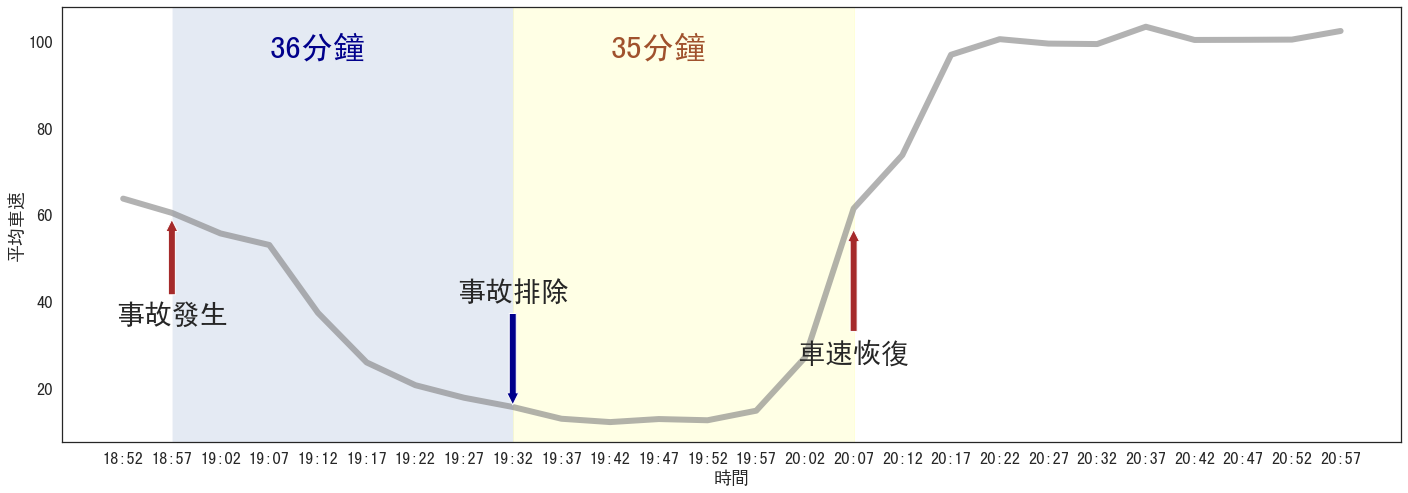

In [1005]:

plt.figure(figsize=(24,8))
sns.lineplot(x="時間", y="平均車速",data=stdf[0:26],linewidth=6,color="gray",alpha=0.6)
plt.annotate('事故發生', xy=("18:57", 60), xytext=("18:57", 35),fontsize=28,horizontalalignment="center",arrowprops=dict(facecolor='brown', width=7 ,shrink=0.05))
plt.annotate('事故排除', xy=("19:32", 15), xytext=("19:32", 40),fontsize=28,horizontalalignment="center",arrowprops=dict(facecolor='darkblue',width=7 , shrink=0.05))
plt.annotate('車速恢復', xy=("20:07", 58), xytext=("20:07", 26),fontsize=28,horizontalalignment="center",arrowprops=dict(facecolor='brown',width=7 , shrink=0.05))
plt.axvspan("18:57", "19:32", alpha=0.15)
plt.axvspan("19:32", "20:07", color="yellow",alpha=0.1)

#plt.axvline("19:12",ymax=93,linestyle='--' ,alpha=1)
plt.text("19:12",102, '36分鐘',fontsize=32,color="darkblue",verticalalignment="top",horizontalalignment="center")
plt.text("19:47",102, '35分鐘',fontsize=32,color="sienna",verticalalignment="top",horizontalalignment="center")
plt.savefig('2.png')

In [941]:
plt.figure(figsize=(24,8))
sns.lineplot(x="時間", y="平均車速",data=stdf[0:26],linewidth=6,color="gray",alpha=0.6)
plt.annotate('事故發生', xy=("11:08", 92), xytext=("11:08",75),horizontalalignment="center",arrowprops=dict(facecolor='brown',width=6 ,shrink=0.05))
plt.annotate('事故排除', xy=("11:47", 63), xytext=("11:47", 77),horizontalalignment="center",arrowprops=dict(facecolor='darkblue',width=6, shrink=0.05))
plt.annotate('車速恢復', xy=("12:28", 90), xytext=("12:28", 76),horizontalalignment="center",arrowprops=dict(facecolor='brown',width=6, shrink=0.05))
plt.axvspan("11:08", "11:58",color="darkblue", alpha=0.1)
plt.axvspan("11:8", "12:38", color="greenyellow",alpha=0.15)

#plt.axvline("11:08",ymax=93,linestyle='--' ,alpha=1)
plt.text("11:28",94, '39分鐘',fontsize=32,color="darkblue",verticalalignment="top",horizontalalignment="center")
plt.text("12:13",94, '50分鐘',fontsize=32,color="darkgreen",verticalalignment="top",horizontalalignment="center")
#plt.savefig('3.png')

Text(12:13, 94, '50分鐘')

ValueError: Given lines do not intersect. Please verify that the angles are not equal or differ by 180 degrees.

<Figure size 1728x576 with 1 Axes>